# Group Case Study - Ecommerce    
By Manan Verma & Nikita Gupta

***

## Problem Statement : 
### ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

### Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

## Data Source :

### Data Understanding
**You have to use the data from July 2015 to June 2016. The data consists of the following types of information:**
 
**Order level data**

- `FSN ID:` The unique identification of each SKU
- `Order Date:` Date on which the order was placed
- `Order ID:` The unique identification number of each order
- `Order item ID:` Suppose you order 2 different products under the same order, it generates 2 different order Item IDs under the same order ID; orders are tracked by the Order Item ID.
- `GMV:` Gross Merchandise Value or Revenue
- `Units:` Number of units of the specific product sold
- `Order payment type:` How the order was paid – prepaid or cash on delivery
- `SLA:` Number of days it typically takes to deliver the product
- `Cust id:` Unique identification of a customer
- `Product MRP:` Maximum retail price of the product
- `Product procurement SLA:` Time typically taken to procure the product
- Apart from this, the following information is also available:
  - Monthly spend on various advertising channels
  - Days when there was any special sale
  - Monthly NPS score – this may work as a proxy to ‘voice of the customer’
  - Stock Index of the company on a monthly basis 

### Importing necessary libraries
- Python ```import``` statement allows us to import modules, python scripts, specific classes and functions from modules.
- We can define our own name for the imported module using ```import as``` statement.

In [1561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 
from sklearn.feature_selection import RFE

 ```Numpy``` is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.
 
 ```Pandas``` is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series
 
 ```Matplotlib``` is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
 
 ```Seaborn``` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

```Scipy``` is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

```Sklearn``` is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

```XGBoost``` is an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, Julia, Perl, and Scala.

```gc``` provides an interface to the optional garbage collector. It provides the ability to disable the collector, tune the collection frequency, and set debugging options.


Modifying some of the ```default values``` as per our need.

In [1562]:
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:0.3f}'.format)

import os
import warnings
warnings.filterwarnings('ignore')

Importing the `ConsumerElectronics` Dataset.

In [1563]:
consumer_df = pd.read_csv("ConsumerElectronics.csv") # Reading data from csv to a pandas dataframe.
consumer_df.head() #displaying top 5 rows on the DataFrame

fsn_id           order_date  Year  Month             order_id        order_item_id   gmv  units deliverybdays deliverycdays s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000  6400      1            \N            \N                        COD    5  -1.01299130778588E+018  -7.79175582905735E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000  6900      1            \N            \N                        COD    7  -8.99032457905512E+018   7.33541149097431E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000 2421912925714800.000  1990      1            \N            \N                        COD   10   -1.0404429420466E+018  -7.47768776228657E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000 4416592101738400.000  1690      1            \N            \N                    Prepaid    4  -7.60496084352714E+018  -5.83593163877661E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000 4419525153426400.000  1618      1            \N            \N                    Prepaid    6    2.8945572083453E+018   5.34735360997242E+017                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3

**```Insights```**

- ```deliverybdays``` & ```deliverycdays``` have garbage values denoted as `\N` 
- Some of the pincode values are ```negative```

deliverybdays & deliverycdays have garbage values, Treating garbage values present in the dataframe.

In [1564]:
consumer_df.replace(r'^\s+$', np.nan, regex=True, inplace = True)
consumer_df.replace('\\N', np.nan, inplace = True)

Checking values again, to see if the ```garbage values``` have been replaced by ```Null``` 

In [1565]:
consumer_df.head() #displaying top 5 rows on the DataFrame

fsn_id           order_date  Year  Month             order_id        order_item_id   gmv  units deliverybdays deliverycdays s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000 3419300926147000.000  6400      1           NaN           NaN                        COD    5  -1.01299130778588E+018  -7.79175582905735E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000 1420830839915200.000  6900      1           NaN           NaN                        COD    7  -8.99032457905512E+018   7.33541149097431E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         7190                        0
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000 2421912925714800.000  1990      1           NaN           NaN                        COD   10   -1.0404429420466E+018  -7.47768776228657E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000 4416592101738400.000  1690      1           NaN           NaN                    Prepaid    4  -7.60496084352714E+018  -5.83593163877661E+018                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000 4419525153426400.000  1618      1           NaN           NaN                    Prepaid    6    2.8945572083453E+018   5.34735360997242E+017                              CE           CameraAccessory               CameraAccessory              CameraTripod         2099                        3

Checking basic information about the ```DataFrame```

In [1566]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null object
units                              1648824 non-null int64
deliverybdays                      335852 non-null object
deliverycdays                      335853 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1648824 non-null object
produc

**```Insights```**

- ```order_date``` should be DateTime
- ```order_id``` & ```order_item_id``` should be int64
- ```deliverybdays``` & ```deliverycdays``` should be int64

In [1567]:
consumer_df['order_date'] =  pd.to_datetime(consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [1568]:
consumer_df[['order_id','order_item_id']] = consumer_df[['order_id','order_item_id']].astype(int)

Checking again.

In [1569]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null datetime64[ns]
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null int64
order_item_id                      1648824 non-null int64
gmv                                1643920 non-null object
units                              1648824 non-null int64
deliverybdays                      335852 non-null object
deliverycdays                      335853 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1648824 non-null object
pr

```deliverybdays``` & ```deliverycdays``` have Null values and hence will convert it post ```null value treatment.```

In [1570]:
consumer_df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99])

Year       Month             order_id          order_item_id       units         sla  product_mrp  product_procurement_sla
count 1648824.000 1648824.000          1648824.000            1648824.000 1648824.000 1648824.000  1648824.000              1648824.000
mean     2015.519       6.586 2842444674146328.500  13756277530325384.000       1.022       5.688     4108.309                    5.403
std         0.500       3.623 1269134332596894.250  55945981798631008.000       0.254       2.983     8510.918                   53.466
min      2015.000       1.000         76331515.000          108016495.000       1.000       0.000        0.000                   -1.000
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000       1.000       4.000      799.000                    1.000
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000       1.000       6.000     1599.000                    2.000
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000       1.000       7.000     3499.000                    3.000
90%      2016.000      11.000 4520541993801910.000   4561094519921880.000       1.000       9.000     7120.000                    5.000
99%      2016.000      12.000 4626530348261358.000 300037347714467712.000       2.000      13.000    45990.000                   13.000
max      2016.000      12.000 5395076790260600.000 300037347717704000.000      50.000    1006.000   299999.000                 1000.000

sla contains -1 which seems some invalid data, will have to treat the same.

In [1571]:
consumer_df.sample(10)

fsn_id          order_date  Year  Month          order_id       order_item_id      gmv  units deliverybdays deliverycdays s1_fact.order_payment_type  sla                  cust_id                  pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
1066829  VGLE536FZSHHVFPE 2016-04-27 01:30:03  2016      4  2583480420070000    2583480420070000  235.000      1           NaN           NaN                    Prepaid    3  8323101267827229696.000   918963988528583936.000                              CE        EntertainmentSmall                  TVVideoSmall              VideoGlasses          500                        5
755303   CAME44G22GUXZZPR 2016-02-25 18:03:10  2016      2  1532585467511200    1532585467511200 4190.000      1           NaN           NaN                        COD    5  5717558038021289984.000 -7383254391029680128.000                              CE                    Camera                        Camera             Point & Shoot         4990                        1
176302   FMRDJYTDA7GDMGJE 2015-10-27 12:59:10  2015     10  2427858386934200    2427858386934200      965      1           NaN           NaN                        COD    3    2.79454495795496E+018     8.4521227823704E+018                              CE        EntertainmentSmall                     HomeAudio                   FMRadio         1049                        1
1540814  VGLE6CWWJBZXREMX 2015-09-04 10:50:07  2015      9  3381987672417070  300037347711388032     1490      1           NaN           NaN                        COD    2   -3.20038399013556E+018   -2.24953069655176E+018                              CE        EntertainmentSmall                  TVVideoSmall              VideoGlasses         5490                        2
1137057  ACCEE2HSPGH2EZQN 2016-05-21 19:34:05  2016      5  4606945348710200    4606945348710200 2990.000      1           NaN           NaN                        COD    1 -3567216187043310080.000  7407504973135559680.000                              CE        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker         3990                        0
1497028  ACCE9C3WYBMPJ98R 2015-09-05 21:37:32  2015      9  3381987673091180  300037347712142016     1249      1           NaN           NaN                        COD    3    8.20375695343131E+018    3.84879167129552E+018                              CE        EntertainmentSmall                       Speaker             MobileSpeaker         3199                        1
717644   ACCEDHZHERAJFMNT 2016-02-20 17:10:48  2016      2  1528236782425000    1528236782425000 4499.000      1           NaN           NaN                        COD    4 -9094502847299059712.000  2175163142166510080.000                              CE        EntertainmentSmall                       Speaker             MobileSpeaker         7999                        2
305646   AVMDHXB8EZHPAVXN 2015-11-06 12:20:30  2015     11  1436465595753000    1436465595753000     2199      1           NaN           NaN                        COD    7   -5.56552537715703E+018    4.32816165064839E+018                              CE                 GameCDDVD                          Game              PhysicalGame         3499                        1
1511905  AUDDVX8ZJ7ZJPTAA 2015-09-01 17:40:48  2015      9  2378842904573410    2378842904610540     3630      1           NaN           NaN                        COD    5   -3.27074641329724E+018   -4.61868706629719E+018                              CE        EntertainmentSmall                AudioMP3Player            AudioMP3Player         3990                       -1
236362   ACCDYH2ZFYHY5H9N 2015-11-30 19:08:32  2015     11  4457459293254800    4457459293254800     1980      1           NaN           NaN                    Prepaid    4    1.82579163131172E+018   -9.03104320709149E+018                              CE            Gam

#### Creating Function For ```Barplot```

In [1572]:
def MakeBarChart(a1,b1,title1,x1,y1,data1):
    fig = plt.figure(figsize=(a1,b1))
    plt.title(title1)
    ax = sns.barplot(x=x1,y=y1,data=data1,palette="ch:.25")
    return ax

- ```a1``` is the x axis value of the figure size
- ```b1``` is the y axis value of the figure size
- ```title1``` is the title of the figure
- ```x1``` is the x axis value of the barplot
- ```y1``` is the y axis value of the barplot
- ```data1``` is the Dataframe for the barplot

**Note:** Using the above code everytime to create Barplots will save us from writing same code again.

#### Plotting %age of ```null```/```Nan``` values accross the dataset

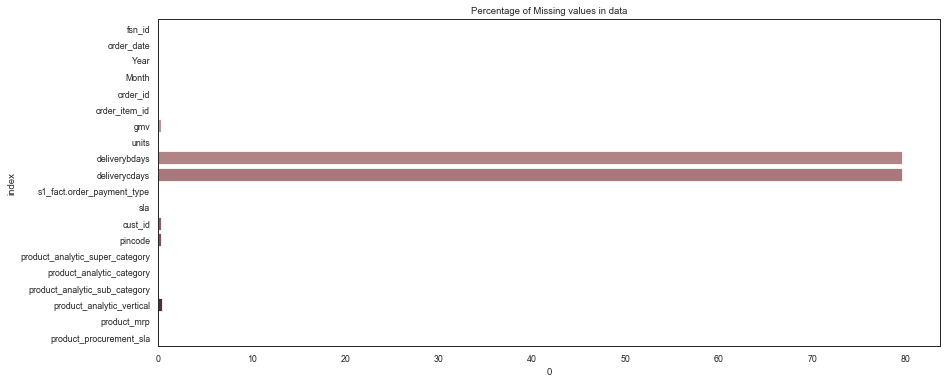

In [1573]:
Missing_Values = pd.DataFrame((consumer_df.isnull().sum())*100/consumer_df.shape[0]).reset_index()
MakeBarChart(14,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

**```Insights```**

- Columns deliverycdays and deliverybdays contains close to 80% null values.

**```Action```**

- Dropping both columns

In [1574]:
consumer_df.drop(['deliverycdays', 'deliverybdays'], axis=1, inplace=True)

Checking again for ```null``` values

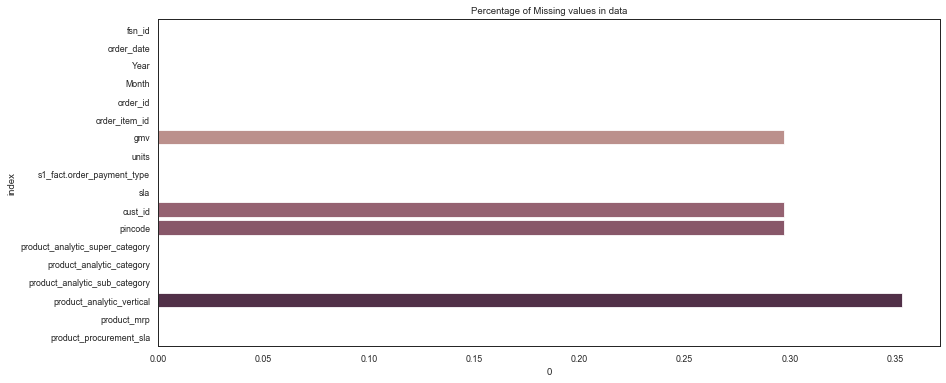

In [1575]:
Missing_Values = pd.DataFrame((consumer_df.isnull().sum())*100/consumer_df.shape[0]).reset_index()
MakeBarChart(14,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

**```Insights```**

- Four other columns have null values, but they are less than 0.5%

**```Action```**

- Dropping rows.

In [1576]:
consumer_df.dropna(inplace = True)

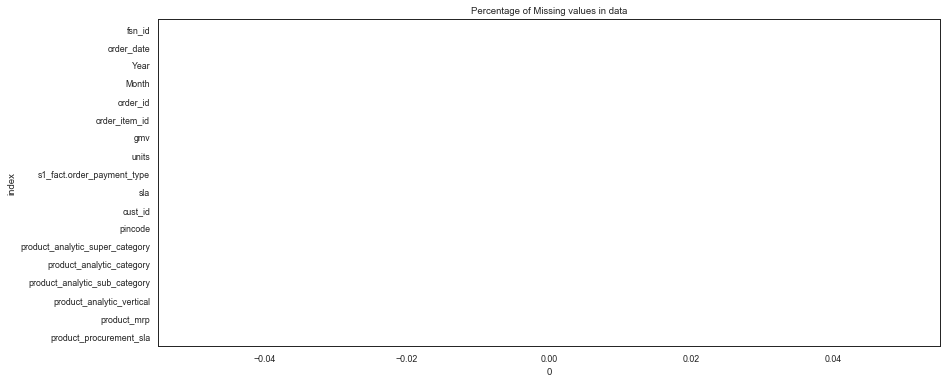

In [1577]:
Missing_Values = pd.DataFrame((consumer_df.isnull().sum())*100/consumer_df.shape[0]).reset_index()
MakeBarChart(14,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

**```Insights```**

- All null values have been removed.


Finding if we have any ```duplicate``` rows.

In [1578]:
consumer_df.loc[consumer_df.duplicated(['order_id','order_item_id'])]

fsn_id          order_date  Year  Month          order_id     order_item_id   gmv  units s1_fact.order_payment_type  sla                 cust_id                 pincode product_analytic_super_category product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
713      ACCCX3SU22JG8NJX 2015-10-17 09:35:02  2015     10  3419099777445400  3419099777445400   470      1                    Prepaid    7   9.08246875057758E+018  -7.82411064429225E+018                              CE           CameraAccessory               CameraAccessory             CameraBattery         1545                        1
718      ACCCX3SU22JG8NJX 2015-10-20 09:01:24  2015     10  1409640719662800  1409640719662800   470      1                        COD    7   4.67936511317107E+017  -4.69235841537976E+018                              CE           CameraAccessory               CameraAccessory             CameraBattery         1545                        1
722      ACCCX3SU22JG8NJX 2015-11-04 11:56:07  2015     11  2429102566635600  2429102566635600   470      1                        COD    6  -4.99232237787886E+018  -8.66122174820481E+018                              CE           CameraAccessory               CameraAccessory             CameraBattery         1545                        1
724      ACCCX3SU22JG8NJX 2015-10-22 10:41:11  2015     10  3423459581510700  3423459581510700   470      1                        COD    9  -9.14246575108792E+018   8.21046334457225E+017                              CE           CameraAccessory               CameraAccessory             CameraBattery         1545                        1
925      ACCCX3SUEACQJ2QG 2015-11-06 19:19:34  2015     11  2425445659528400  2425445659528400   130      1                        COD    7  -1.23491196460985E+018  -2.16520808989317E+018                              CE           CameraAccessory               CameraAccessory                      Lens          399                        2
...                   ...                 ...   ...    ...               ...               ...   ...    ...                        ...  ...                     ...                     ...                             ...                       ...                           ...                       ...          ...                      ...
1648819  VPLEYAP3ZYYUVESU 2015-09-27 19:20:31  2015      9  4402170060025800  4402170060025800  2200      1                        COD    7  -9.90634340213633E+017   7.89475898877674E+018                              CE        EntertainmentSmall                  TVVideoSmall               VideoPlayer         2499                        2
1648820  VPLEYAP3ZYYUVESU 2015-09-28 01:32:58  2015      9  1402393217090200  1402393217090200  2098      1                        COD   10   3.04892345453077E+018  -1.45758574108572E+018                              CE        EntertainmentSmall                  TVVideoSmall               VideoPlayer         2499                        2
1648821  VPLEYAP3ZYYUVESU 2015-09-29 07:07:57  2015      9  4403459511294400  4403459511294400  2098      1                        COD    5  -4.53140379455183E+018   5.74649014721365E+018                              CE        EntertainmentSmall                  TVVideoSmall               VideoPlayer         2499                        2
1648822  VPLEYAP3ZYYUVESU 2015-09-29 18:15:45  2015      9  4403860318235600  4403860318235600  2200      1                        COD    3  -8.94046418180233E+018   2.57294814079718E+018                              CE        EntertainmentSmall                  TVVideoSmall               VideoPlayer         2499                        2
1648823  VPLEYAP3ZYYUVESU 2015-09-29 21:31:37  2015      9  4403971467524500  4403971467524500  2295      1                        COD    5    6.0094454082098E+018   4.38373500390134E+017                              CE        EntertainmentSmall                  TVVideoSmall    

**```138981 duplicate rows```** has been found in the dataset, We need to ```remove``` all these entries before moving forward.

In [1579]:
consumer_df.drop_duplicates(['order_id','order_item_id'],keep = 'first', inplace = True)

Checking again

In [1580]:
consumer_df.loc[consumer_df.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

No Duplicate left in the entire DataFrame. 

Checking ```Unique Values```

In [1581]:
unique_values = pd.DataFrame(consumer_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(consumer_df.dtypes)
unique_values

Unique Value Count           dtype
product_analytic_super_category                   1          object
s1_fact.order_payment_type                        2          object
Year                                              2           int64
product_analytic_category                         5          object
Month                                            12           int64
product_analytic_sub_category                    14          object
product_procurement_sla                          17           int64
units                                            25           int64
sla                                              59           int64
product_analytic_vertical                        73          object
product_mrp                                    1908           int64
pincode                                       12967          object
gmv                                           17512          object
fsn_id                                        20994          object
order_date                                  1132889  datetime64[ns]
cust_id                                     1248094          object
order_item_id                               1471477           int64
order_id                                    1491652           int64

```product_analytic_super_category``` has single values, Removing the same because they have same value throughout and are not capable of influencing the results by any means.

In [1582]:
consumer_df=consumer_df.drop(columns=['product_analytic_super_category'])

### Analyse the column one by one

- Product_analystic_sub_category

In [1583]:
consumer_df['product_analytic_sub_category'].value_counts()

Speaker                497143
CameraAccessory        213593
GamingAccessory        184842
TVVideoSmall           131299
HomeAudio              114442
AudioMP3Player         102918
Game                    99920
Camera                  94474
GamingConsole           26348
CameraStorage           16168
AudioAccessory          10301
HomeTheatre              4173
AmplifierReceiver        3419
GameMembershipCards        85
Name: product_analytic_sub_category, dtype: int64

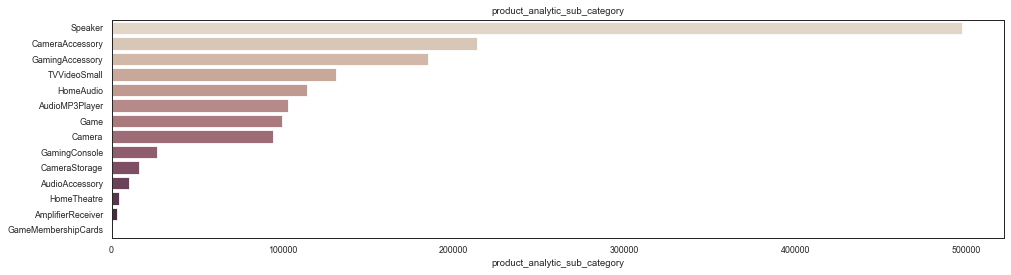

Percentage wise contribution


Speaker               33.162
CameraAccessory       14.248
GamingAccessory       12.330
TVVideoSmall           8.758
HomeAudio              7.634
AudioMP3Player         6.865
Game                   6.665
Camera                 6.302
GamingConsole          1.758
CameraStorage          1.078
AudioAccessory         0.687
HomeTheatre            0.278
AmplifierReceiver      0.228
GameMembershipCards    0.006
Name: product_analytic_sub_category, dtype: float64

In [1584]:
MakeBarChart(16,4,'product_analytic_sub_category',
             consumer_df['product_analytic_sub_category'].value_counts(),
            consumer_df['product_analytic_sub_category'].value_counts().index,consumer_df)
plt.show()

print("Percentage wise contribution")
(consumer_df['product_analytic_sub_category'].value_counts()/consumer_df.shape[0])*100

As need to create market mix model only for 3 sub categories camera accessory, home audio and gaming accessory so lets filter out all other sub categories

In [1585]:
consumer_df = consumer_df.loc[(consumer_df.product_analytic_sub_category=='CameraAccessory') |
                       (consumer_df.product_analytic_sub_category=='GamingAccessory')|
                       (consumer_df.product_analytic_sub_category=='HomeAudio')]

In [1586]:
consumer_df.shape

(512877, 17)

- product_analytic_vertical

In [1587]:
consumer_df['product_analytic_vertical'].value_counts()

HomeAudioSpeaker         79515
GamingHeadset            59536
GamePad                  52753
Flash                    47495
CameraBattery            36087
GamingMouse              34670
CameraTripod             32858
Lens                     30881
FMRadio                  25212
CameraBag                15765
CameraBatteryCharger     13806
Binoculars               13445
Filter                   10111
GamingAccessoryKit        7607
TVOutCableAccessory       6626
GamingKeyboard            6213
GamingMemoryCard          5934
CameraRemoteControl       5224
GamingMousePad            4168
VoiceRecorder             3380
GamingAdapter             3040
JoystickGamingWheel       2669
BoomBox                   2450
CameraAccessory           1939
Dock                      1884
Telescope                 1676
Strap                     1452
HiFiSystem                1387
CameraFilmRolls           1281
MotionController          1041
CameraMount                982
GamingSpeaker              493
DockingS

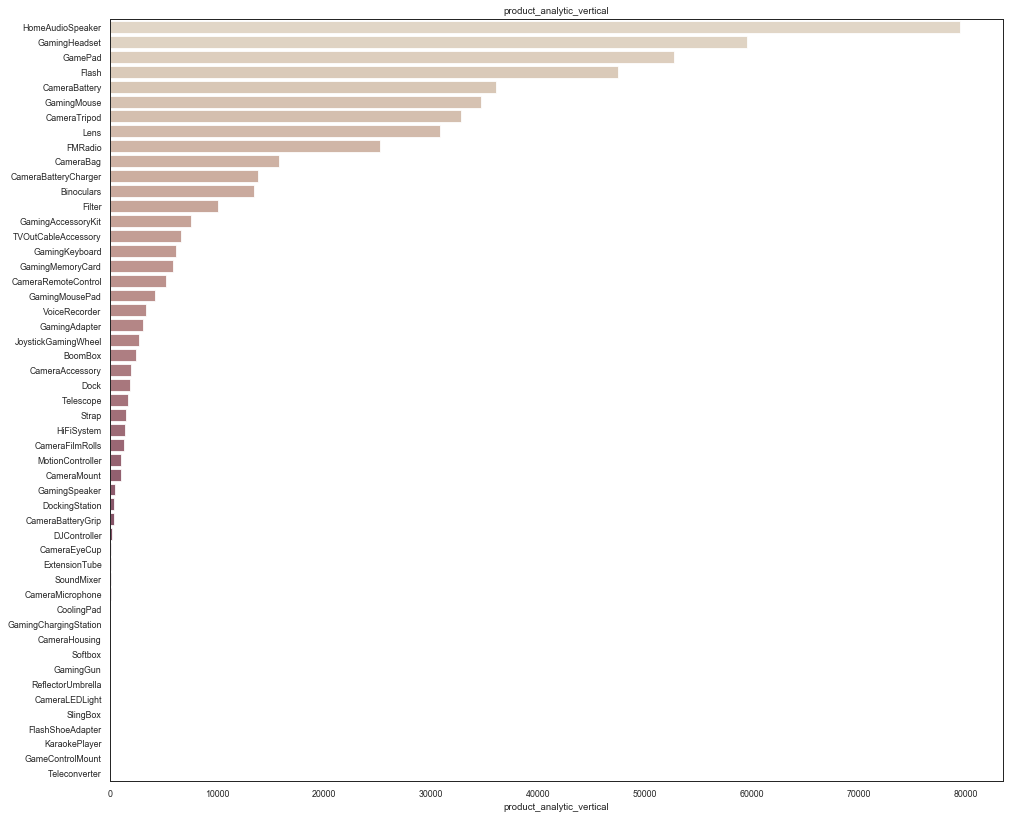

Percentage wise contribution


HomeAudioSpeaker        15.504
GamingHeadset           11.608
GamePad                 10.286
Flash                    9.261
CameraBattery            7.036
GamingMouse              6.760
CameraTripod             6.407
Lens                     6.021
FMRadio                  4.916
CameraBag                3.074
CameraBatteryCharger     2.692
Binoculars               2.621
Filter                   1.971
GamingAccessoryKit       1.483
TVOutCableAccessory      1.292
GamingKeyboard           1.211
GamingMemoryCard         1.157
CameraRemoteControl      1.019
GamingMousePad           0.813
VoiceRecorder            0.659
GamingAdapter            0.593
JoystickGamingWheel      0.520
BoomBox                  0.478
CameraAccessory          0.378
Dock                     0.367
Telescope                0.327
Strap                    0.283
HiFiSystem               0.270
CameraFilmRolls          0.250
MotionController         0.203
CameraMount              0.191
GamingSpeaker            0.096
DockingS

In [1588]:
MakeBarChart(16,14,'product_analytic_vertical',
             consumer_df['product_analytic_vertical'].value_counts(),
            consumer_df['product_analytic_vertical'].value_counts().index,consumer_df)
plt.show()
print("Percentage wise contribution")
(consumer_df['product_analytic_vertical'].value_counts()/consumer_df.shape[0])*100

- product_analytic_category

In [1589]:
consumer_df['product_analytic_category'].value_counts()

CameraAccessory       213593
GamingHardware        184842
EntertainmentSmall    114442
Name: product_analytic_category, dtype: int64

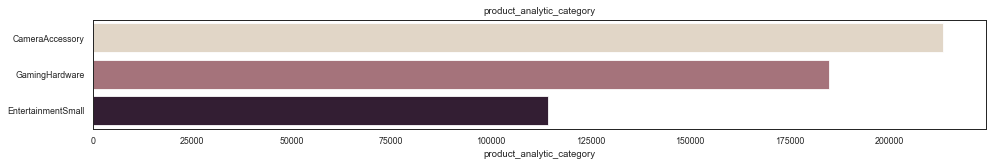

Percentage wise contribution


CameraAccessory      41.646
GamingHardware       36.040
EntertainmentSmall   22.314
Name: product_analytic_category, dtype: float64

In [1590]:
MakeBarChart(16,2,'product_analytic_category',
             consumer_df['product_analytic_category'].value_counts(),
            consumer_df['product_analytic_category'].value_counts().index,consumer_df)
plt.show()

print("Percentage wise contribution")
(consumer_df['product_analytic_category'].value_counts()/consumer_df.shape[0])*100

- pincode

In [1591]:
consumer_df['pincode'] = pd.to_numeric(consumer_df['pincode']) #changing the datatype

Lets also handle the negative values by converting them to positive

In [1592]:
consumer_df.pincode = consumer_df.pincode.abs()

In [1593]:
consumer_df['pincode'].value_counts()

9031043207091489792.000    3983
977901032130400000.000     3342
8649648456016409600.000    2102
6513330541343979520.000    1965
7346497166693510144.000    1941
                           ... 
3645099199586250240.000       1
3233382964977520128.000       1
1343636759241570048.000       1
5920148255768240128.000       1
8380523480995590144.000       1
Name: pincode, Length: 6633, dtype: int64

In [1594]:
#Most of the pincode count is 1 and other seems invalid lets drop this column
consumer_df.drop(['pincode'], axis = 1, inplace = True)

- cust_id

In [1595]:
consumer_df['cust_id'].value_counts()

2.23947383112118e+18      52
-2.97151680344434e+18     50
-6.40520013965909e+18     25
-7.8550434145648e+18      25
-1.65411037921902E+018    24
                          ..
-7.26185708447736e+18      1
-1.29449410845694e+18      1
-6.54930089333224e+18      1
3.50554305610382e+18       1
-2.42246134959605E+018     1
Name: cust_id, Length: 450268, dtype: int64

it seems similar like pincode lets drop this too

In [1596]:
consumer_df.drop(['cust_id'], axis = 1, inplace = True)

- s1_fact.order_payment_type

In [1597]:
consumer_df['s1_fact.order_payment_type'].value_counts()

COD        376365
Prepaid    136512
Name: s1_fact.order_payment_type, dtype: int64

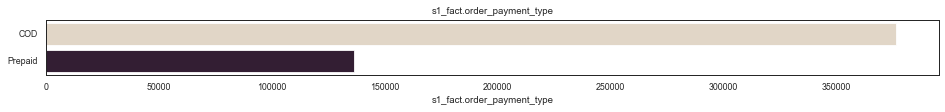

In [1598]:
MakeBarChart(16,1,'s1_fact.order_payment_type',consumer_df['s1_fact.order_payment_type'].value_counts(),
            consumer_df['s1_fact.order_payment_type'].value_counts().index,consumer_df)
plt.show()

**```Insights```**

- Most of the values are COD
- We should rename this column for better sense.


In [1599]:
consumer_df.rename(columns={'s1_fact.order_payment_type': 'order_payment_type'}, inplace=True)

- units

In [1600]:
consumer_df['units'].value_counts()

1     503612
2       7713
3        868
4        300
5        192
6         67
10        61
8         24
7         16
9         10
12         3
15         3
18         2
13         1
34         1
16         1
17         1
20         1
39         1
Name: units, dtype: int64

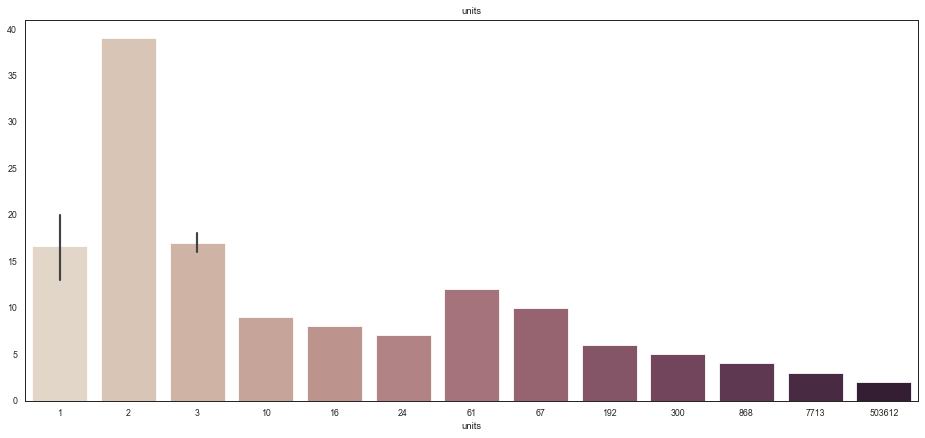

In [1601]:
MakeBarChart(16,7,'units',consumer_df['units'].value_counts(),
            consumer_df['units'].value_counts().index,consumer_df)
plt.show()

- gmv

change data dtype of ```gmv```

In [1602]:
consumer_df['gmv'] = pd.to_numeric(consumer_df['gmv'])

In [1603]:
consumer_df['gmv'].describe()

count   512877.000
mean      1287.254
std       2440.819
min          0.000
25%        299.000
50%        549.000
75%       1499.000
max     148050.000
Name: gmv, dtype: float64

the min value 0 is not possible as gmv is for Gross Merchandise Value or Revenue, lets analyse further and do not delete for now

- order_date

Let's ```Filter out``` date between **July 2015** to **June 2016**

In [1604]:
consumer_df = consumer_df.loc[(consumer_df.order_date >= '2015-07-01')]
consumer_df = consumer_df.loc[(consumer_df.order_date < '2016-07-01')]

- product_mrp

In [1605]:
consumer_df['product_mrp'].describe()

count   512683.000
mean      2486.171
std       4691.982
min          0.000
25%        749.000
50%       1200.000
75%       2800.000
max     180000.000
Name: product_mrp, dtype: float64

In [1606]:
consumer_df[(consumer_df.product_mrp == 0)].head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla
12807  ACCDGXGZQUGHFYHT 2015-10-23 19:26:01  2015     10  1424634732111000  1424634732111000 3500.000      1                COD    5            GamingHardware               GamingAccessory        GamingAccessoryKit            0                       -1
15031  ACCDHHZZGFBDPJRP 2015-10-20 21:27:29  2015     10  3422117911872300  3422117911872300  690.000      1            Prepaid    6           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
15032  ACCDHHZZGFBDPJRP 2015-10-28 23:49:41  2015     10  2429116502765100  2429116502765100  690.000      1                COD    8           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
15529  ACCDHTZ4CZCECAFF 2015-10-27 01:05:20  2015     10  1427429193266100  1427429193266100 1050.000      1                COD    7           CameraAccessory               CameraAccessory             CameraBattery            0                       -1
16980  ACCDK94FSKCZBJCU 2015-10-28 18:36:07  2015     10  4428925467622000  4428925467622000 1099.000      1            Prepaid    6        EntertainmentSmall                     HomeAudio                      Dock            0                       -1

In [1607]:
consumer_df[(consumer_df.product_mrp == 0)].shape

(3072, 15)

```0 mrp``` is not possible and there are ```~3K``` rows so, lets remove the data where mrp is 0

In [1608]:
consumer_df = consumer_df.loc[~(consumer_df.product_mrp==0)]

- ```MRP``` is the value gmv per unit so lets replace the product_mrp value only for value where it is greater than gmv per unit
- first create new column ```gmv_per_unit```

In [1609]:
consumer_df['gmv_per_unit']= consumer_df.gmv/consumer_df.units

replacing the ```mrp values```

In [1610]:
consumer_df['product_mrp'].loc[consumer_df.gmv_per_unit>consumer_df.product_mrp] = consumer_df['gmv_per_unit']

droping the column ```gmv_per_unit``` as it is no use

In [1611]:
consumer_df.drop(['gmv_per_unit'],1,inplace=True)

- product_procurement_sla

In [1612]:
consumer_df['product_procurement_sla'].describe()

count   509611.000
mean         2.561
std          1.722
min         -1.000
25%          2.000
50%          2.000
75%          3.000
max         15.000
Name: product_procurement_sla, dtype: float64

It contains negative value lets convert all into positive

In [1613]:
consumer_df.product_procurement_sla = abs(consumer_df.product_procurement_sla)

Taking a copy of the ```dataframe```

In [1614]:
consumer_cp = consumer_df 

In [1615]:
consumer_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509611 entries, 0 to 1542378
Data columns (total 15 columns):
fsn_id                           509611 non-null object
order_date                       509611 non-null datetime64[ns]
Year                             509611 non-null int64
Month                            509611 non-null int64
order_id                         509611 non-null int64
order_item_id                    509611 non-null int64
gmv                              509611 non-null float64
units                            509611 non-null int64
order_payment_type               509611 non-null object
sla                              509611 non-null int64
product_analytic_category        509611 non-null object
product_analytic_sub_category    509611 non-null object
product_analytic_vertical        509611 non-null object
product_mrp                      509611 non-null float64
product_procurement_sla          509611 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(

We have 1 datetime, 9 integer and 5 object type variables.

In [1616]:
app_data_numerical = consumer_cp.select_dtypes(include = ['float64', 'int64'])

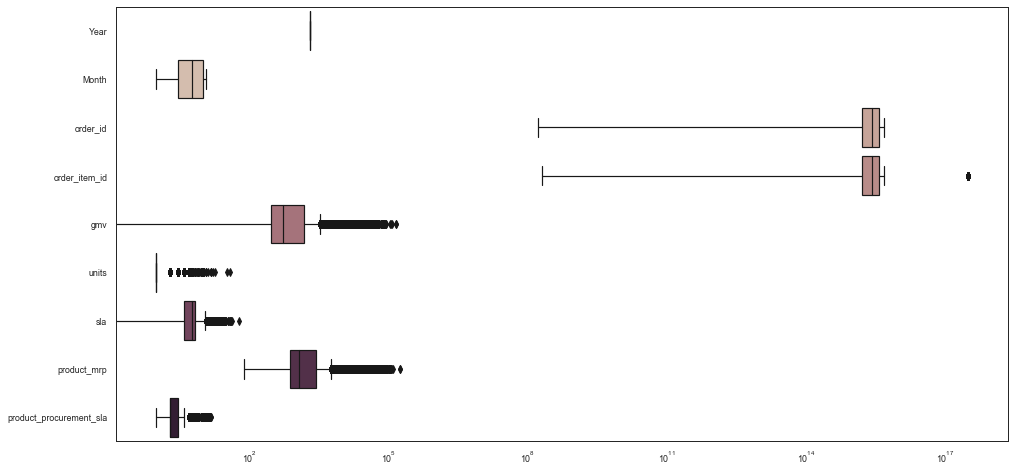

In [1617]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=app_data_numerical, orient="h", palette="ch:.25")
ax.set_xscale("log")

It can be infer from above statistics:

- ```product_procurement_sla``` have outliers
- ```sla``` have outliers
- ```gmv``` have outliers
- ```product_mrp``` have outliers
- ```Units``` have outliers

Not treating the outliers currently as it can have some important data

checking the ```distribution```

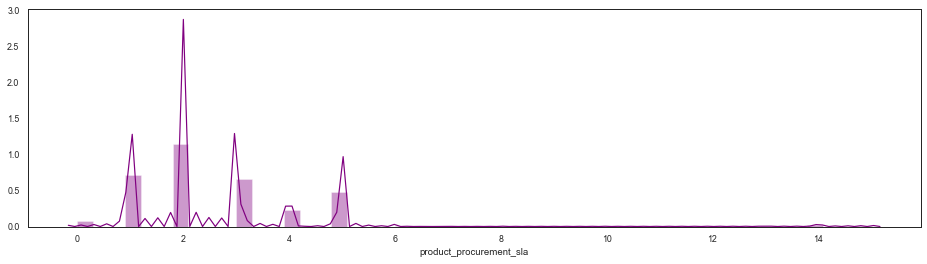

In [1618]:
plt.figure(figsize=(16,4))
sns.distplot(app_data_numerical['product_procurement_sla'],color='purple')
plt.show()

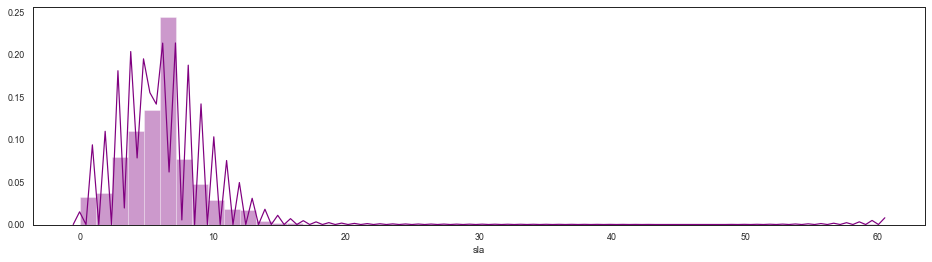

In [1619]:
plt.figure(figsize=(16,4))
sns.distplot(app_data_numerical['sla'],color='purple')
plt.show()

The distribution for sla is around 5-7 days while for product_procurement_sla is around 2 days.So, need to do some changes in sla

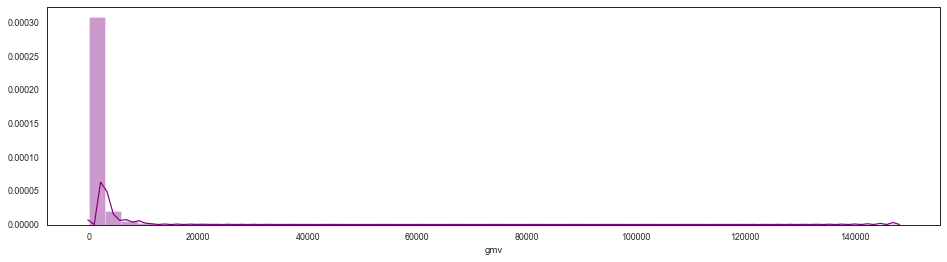

In [1620]:
plt.figure(figsize=(16,4))
sns.distplot(app_data_numerical['gmv'],color='purple')
plt.show()

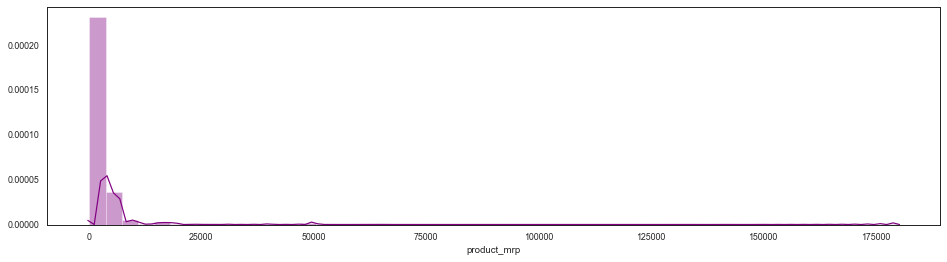

In [1621]:
plt.figure(figsize=(16,4))
sns.distplot(app_data_numerical['product_mrp'],color='purple')
plt.show()

Both ```product_mrp``` and ```gmv``` have a **similar distribution**

#  Feature Engineering

### Derived Columns

- List Price

  - ```GMV```: gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units)
  - ```List Price``` = GMV/units

In [1622]:
consumer_cp['listing_price'] = round((consumer_cp.gmv/consumer_cp.units),2)

In [1623]:
consumer_cp.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000  3419300926147000 6400.000      1                COD    5           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6400.000
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200  1420830839915200 6900.000      1                COD    7           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6900.000
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800  2421912925714800 1990.000      1                COD   10           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1990.000
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400  4416592101738400 1690.000      1            Prepaid    4           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1690.000
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400  4419525153426400 1618.000      1            Prepaid    6           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1618.000

- Discount

  - Discount = (mrp-list price)/mrp

In [1624]:
consumer_cp['discount'] = round(((consumer_cp.product_mrp - consumer_cp.listing_price)/(consumer_cp.product_mrp)),2)

In [1625]:
consumer_cp['discount'].describe()

count   509611.000
mean         0.452
std          0.245
min          0.000
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

- Week 

In [1626]:
consumer_cp['week'] = np.where(consumer_cp.Year == 2015, (consumer_cp.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), consumer_cp.order_date.dt.week+27)
# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
consumer_cp.week.values[(consumer_cp.Year == 2016) & (consumer_cp.week == 80)] = 27

In [1627]:
consumer_cp.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  discount  week
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000  3419300926147000 6400.000      1                COD    5           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6400.000     0.110    16
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200  1420830839915200 6900.000      1                COD    7           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6900.000     0.040    17
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800  2421912925714800 1990.000      1                COD   10           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1990.000     0.050    17
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400  4416592101738400 1690.000      1            Prepaid    4           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1690.000     0.190    16
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400  4419525153426400 1618.000      1            Prepaid    6           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1618.000     0.230    16

- Order_payment_type

In [1628]:
consumer_cp['order_payment_type'].value_counts()

COD        374187
Prepaid    135424
Name: order_payment_type, dtype: int64

In [1629]:
#It contains only 2 values so make it 0 and 1
consumer_cp['order_payment_type'] = np.where(consumer_cp['order_payment_type'] == "Prepaid",1,0)

In [1630]:
consumer_cp['order_payment_type'].value_counts()

0    374187
1    135424
Name: order_payment_type, dtype: int64

- premium product

  - The ```premium``` product means Higher the MRP, premium is the product.
  - checking the ```MRP``` distrbution by percentiles

In [1631]:
consumer_cp.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   509611.000
mean      2503.625
std       4703.242
min         79.000
25%        766.000
50%       1200.000
75%       2800.000
80%       3150.000
90%       5399.000
95%       6990.000
99%      19000.000
max     180000.000
Name: product_mrp, dtype: float64

product mrp greater than ```90%``` that is **>5399** is comes into ```premium``` product so make it boolean

In [1632]:
consumer_cp['is_premium_product'] = consumer_cp['gmv'].apply(lambda x:1 if x >= 5399 else 0)
consumer_cp.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  discount  week  is_premium_product
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000  3419300926147000 6400.000      1                   0    5           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6400.000     0.110    16                   1
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200  1420830839915200 6900.000      1                   0    7           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6900.000     0.040    17                   1
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800  2421912925714800 1990.000      1                   0   10           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1990.000     0.050    17                   0
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400  4416592101738400 1690.000      1                   1    4           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1690.000     0.190    16                   0
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400  4419525153426400 1618.000      1                   1    6           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1618.000     0.230    16                   0

In [1633]:
consumer_cp.loc[consumer_cp.is_premium_product==1]['product_analytic_vertical'].value_counts()

Lens                    8998
HomeAudioSpeaker        2341
Binoculars               949
VoiceRecorder            661
CameraBag                628
Flash                    412
GamePad                  317
BoomBox                  305
GamingHeadset            242
HiFiSystem               229
MotionController         222
JoystickGamingWheel      199
DJController             178
CameraMount              173
CameraTripod             169
GamingKeyboard           153
GamingMouse              135
GamingAccessoryKit        67
SoundMixer                55
GamingMemoryCard          36
CameraBattery             30
Filter                    27
CameraAccessory           24
FMRadio                   24
CameraRemoteControl       21
Telescope                 19
GamingAdapter             14
Dock                      11
Strap                     10
ExtensionTube             10
DockingStation             5
CameraFilmRolls            5
CameraBatteryCharger       4
TVOutCableAccessory        4
CameraBatteryG

 Above all products are premium ones or luxury products

Visualise contribution of premium products on GMV

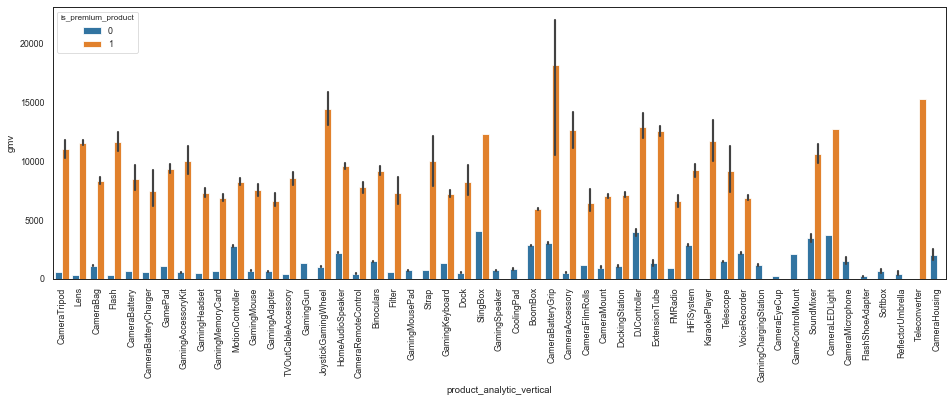

In [1634]:
plt.figure(figsize=(16,5))
sns.barplot(x = consumer_cp.product_analytic_vertical, y=consumer_cp.gmv, hue=consumer_cp.is_premium_product)
plt.xticks(rotation=90)
plt.show()

It can be seen that revenue has affect from premium products

- Calendar

  - creating calendar to enter special days like holiday,payday

In [1635]:
cal_df = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])
### Mapping week in the calendar
cal_df['week'] = cal_df.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
cal_df['week'] = np.where((cal_df['week'] <= 26) & (cal_df.Date.dt.year == 2016), cal_df['week']+53, cal_df['week'])

In [1636]:
cal_df.head()

Date  week
0 2015-07-01    27
1 2015-07-02    27
2 2015-07-03    27
3 2015-07-04    27
4 2015-07-05    27

- Holiday Flag

In [1637]:

holiday_list = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]


holiday_df = pd.DataFrame(holiday_list,columns = ['Date'])
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])
holiday_df['holiday_flag'] = True

In [1638]:
holiday_df.sample(5)

Date  holiday_flag
25 2015-12-31          True
16 2015-11-12          True
26 2016-01-01          True
15 2015-11-11          True
1  2015-07-19          True

Enter the holiday days in cal_df by merging

In [1639]:
cal_df = cal_df.merge(holiday_df, 'left')
cal_df.fillna(False, inplace = True)

In [1640]:
cal_df.head()

Date  week  holiday_flag
0 2015-07-01    27         False
1 2015-07-02    27         False
2 2015-07-03    27         False
3 2015-07-04    27         False
4 2015-07-05    27         False

convert ```holiday_day``` into boolean as **0** and **1**

In [1641]:
cal_df['holiday_flag'] = cal_df['holiday_flag'].astype(int)

In [1642]:
cal_df.head()

Date  week  holiday_flag
0 2015-07-01    27             0
1 2015-07-02    27             0
2 2015-07-03    27             0
3 2015-07-04    27             0
4 2015-07-05    27             0

- PayDate

  - creating separate columns if Pay date (if 1st or 15th of the month)

In [1643]:
cal_df['PayDate'] = ((cal_df['Date'].dt.day == 1) | (cal_df['Date'].dt.day == 15)).astype(int)

- Climate Data

  - Ontario Climate data of year 2015-2016

In [1644]:
ontario_climate_2015 = pd.DataFrame(pd.read_csv('ONTARIO-2015.csv',encoding="ISO-8859-1",skiprows=24))
ontario_climate_2016 = pd.DataFrame(pd.read_csv('ONTARIO-2016.csv',encoding="ISO-8859-1",skiprows=24))

Merging 2015 and 2016 data

In [1645]:
ontario_climate = ontario_climate_2015.append(ontario_climate_2016)
ontario_climate = ontario_climate.reset_index()
ontario_climate.head()

index   Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C) Max Temp Flag  Min Temp (Â°C) Min Temp Flag  Mean Temp (Â°C) Mean Temp Flag  Heat Deg Days (Â°C) Heat Deg Days Flag  Cool Deg Days (Â°C) Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm) Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  Spd of Max Gust (km/h)  Spd of Max Gust Flag
0      0  2015-01-01  2015      1    1          â            0.000           NaN          -8.500           NaN           -4.300            NaN               22.300                NaN                0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        nan                   nan                     nan                   nan
1      1  2015-01-02  2015      1    2          â            3.000           NaN          -3.000           NaN            0.000            NaN               18.000                NaN                0.000                NaN            0.000             NaN            0.000             NaN              0.000               NaN              0.000               NaN                        nan                   nan                     nan                   nan
2      2  2015-01-03  2015      1    3          â            2.500           NaN          -4.000           NaN           -0.800            NaN               18.800                NaN                0.000                NaN           24.000             NaN            0.000             NaN             24.000               NaN              0.000               NaN                        nan                   nan                     nan                   nan
3      3  2015-01-04  2015      1    4          â            2.500           NaN           0.000           NaN            1.300            NaN               16.700                NaN                0.000                NaN            0.000             NaN            1.000             NaN              1.000               NaN              0.000               NaN                        nan                   nan                     nan                   nan
4      4  2015-01-05  2015      1    5          â          -10.000           NaN         -13.500           NaN          -11.800            NaN               29.800                NaN                0.000                NaN            0.000             NaN            3.000             NaN              3.000               NaN              1.000               NaN                        nan                   nan                     nan                   nan

Filter Climate data from ```July 15``` to ```June 16```

In [1646]:
ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015) 
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

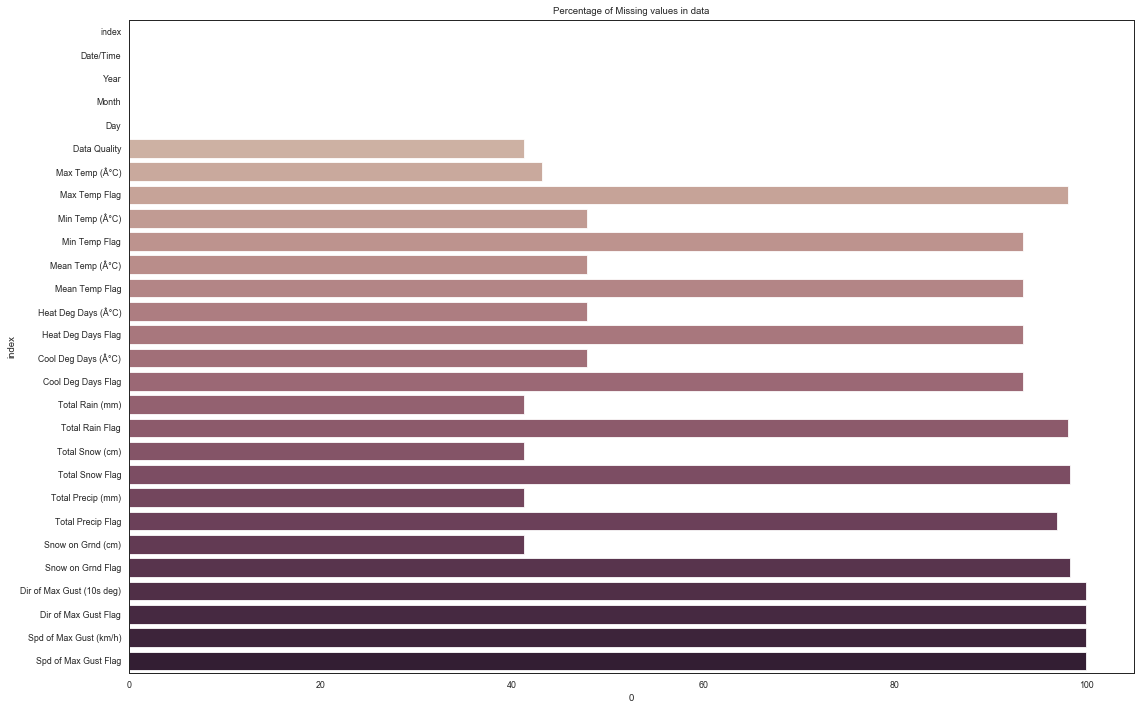

In [1647]:
Missing_Values = pd.DataFrame((ontario_climate.isnull().sum())*100/ontario_climate.shape[0]).reset_index()
MakeBarChart(18,12,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

Dropping the columns having high null percentage and not needed

In [1648]:
ontario_climate.drop(['Spd of Max Gust Flag','Dir of Max Gust Flag','Dir of Max Gust (10s deg)','Spd of Max Gust (km/h)','Snow on Grnd Flag','Total Snow Flag'
,'Max Temp Flag','Total Rain Flag','Total Rain Flag','Total Precip Flag','Cool Deg Days Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','index'
,'Data Quality'], axis = 1, inplace = True)

Checking basic info

In [1649]:
ontario_climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 546
Data columns (total 13 columns):
Date/Time              366 non-null object
Year                   366 non-null int64
Month                  366 non-null int64
Day                    366 non-null int64
Max Temp (Â°C)         208 non-null float64
Min Temp (Â°C)         191 non-null float64
Mean Temp (Â°C)        191 non-null float64
Heat Deg Days (Â°C)    191 non-null float64
Cool Deg Days (Â°C)    191 non-null float64
Total Rain (mm)        215 non-null float64
Total Snow (cm)        215 non-null float64
Total Precip (mm)      215 non-null float64
Snow on Grnd (cm)      215 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 40.0+ KB


Renaming the columns

In [1650]:
ontario_climate.columns = ['Date','Year','Month','Day','max_temp_C','min_temp_C','mean_temp_C','heat_deg_days','cool_deg_days','total_rain_mm','total_snow_cm','total_precip_mm','snow_on_grnd_cm']

In [1651]:
ontario_climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 546
Data columns (total 13 columns):
Date               366 non-null object
Year               366 non-null int64
Month              366 non-null int64
Day                366 non-null int64
max_temp_C         208 non-null float64
min_temp_C         191 non-null float64
mean_temp_C        191 non-null float64
heat_deg_days      191 non-null float64
cool_deg_days      191 non-null float64
total_rain_mm      215 non-null float64
total_snow_cm      215 non-null float64
total_precip_mm    215 non-null float64
snow_on_grnd_cm    215 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 40.0+ KB


Checking Null Values Again

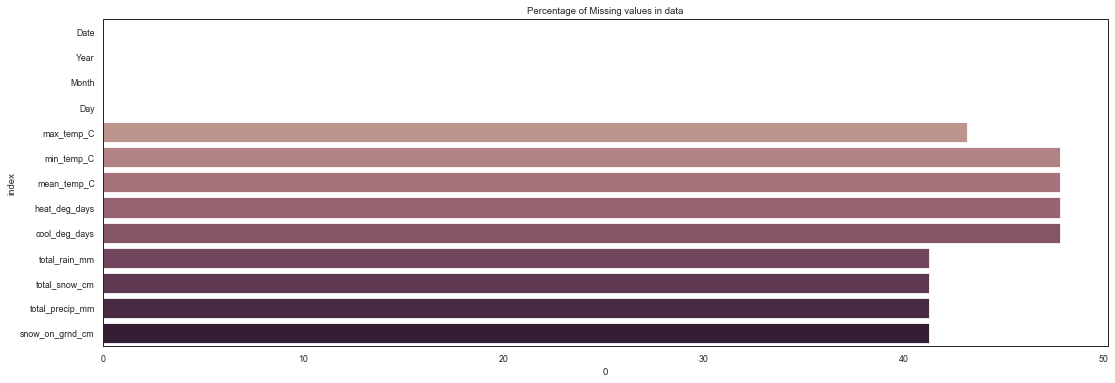

In [1652]:
Missing_Values = pd.DataFrame((ontario_climate.isnull().sum())*100/ontario_climate.shape[0]).reset_index()
MakeBarChart(18,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

Replace null with mean

In [1653]:
ontario_climate['max_temp_C'] = ontario_climate['max_temp_C'].fillna(ontario_climate['max_temp_C'].mean())
ontario_climate['min_temp_C'] = ontario_climate['min_temp_C'].fillna(ontario_climate['min_temp_C'].mean())
ontario_climate['mean_temp_C'] = ontario_climate['mean_temp_C'].fillna(ontario_climate['mean_temp_C'].mean())
ontario_climate['heat_deg_days'] = ontario_climate['heat_deg_days'].fillna(ontario_climate['heat_deg_days'].mean())
ontario_climate['cool_deg_days'] = ontario_climate['cool_deg_days'].fillna(ontario_climate['cool_deg_days'].mean())
ontario_climate['total_rain_mm'] = ontario_climate['total_rain_mm'].fillna(ontario_climate['total_rain_mm'].mean())
ontario_climate['total_snow_cm'] = ontario_climate['total_snow_cm'].fillna(ontario_climate['total_snow_cm'].mean())
ontario_climate['total_precip_mm'] = ontario_climate['total_precip_mm'].fillna(ontario_climate['total_precip_mm'].mean())
ontario_climate['snow_on_grnd_cm'] = ontario_climate['snow_on_grnd_cm'].fillna(ontario_climate['snow_on_grnd_cm'].mean())

In [1654]:
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
181  2015-07-01  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000
182  2015-07-02  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000
183  2015-07-03  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000
184  2015-07-04  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000
185  2015-07-05  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000

In [1655]:
ontario_climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 546
Data columns (total 13 columns):
Date               366 non-null object
Year               366 non-null int64
Month              366 non-null int64
Day                366 non-null int64
max_temp_C         366 non-null float64
min_temp_C         366 non-null float64
mean_temp_C        366 non-null float64
heat_deg_days      366 non-null float64
cool_deg_days      366 non-null float64
total_rain_mm      366 non-null float64
total_snow_cm      366 non-null float64
total_precip_mm    366 non-null float64
snow_on_grnd_cm    366 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 40.0+ KB


Checking Null Values Again

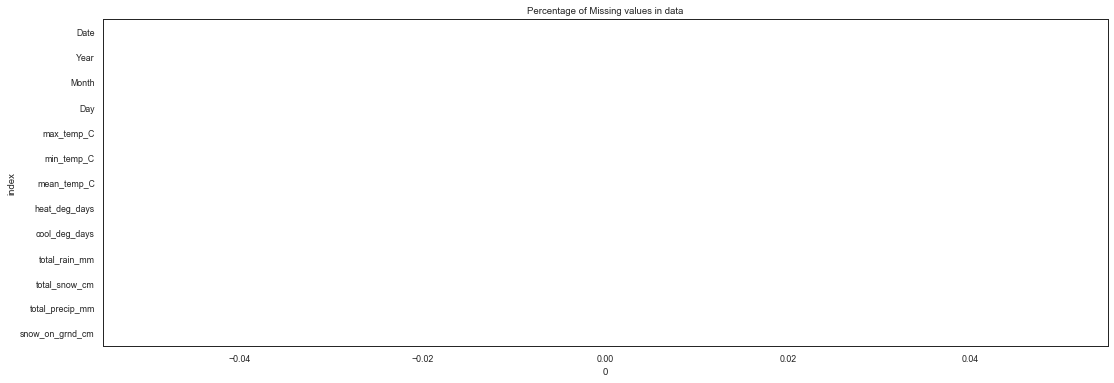

In [1656]:
Missing_Values = pd.DataFrame((ontario_climate.isnull().sum())*100/ontario_climate.shape[0]).reset_index()
MakeBarChart(18,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

All Null values have been treated

changing datype of Date column

In [1657]:
ontario_climate['Date'] = ontario_climate['Date'].apply(pd.to_datetime)

creating week column and map data

In [1658]:
ontario_climate['week'] = ontario_climate.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week']+53, ontario_climate['week'])

ontario_climate = ontario_climate.reset_index()
ontario_climate.drop('index',axis=1,inplace=True)
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  week
0 2015-07-01  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000    27
1 2015-07-02  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000    27
2 2015-07-03  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000    27
3 2015-07-04  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000    27
4 2015-07-05  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000    27

merging ontario_climate and cal_df

In [1659]:
cal_df = cal_df.merge(ontario_climate, 'left')

In [1660]:
cal_df.head()

Date  week  holiday_flag  PayDate  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0 2015-07-01    27             0        1  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000
1 2015-07-02    27             0        0  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000
2 2015-07-03    27             0        0  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000
3 2015-07-04    27             0        0  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000
4 2015-07-05    27             0        0  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000

- Marketing

importing Media Investment data

In [1661]:
media_investment_df = pd.read_excel("Media data and other information.xlsx", sheet_name='Media Investment', skipfooter = 4, skiprows=2)

In [1662]:
media_investment_df.head()

Unnamed: 0  Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates    SEM  Radio  Other
0         nan  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547  5.024    nan    nan
1         nan  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074  2.514    nan    nan
2         nan  2015      9            96.254 3.880    1.357       62.788              0.610            16.380        5.038  6.202    nan    nan
3         nan  2015     10           170.156 6.145   12.622       84.673              3.444            24.372        6.974 31.927    nan    nan
4         nan  2015     11            51.216 4.221    1.275       14.172              0.169            19.562        6.596  5.222    nan    nan

Drop Unnamed: 0 column

In [1663]:
media_investment_df.drop('Unnamed: 0', axis = 1, inplace = True)

Checking Null values

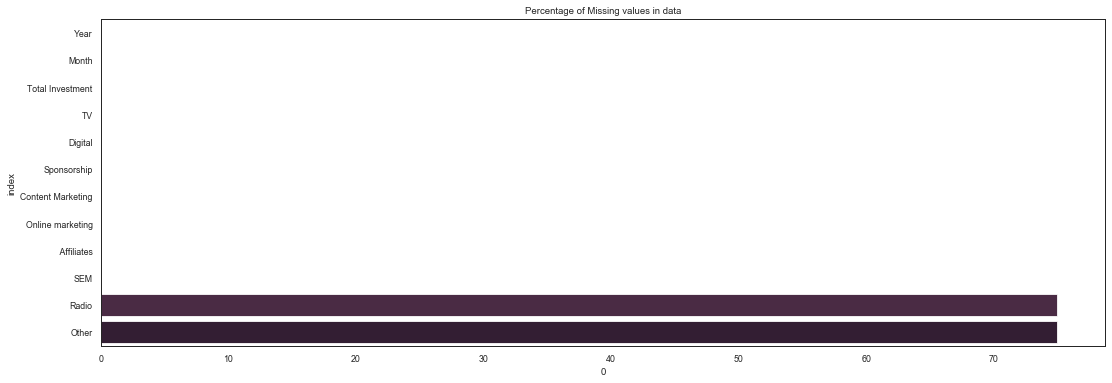

In [1664]:
Missing_Values = pd.DataFrame((media_investment_df.isnull().sum())*100/media_investment_df.shape[0]).reset_index()
MakeBarChart(18,6,"Percentage of Missing values in data",0,'index',Missing_Values)
plt.show()

Dropping columns Other and Radio

In [1665]:
media_investment_df.drop(['Other','Radio'], axis = 1, inplace = True)

In [1666]:
media_investment_df.head()

Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates    SEM
0  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547  5.024
1  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074  2.514
2  2015      9            96.254 3.880    1.357       62.788              0.610            16.380        5.038  6.202
3  2015     10           170.156 6.145   12.622       84.673              3.444            24.372        6.974 31.927
4  2015     11            51.216 4.221    1.275       14.172              0.169            19.562        6.596  5.222

Merging Year and Month into Date and set as index

In [1667]:
media_investment_df['Date'] = pd.to_datetime(media_investment_df[['Year', 'Month']].assign(DAY=1))
media_investment_df.set_index('Date', inplace = True)

In [1668]:
media_investment_df.head()

Year  Month  Total Investment    TV  Digital  Sponsorship  Content Marketing  Online marketing   Affiliates    SEM
Date                                                                                                                          
2015-07-01  2015      7            17.062 0.215    2.533        7.414              0.001             1.327        0.547  5.024
2015-08-01  2015      8             5.064 0.006    1.278        1.063              0.000             0.129        0.074  2.514
2015-09-01  2015      9            96.254 3.880    1.357       62.788              0.610            16.380        5.038  6.202
2015-10-01  2015     10           170.156 6.145   12.622       84.673              3.444            24.372        6.974 31.927
2015-11-01  2015     11            51.216 4.221    1.275       14.172              0.169            19.562        6.596  5.222

In [1669]:
media_investment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2015-07-01 to 2016-06-01
Data columns (total 10 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
dtypes: float64(8), int64(2)
memory usage: 1.0 KB


Renaming the columns

In [1670]:
media_investment_df.columns = ['Year','Month','Total_Investment','TV','Digital','Sponsorship','Content_marketing',
                     'Online_marketing','Affiliates','SEM']

In [1671]:
media_investment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2015-07-01 to 2016-06-01
Data columns (total 10 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total_Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content_marketing    12 non-null float64
Online_marketing     12 non-null float64
Affiliates           12 non-null float64
SEM                  12 non-null float64
dtypes: float64(8), int64(2)
memory usage: 1.0 KB


In [1672]:
media_investment_df

Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM
Date                                                                                                                         
2015-07-01  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547  5.024
2015-08-01  2015      8             5.064 0.006    1.278        1.063              0.000             0.129       0.074  2.514
2015-09-01  2015      9            96.254 3.880    1.357       62.788              0.610            16.380       5.038  6.202
2015-10-01  2015     10           170.156 6.145   12.622       84.673              3.444            24.372       6.974 31.927
2015-11-01  2015     11            51.216 4.221    1.275       14.172              0.169            19.562       6.596  5.222
2015-12-01  2015     12           106.745 5.398    3.063       56.705              1.067            22.504       6.827 11.181
2016-01-01  2016      1            74.196 4.380    0.456        4.200              0.900            22.900       7.370  4.200
2016-02-01  2016      2            48.052 2.586    1.913       11.726              0.597            19.892       6.465  4.874
2016-03-01  2016      3           100.025 9.300    2.100       41.590              0.370            18.438       6.218  5.194
2016-04-01  2016      4            56.848 5.205    0.872       24.308              0.035            16.515       5.693  4.220
2016-05-01  2016      5            78.057 1.370    0.770       31.680              0.790            23.650       6.800  6.910
2016-06-01  2016      6            42.834 1.663    1.421       25.049              0.045             7.971       2.768  3.736

In [1673]:
media_investment_df.index

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01'], dtype='datetime64[ns]', name='Date', freq=None)

add new next month for correct resample

In [1674]:
idx = media_investment_df.index[-1] + pd.offsets.MonthBegin(1)
idx

Timestamp('2016-07-01 00:00:00')

In [1675]:
media_investment_df = media_investment_df.append(media_investment_df.iloc[[-1]].rename({media_investment_df.index[-1]: idx}))
media_investment_df

Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM
Date                                                                                                                         
2015-07-01  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547  5.024
2015-08-01  2015      8             5.064 0.006    1.278        1.063              0.000             0.129       0.074  2.514
2015-09-01  2015      9            96.254 3.880    1.357       62.788              0.610            16.380       5.038  6.202
2015-10-01  2015     10           170.156 6.145   12.622       84.673              3.444            24.372       6.974 31.927
2015-11-01  2015     11            51.216 4.221    1.275       14.172              0.169            19.562       6.596  5.222
2015-12-01  2015     12           106.745 5.398    3.063       56.705              1.067            22.504       6.827 11.181
2016-01-01  2016      1            74.196 4.380    0.456        4.200              0.900            22.900       7.370  4.200
2016-02-01  2016      2            48.052 2.586    1.913       11.726              0.597            19.892       6.465  4.874
2016-03-01  2016      3           100.025 9.300    2.100       41.590              0.370            18.438       6.218  5.194
2016-04-01  2016      4            56.848 5.205    0.872       24.308              0.035            16.515       5.693  4.220
2016-05-01  2016      5            78.057 1.370    0.770       31.680              0.790            23.650       6.800  6.910
2016-06-01  2016      6            42.834 1.663    1.421       25.049              0.045             7.971       2.768  3.736
2016-07-01  2016      6            42.834 1.663    1.421       25.049              0.045             7.971       2.768  3.736

Resampling the data on weekly frequency

In [1676]:
media_investment_df = media_investment_df.resample('W').ffill().iloc[:-1]
media_investment_df.head()

Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM
Date                                                                                                                        
2015-07-05  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547 5.024
2015-07-12  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547 5.024
2015-07-19  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547 5.024
2015-07-26  2015      7            17.062 0.215    2.533        7.414              0.001             1.327       0.547 5.024
2015-08-02  2015      8             5.064 0.006    1.278        1.063              0.000             0.129       0.074 2.514

Divide by size of months

In [1677]:
media_investment_df['Total_Investment'] /= media_investment_df.resample('MS')['Total_Investment'].transform('size')
media_investment_df['TV'] /= media_investment_df.resample('MS')['TV'].transform('size')
media_investment_df['Digital'] /= media_investment_df.resample('MS')['Digital'].transform('size')
media_investment_df['Sponsorship'] /= media_investment_df.resample('MS')['Sponsorship'].transform('size')
media_investment_df['Content_marketing'] /= media_investment_df.resample('MS')['Content_marketing'].transform('size')
media_investment_df['Online_marketing'] /= media_investment_df.resample('MS')['Online_marketing'].transform('size')
media_investment_df['Affiliates'] /= media_investment_df.resample('MS')['Affiliates'].transform('size')
media_investment_df['SEM'] /= media_investment_df.resample('MS')['SEM'].transform('size')

In [1678]:
media_investment_df.head()

Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM
Date                                                                                                                        
2015-07-05  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256
2015-07-12  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256
2015-07-19  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256
2015-07-26  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256
2015-08-02  2015      8             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503

Creating week column and map data

In [1679]:
#reset index
media_investment_df.reset_index(inplace = True)
#change data type
media_investment_df['Date'] = pd.to_datetime(media_investment_df['Date'])

#create week column
media_investment_df['week'] = np.where(media_investment_df.Date.dt.year == 2015, (media_investment_df.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), media_investment_df.Date.dt.week+27)

media_investment_df.week.values[(media_investment_df.Date.dt.year == 2016) & (media_investment_df.week == 80)] = 27
media_investment_df.sort_values('week', inplace = True)

Calculate Ad Stocks for all type of advertisement media

In [1680]:
adstock= pd.DataFrame()

In [1681]:
def adstock_advertising(adstock_rate=0.5, advertising = media_investment_df):
    adstock_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstock_advertising.append(advertising.iloc[i])
        else:
            adstock_advertising.append(advertising.iloc[i] + adstock_rate * advertising.iloc[i-1])            
    return adstock_advertising

In [1682]:
adstock['TV_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['TV'])

adstock['Digital_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['Digital'])

adstock['Sponsorship_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['Sponsorship'])

adstock['Content_Marketing_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['Content_marketing'])

adstock['Online_Marketing_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['Online_marketing'])

adstock['Affiliates_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['Affiliates'])

adstock['SEM_ad'] = adstock_advertising(adstock_rate=0.5, advertising = media_investment_df['SEM'])

In [1683]:
adstock.head()

TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad
0  0.054       0.633           1.854                 0.000                0.332          0.137   1.256
1  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
2  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
3  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
4  0.028       0.572           1.139                 0.000                0.192          0.083   1.131

concat media_investment_df and adstock

In [1684]:
media_investment_df = pd.concat([media_investment_df,adstock] ,axis=1)

In [1685]:
media_investment_df.head()

Date  Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  week  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad
0 2015-07-05  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256     1  0.054       0.633           1.854                 0.000                0.332          0.137   1.256
1 2015-07-12  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256     2  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
2 2015-07-19  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256     3  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
3 2015-07-26  2015      7             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256     4  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
4 2015-08-02  2015      8             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503     5  0.028       0.572           1.139                 0.000                0.192          0.083   1.131

- NPS & Stock_Index

In [1686]:
nps_stock = pd.read_excel("Media data and other information.xlsx", sheet_name='Monthly NPS Score', skiprows=1)

In [1687]:
nps_stock.head()

Unnamed: 0  July'15   Aug'15  Sept'15   Oct'15   Nov'15   Dec'15   Jan'16   Feb'16   Mar'16   Apr'16   May'16  June'16
0          NPS   54.600   59.987   46.925   44.398   47.000   45.800   47.093   50.327   49.021   51.828   47.307   50.517
1  Stock Index 1177.000 1206.000 1101.000 1210.000 1233.000 1038.000 1052.000 1222.000 1015.000 1242.000 1228.000 1194.000

Transform data into columns of NPS an Stock Index

In [1688]:
nps_stock = nps_stock.T.reset_index(drop=True)
nps_stock.columns = ['NPS','Stock_Index']
nps_stock = nps_stock.drop(nps_stock.index[[0]]).reset_index(drop=True)

In [1689]:
nps_stock['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_stock['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [1690]:
nps_stock.head()

NPS Stock_Index  Month  Year
0 54.600    1177.000      7  2015
1 59.987    1206.000      8  2015
2 46.925    1101.000      9  2015
3 44.398    1210.000     10  2015
4 47.000    1233.000     11  2015

In [1691]:
nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
NPS            12 non-null object
Stock_Index    12 non-null object
Month          12 non-null int64
Year           12 non-null int64
dtypes: int64(2), object(2)
memory usage: 512.0+ bytes


Changing datatypes

In [1692]:
nps_stock['NPS'] = nps_stock['NPS'].astype(float)
nps_stock['Stock_Index'] = nps_stock['Stock_Index'].astype(float)

In [1693]:
nps_stock.head()

NPS  Stock_Index  Month  Year
0 54.600     1177.000      7  2015
1 59.987     1206.000      8  2015
2 46.925     1101.000      9  2015
3 44.398     1210.000     10  2015
4 47.000     1233.000     11  2015

In [1694]:
cal_df.head()

Date  week  holiday_flag  PayDate  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0 2015-07-01    27             0        1  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000
1 2015-07-02    27             0        0  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000
2 2015-07-03    27             0        0  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000
3 2015-07-04    27             0        0  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000
4 2015-07-05    27             0        0  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000

merging this to cal_df

In [1695]:
cal_df = cal_df.merge(nps_stock, 'left')

In [1696]:
cal_df.head()

Date  week  holiday_flag  PayDate  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm    NPS  Stock_Index
0 2015-07-01    27             0        1  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000 54.600     1177.000
1 2015-07-02    27             0        0  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000 54.600     1177.000
2 2015-07-03    27             0        0  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000 54.600     1177.000
3 2015-07-04    27             0        0  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000 54.600     1177.000
4 2015-07-05    27             0        0  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000 54.600     1177.000

In [1697]:
# We can create the week number
cal_df['week'] = np.where(cal_df.Date.dt.year == 2015, (cal_df.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), cal_df.Date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
cal_df.week.values[(cal_df.Date.dt.year == 2016) & (cal_df.week == 80)] = 27

In [1698]:
cal_df.head()

Date  week  holiday_flag  PayDate  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm    NPS  Stock_Index
0 2015-07-01     1             0        1  2015      7    1      24.500      17.000       20.800          0.000          2.800          0.000          0.000            0.000            0.000 54.600     1177.000
1 2015-07-02     1             0        0  2015      7    2      24.000      14.000       19.000          0.000          1.000          0.000          0.000            0.000            0.000 54.600     1177.000
2 2015-07-03     1             0        0  2015      7    3      25.000      10.000       17.500          0.500          0.000          0.000          0.000            0.000            0.000 54.600     1177.000
3 2015-07-04     1             0        0  2015      7    4      26.000      11.000       18.500          0.000          0.500          0.000          0.000            0.000            0.000 54.600     1177.000
4 2015-07-05     1             0        0  2015      7    5      28.000      14.000       21.000          0.000          3.000          0.000          0.000            0.000            0.000 54.600     1177.000

In [1699]:
cal_df = pd.DataFrame(cal_df.groupby('week').agg({'NPS':'mean','Stock_Index':'mean',
                                                             'holiday_flag':'mean','PayDate':'mean',
                                                             'max_temp_C':'mean','min_temp_C':'mean',
                                                             'mean_temp_C':'mean','heat_deg_days':'mean',
                                                             'cool_deg_days':'mean','total_rain_mm':'mean',
                                                             'total_snow_cm':'mean','total_precip_mm':'mean',
                                                             'snow_on_grnd_cm':'mean'}))

In [1700]:
cal_df.reset_index(inplace = True)

In [1701]:
cal_df.head()

week    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

In [1702]:
consumer_eda=consumer_cp.copy(deep=True)

### Creating some visuals

For 3 categories we have already filtered out the data, i.e. GamingAccessory, CameraAccessory & HomeAudio that we will use graphs to test

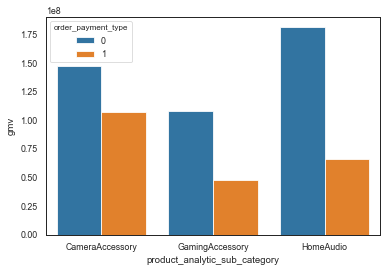

In [1703]:
#gmv is our target variable
GMV_Pay = consumer_eda.groupby(["order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="order_payment_type", data=GMV_Pay)

```1 is prepaid and 0 is COD here```

-  Max revenue for COD order is from the class Home Audio followed by Camera Accessory, then Gaming Accessory

-  For prepaid orders, the maximum revenue is from Camera Accessory, followed by Home Audio and a slight decrease in the category of Gaming Accessories

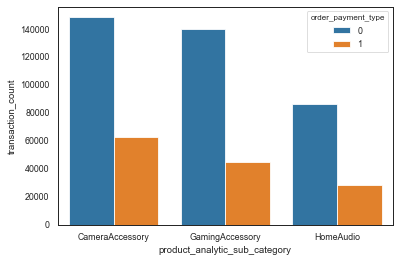

In [1704]:
## Order Count vs Payment Type
OC_Payment = consumer_eda.groupby(["order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="order_payment_type", data=OC_Payment)

- For Camera Accessory , maximum number of orders are by COD mode.
-  For Gaming Accesrsory , maximum orders are again from COD mode.
- For Home Audio also, maimum orders are from COD mode.

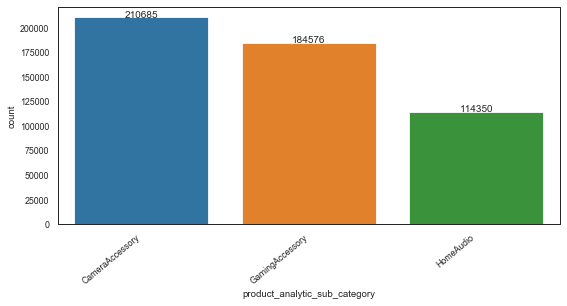

In [1705]:
# No of transactions by Sub-Category

plt.figure(figsize = (9,4))
ax = sns.countplot(consumer_eda['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

Based on our analysis , maximum number of transaction were from Camera Accessory category, then Gaming Accessory , followed by Home Audio category

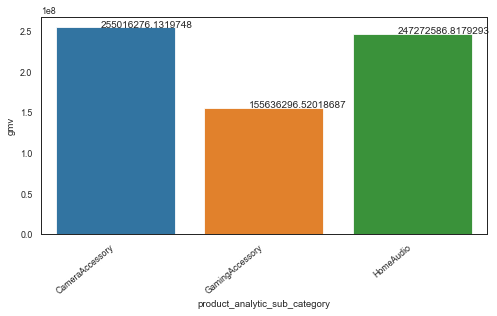

In [1706]:
## Total GMV by Sub-Category
plot_gmv =consumer_eda.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=plot_gmv)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

The most number of transactions are for Camera Accessory followed by Home Audio  & then Gamming Audio

- Comparing Distribution of Discount% for 2 product types - Luxury or not.

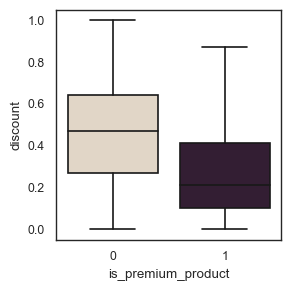

In [1707]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(3, 3), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.boxplot(x='is_premium_product', y='discount', palette='ch:.25', data=consumer_eda)
# plot legend

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

- Here 1 signifies the luxury products and there is significantly less discount on all luxury products.

### No of Premium items sold per 3 product subcategories

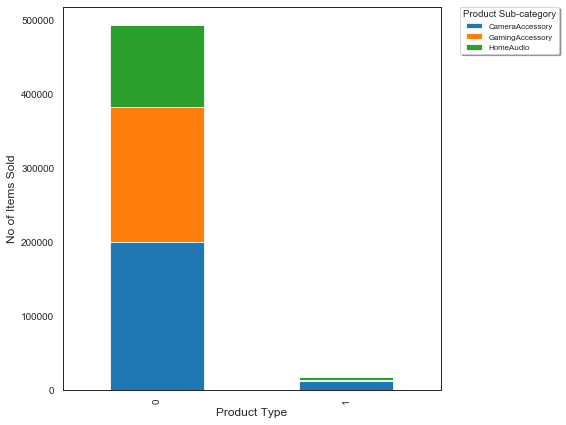

In [1708]:
consumer_eda.groupby(["is_premium_product", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                             fontsize = 10) 
# plot x axis label
plt.xlabel('Product Type', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()


#### From the above graph, we have the following observations:
 - Most of the units sold belonged to the mass market category. 
 - Among mass market products sold, Camera and Gaming Accessories related products were sold the most. 
 - Home Audio products were the most popular among the luxury products sold

### Total items sold per 3 product subcategories per Month

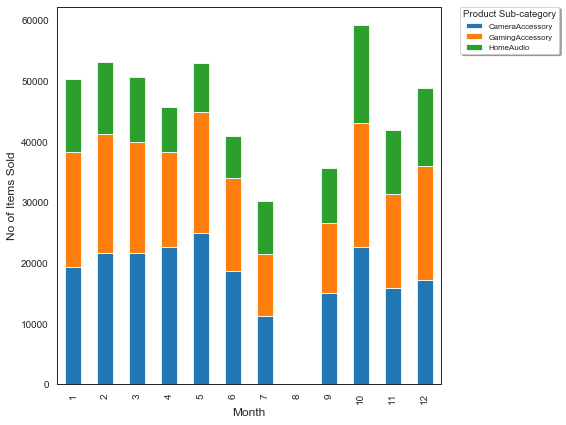

In [1709]:

consumer_eda.groupby(["Month", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Month', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()


### Total items sold per 3 product subcategories per Week

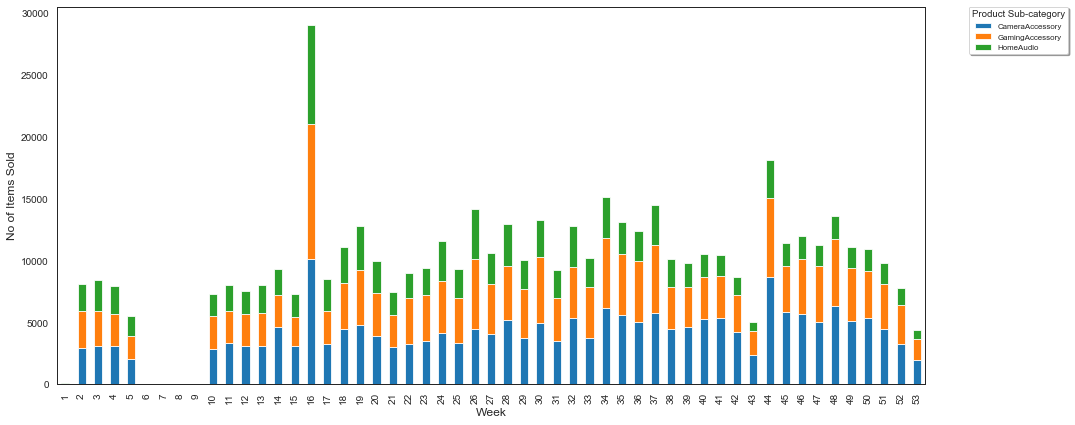

In [1710]:

consumer_eda.groupby(["week", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(15,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Week', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()


#### The sale on the 42nd week (`Thanksgiving week`) is maximum. Overall, October has seen most no of items being sold.

### Top 10 Product Verticals which brought the Maximum Revenue for 3 product sub-categories

In [1711]:

highest_gmv = pd.DataFrame(consumer_eda.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum().sort_values(ascending=False).reset_index()).head(10)
highest_gmv['product_in_category'] = highest_gmv[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
highest_gmv.head(20)


product_analytic_sub_category product_analytic_vertical           gmv               product_in_category
0                     HomeAudio          HomeAudioSpeaker 195879880.818     HomeAudioSpeaker in HomeAudio
1               CameraAccessory                      Lens 111611880.000           Lens in CameraAccessory
2               GamingAccessory                   GamePad  61436457.709        GamePad in GamingAccessory
3               GamingAccessory             GamingHeadset  31848936.531  GamingHeadset in GamingAccessory
4               CameraAccessory                Binoculars  27373880.500     Binoculars in CameraAccessory
5               GamingAccessory               GamingMouse  25889217.885    GamingMouse in GamingAccessory
6                     HomeAudio                   FMRadio  22882519.000              FMRadio in HomeAudio
7               CameraAccessory             CameraBattery  22494945.508  CameraBattery in CameraAccessory
8               CameraAccessory                 CameraBag  22429667.000      CameraBag in CameraAccessory
9               CameraAccessory                     Flash  22016647.000          Flash in CameraAccessory

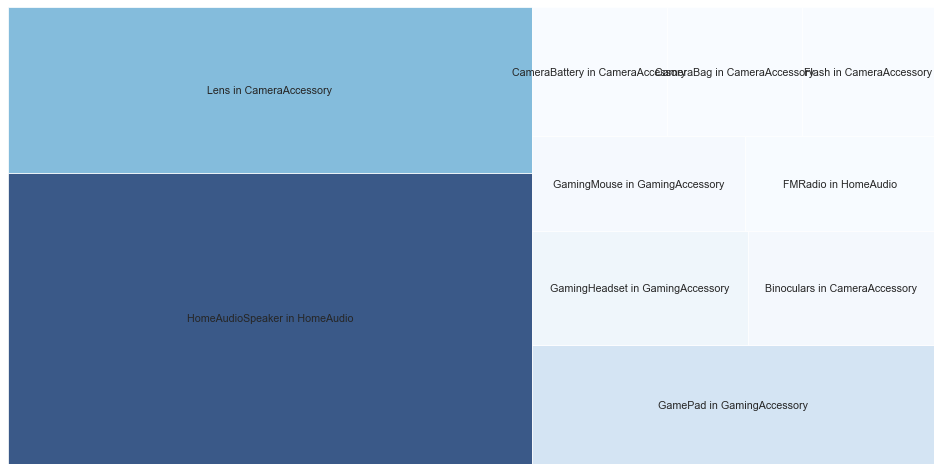

In [1712]:

import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(highest_gmv['gmv'])
import matplotlib
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=highest_gmv['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()


#### `homeaudiospeaker in homeaudio` brought the largest revenue followed by `lens in cameraaccessory` & `gamepad in gamingaccessory`.

### Top 10 Product Verticals with most no of sales for 3 product sub-categories

In [1713]:
most_sales = pd.DataFrame(consumer_eda.groupby(['product_analytic_sub_category','product_analytic_vertical'])['units'].count().sort_values(ascending=False).reset_index()).head(10)
most_sales['product_in_category'] = most_sales[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
most_sales.head(20)

product_analytic_sub_category product_analytic_vertical  units               product_in_category
0                     HomeAudio          HomeAudioSpeaker  79480     HomeAudioSpeaker in HomeAudio
1               GamingAccessory             GamingHeadset  59517  GamingHeadset in GamingAccessory
2               GamingAccessory                   GamePad  52725        GamePad in GamingAccessory
3               CameraAccessory                     Flash  47469          Flash in CameraAccessory
4               GamingAccessory               GamingMouse  34648    GamingMouse in GamingAccessory
5               CameraAccessory             CameraBattery  33894  CameraBattery in CameraAccessory
6               CameraAccessory              CameraTripod  32830   CameraTripod in CameraAccessory
7               CameraAccessory                      Lens  30637           Lens in CameraAccessory
8                     HomeAudio                   FMRadio  25206              FMRadio in HomeAudio
9               CameraAccessory                 CameraBag  15721      CameraBag in CameraAccessory

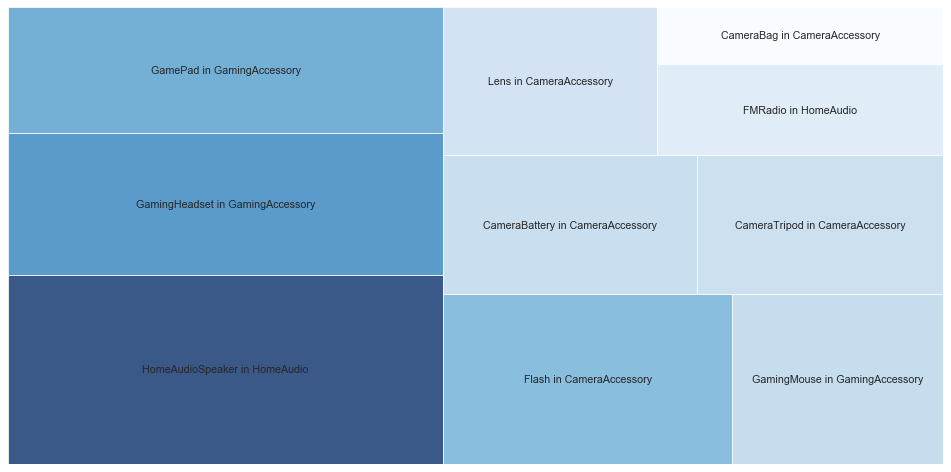

In [1714]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(most_sales['units'])
import matplotlib
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=most_sales['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

#### `homeaudiospeaker in homeaudio` had the most no of sales followed by  `gamingheadset & gamepad in gamingaccessory`.

## Create 3 separate dataframes for 3 product subcategories - camera accessory, home audio and gaming accessory

In [1715]:
consumer_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509611 entries, 0 to 1542378
Data columns (total 19 columns):
fsn_id                           509611 non-null object
order_date                       509611 non-null datetime64[ns]
Year                             509611 non-null int64
Month                            509611 non-null int64
order_id                         509611 non-null int64
order_item_id                    509611 non-null int64
gmv                              509611 non-null float64
units                            509611 non-null int64
order_payment_type               509611 non-null int64
sla                              509611 non-null int64
product_analytic_category        509611 non-null object
product_analytic_sub_category    509611 non-null object
product_analytic_vertical        509611 non-null object
product_mrp                      509611 non-null float64
product_procurement_sla          509611 non-null int64
listing_price                    509611 non-nu

In [1716]:
consumer_cp.shape

(509611, 19)

In [1717]:
consumer_cp['product_analytic_sub_category'].value_counts()

CameraAccessory    210685
GamingAccessory    184576
HomeAudio          114350
Name: product_analytic_sub_category, dtype: int64

In [1718]:
camera_df = consumer_cp.loc[consumer_cp['product_analytic_sub_category']=='CameraAccessory']
gaming_df = consumer_cp.loc[consumer_cp['product_analytic_sub_category']=='GamingAccessory']
homeaudio_df = consumer_cp.loc[consumer_cp['product_analytic_sub_category']=='HomeAudio']

# Camera Accesories

In [1719]:
camera_df.shape

(210685, 19)

In [1720]:
camera_df.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  discount  week  is_premium_product
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000  3419300926147000 6400.000      1                   0    5           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6400.000     0.110    16                   1
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200  1420830839915200 6900.000      1                   0    7           CameraAccessory               CameraAccessory              CameraTripod     7190.000                        0       6900.000     0.040    17                   1
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800  2421912925714800 1990.000      1                   0   10           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1990.000     0.050    17                   0
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400  4416592101738400 1690.000      1                   1    4           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1690.000     0.190    16                   0
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400  4419525153426400 1618.000      1                   1    6           CameraAccessory               CameraAccessory              CameraTripod     2099.000                        3       1618.000     0.230    16                   0

### Aggregate Data on week basis

In [1721]:
#aggreagrate data on mean and sum for numerical columns
camera_df_week = pd.DataFrame(camera_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'is_premium_product':'sum'}))

camera_df_week.reset_index( inplace = True)

In [1722]:
camera_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product
0     1   18196.000        649.857     1428.107     0.479 2.500                    2.750      22             28        28                  28                   0
1     2 4081557.000       1383.415     2449.378     0.433 7.100                    2.749     737           2913      2865                 973                 176
2     3 4675000.000       1482.522     2532.481     0.438 6.435                    2.789     725           3115      3081                1067                 197
3     4 4452052.000       1414.818     2491.889     0.431 6.441                    2.838     720           3082      3044                1008                 197
4     5 2974282.000       1436.885     2448.445     0.425 6.400                    2.789     603           2042      2008                 616                 138

In [1723]:
camera_df_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53])

In [1724]:
cal_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [1725]:
media_investment_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [1726]:
#change datatype before merge
camera_df_week['week'] = camera_df_week['week'].astype(int)
cal_df['week'] = cal_df['week'].astype(int)

In [1727]:
#merge camera_df and media_df
camera_df_week = camera_df_week.merge(media_investment_df, how = 'left', on = 'week')

In [1728]:
camera_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad
0     1   18196.000        649.857     1428.107     0.479 2.500                    2.750      22             28        28                  28                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256
1     2 4081557.000       1383.415     2449.378     0.433 7.100                    2.749     737           2913      2865                 973                 176 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
2     3 4675000.000       1482.522     2532.481     0.438 6.435                    2.789     725           3115      3081                1067                 197 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
3     4 4452052.000       1414.818     2491.889     0.431 6.441                    2.838     720           3082      3044                1008                 197 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
4     5 2974282.000       1436.885     2448.445     0.425 6.400                    2.789     603           2042      2008                 616                 138 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131

In [1729]:
cal_df.head()

week    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

In [1730]:
#merge camera_df and media_df
camera_df_week = camera_df_week.merge(cal_df, how = 'left', on = 'week')

In [1731]:
camera_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1   18196.000        649.857     1428.107     0.479 2.500                    2.750      22             28        28                  28                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 4081557.000       1383.415     2449.378     0.433 7.100                    2.749     737           2913      2865                 973                 176 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 4675000.000       1482.522     2532.481     0.438 6.435                    2.789     725           3115      3081                1067                 197 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 4452052.000       1414.818     2491.889     0.431 6.441                    2.838     720           3082      3044                1008                 197 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 2974282.000       1436.885     2448.445     0.425 6.400                    2.789     603           2042      2008                 616                 138 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

#### Moving Avergae Camera Accesory

In [1732]:
# Moving Average for listing_price and discount



camera_df_week[['MA2_LP','MA2_Discount']] = camera_df_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
camera_df_week[['MA3_LP','MA3_Discount']] = camera_df_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
camera_df_week[['MA4_LP','MA4_Discount']] = camera_df_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

# Reference listed price Inflation 

camera_df_week['MA2_listed_price'] = (camera_df_week['listing_price']-camera_df_week['MA2_LP'])/camera_df_week['MA2_LP']
camera_df_week['MA3_listed_price'] = (camera_df_week['listing_price']-camera_df_week['MA3_LP'])/camera_df_week['MA3_LP']
camera_df_week['MA4_listed_price'] = (camera_df_week['listing_price']-camera_df_week['MA4_LP'])/camera_df_week['MA4_LP']

# Reference discount Inflation

camera_df_week['MA2_discount_offer'] = (camera_df_week['discount']-camera_df_week['MA2_Discount'])/camera_df_week['MA2_Discount']
camera_df_week['MA3_discount_offer'] = (camera_df_week['discount']-camera_df_week['MA3_Discount'])/camera_df_week['MA3_Discount']
camera_df_week['MA4_discount_offer'] = (camera_df_week['discount']-camera_df_week['MA4_Discount'])/camera_df_week['MA4_Discount']


camera_df_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
camera_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1   18196.000        649.857     1428.107     0.479 2.500                    2.750      22             28        28                  28                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 4081557.000       1383.415     2449.378     0.433 7.100                    2.749     737           2913      2865                 973                 176 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361             0.361             0.361              -0.050              -0.050              -0.050
2     3 4675000.000       1482.522     2532.481     0.438 6.435                    2.789     725           3115      3081                1067                 197 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.035             0.265             0.265               0.005              -0.027              -0.027
3     4 4452052.000       1414.818     2491.889     0.431 6.441                    2.838     720           3082      3044                1008                 197 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.023            -0.008             0.148              -0.008              -0.007              -0.032
4     5 2974282.000       1436.885     2448.445     0.425 6.400                    2.789     603           2042      2008                 616                 138 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.008            -0.005        

Camera Accessory - multicollinearity between revenue and other variables

In [1733]:
#Find Highly correlated data and drop Highly Correlated Columns

correlation_0 = camera_df_week.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[(correlation_0 > 0.95) | (correlation_0 < -0.95)]
print(round(corr,2))

is_premium_product    gmv                    0.960
gmv                   is_premium_product     0.960
MA4_discount_offer    MA3_discount_offer     0.960
MA3_discount_offer    MA4_discount_offer     0.960
SEM_ad                Content_Marketing_ad   0.960
Content_Marketing_ad  SEM_ad                 0.960
SEM                   Content_marketing      0.960
Content_marketing     SEM                    0.960
Digital_ad            Digital                0.970
Digital               Digital_ad             0.970
min_temp_C            heat_deg_days          0.970
heat_deg_days         min_temp_C             0.970
mean_temp_C           max_temp_C             0.970
max_temp_C            mean_temp_C            0.970
SEM                   SEM_ad                 0.970
SEM_ad                SEM                    0.970
Content_Marketing_ad  Content_marketing      0.970
Content_marketing     Content_Marketing_ad   0.970
Sponsorship_ad        Sponsorship            0.970
Sponsorship           Sponsorsh

In [1734]:
camera_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

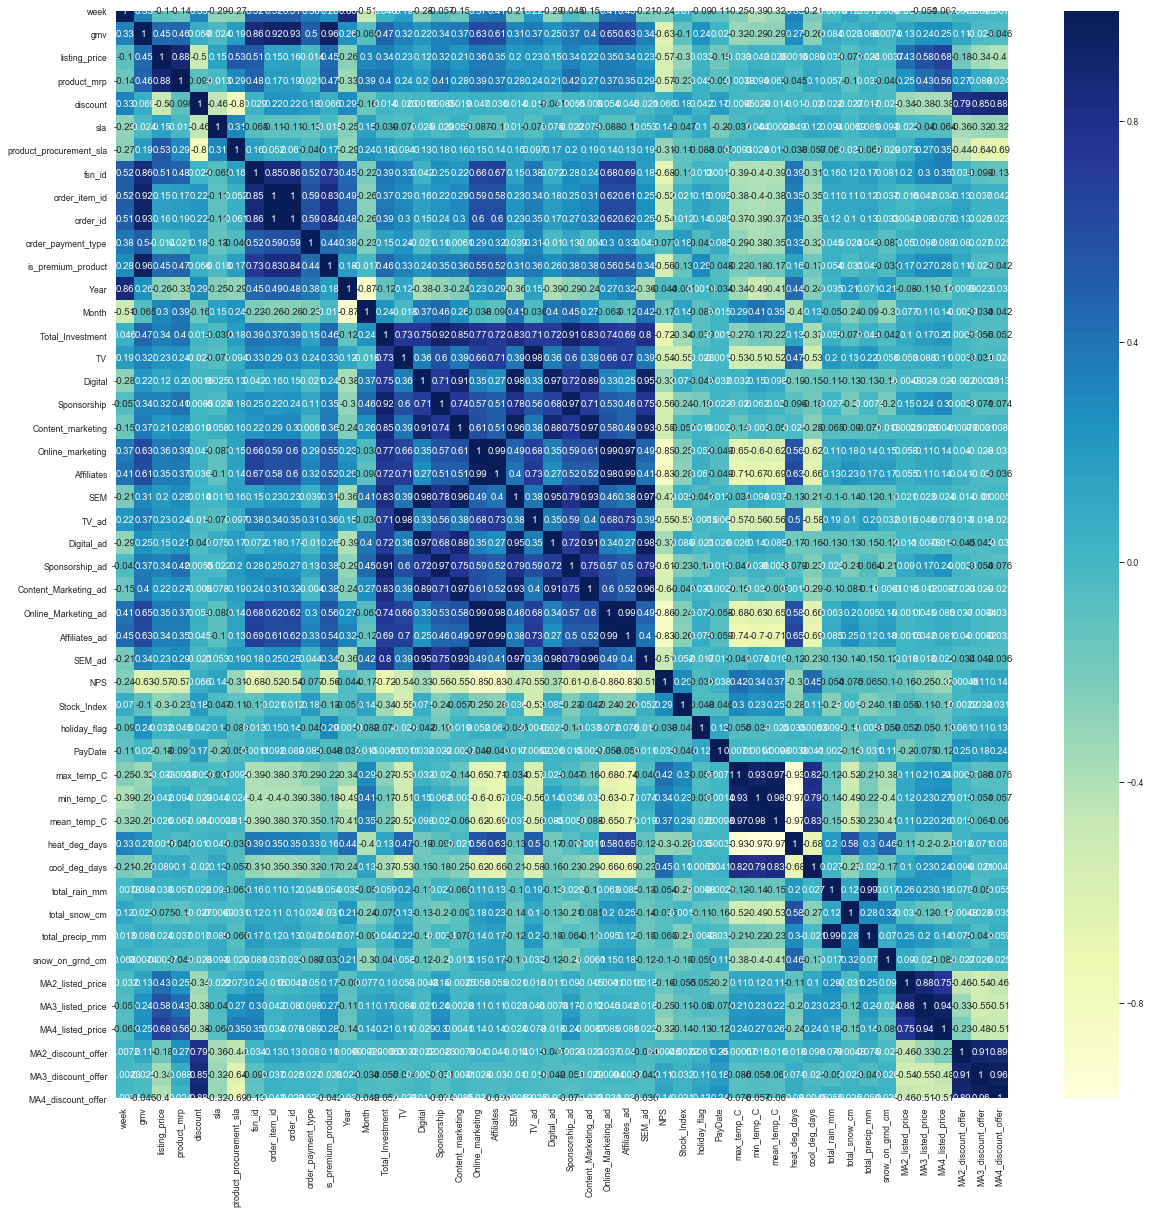

In [1735]:
plt.figure(figsize=(20,20))
sns.heatmap(camera_df_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [1736]:
camera_df_week_cp = camera_df_week.copy(deep=True)

In [1737]:
camera_df_week_cp.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1   18196.000        649.857     1428.107     0.479 2.500                    2.750      22             28        28                  28                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 4081557.000       1383.415     2449.378     0.433 7.100                    2.749     737           2913      2865                 973                 176 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361             0.361             0.361              -0.050              -0.050              -0.050
2     3 4675000.000       1482.522     2532.481     0.438 6.435                    2.789     725           3115      3081                1067                 197 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.035             0.265             0.265               0.005              -0.027              -0.027
3     4 4452052.000       1414.818     2491.889     0.431 6.441                    2.838     720           3082      3044                1008                 197 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.023            -0.008             0.148              -0.008              -0.007              -0.032
4     5 2974282.000       1436.885     2448.445     0.425 6.400                    2.789     603           2042      2008                 616                 138 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.008            -0.005        

In [1738]:
camera_df_week_cp.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [1739]:
#Lets not drop highly correlated variable

#camera_df_week_cp.drop(['order_id', 'Affiliates_ad', 'Online_marketing', 'total_rain_mm','TV_ad', 'Digital', 'Year_y','SEM_ad',
#              'Sponsorship_ad','Content_Marketing_ad','mean_temp_C'], axis = 1, inplace = True)

#Drop some items not required one like 'order_id','order_item_id' and not dropping highly correlated items
camera_df_week_cp.drop(['fsn_id', 'order_item_id','order_id','week','Date', 'Year', 'Month',
                       'product_mrp','Total_Investment'],axis = 1, inplace = True)

### Lag variables for Distributed model

In [1740]:

camera_df_week_cp['lag_1_listed_price'] = camera_df_week_cp['listing_price'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_listed_price'] = camera_df_week_cp['listing_price'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_listed_price'] = camera_df_week_cp['listing_price'].shift(-3).fillna(0)

camera_df_week_cp['lag_1_discount'] = camera_df_week_cp['discount'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_discount'] = camera_df_week_cp['discount'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_discount'] = camera_df_week_cp['discount'].shift(-3).fillna(0)

camera_df_week_cp['lag_1_Stock_Index'] = camera_df_week_cp['Stock_Index'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_Stock_Index'] = camera_df_week_cp['Stock_Index'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_Stock_Index'] = camera_df_week_cp['Stock_Index'].shift(-3).fillna(0)

camera_df_week_cp['lag_1_holiday_flag'] = camera_df_week_cp['holiday_flag'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_holiday_flag'] = camera_df_week_cp['holiday_flag'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_holiday_flag'] = camera_df_week_cp['holiday_flag'].shift(-3).fillna(0)

camera_df_week_cp['lag_1_PayDate'] = camera_df_week_cp['PayDate'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_PayDate'] = camera_df_week_cp['PayDate'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_PayDate'] = camera_df_week_cp['PayDate'].shift(-3).fillna(0)

camera_df_week_cp['lag_1_NPS'] = camera_df_week_cp['NPS'].shift(-1).fillna(0)
camera_df_week_cp['lag_2_NPS'] = camera_df_week_cp['NPS'].shift(-2).fillna(0)
camera_df_week_cp['lag_3_NPS'] = camera_df_week_cp['NPS'].shift(-3).fillna(0)

In [1741]:
camera_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   18196.000        649.857     0.479 2.500                    2.750                  28                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000            1383.415            1482.522            1414.818           0.433           0.438           0.431           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 4081557.000       1383.415     0.433 7.100                    2.749                 973                 176 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361             0.361             0.361              -0.050              -0.050              -0.050            1482.522            1414.818            1436.885           0.438           0.431           0.425           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 4675000.000       1482.522     0.438 6.435                    2.789                1067                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.035             0.265             0.265               0.005              -0.027              -0.027            1414.818            1436.885             749.000           0.431           0.425           0.260           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 4452052.000       1414.818     0.431 6.441                    2.838                1008                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

# Modeling 

## Camera Accesory

#### Linear Model

In [1742]:
camera_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   18196.000        649.857     0.479 2.500                    2.750                  28                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000            1383.415            1482.522            1414.818           0.433           0.438           0.431           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 4081557.000       1383.415     0.433 7.100                    2.749                 973                 176 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361             0.361             0.361              -0.050              -0.050              -0.050            1482.522            1414.818            1436.885           0.438           0.431           0.425           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 4675000.000       1482.522     0.438 6.435                    2.789                1067                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.035             0.265             0.265               0.005              -0.027              -0.027            1414.818            1436.885             749.000           0.431           0.425           0.260           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 4452052.000       1414.818     0.431 6.441                    2.838                1008                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

In [1743]:
camera_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [1744]:
 model_columns1 = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

model1 = camera_df_week_cp[model_columns1]

In [1745]:
model1.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   18196.000     0.479 2.500                    2.750                  28                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4081557.000     0.433 7.100                    2.749                 973                 176 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361              -0.050
2 4675000.000     0.438 6.435                    2.789                1067                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.265               0.005
3 4452052.000     0.431 6.441                    2.838                1008                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.148              -0.008
4 2974282.000     0.425 6.400                    2.789                 616                 138 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.005              -0.007

In [1746]:
#function to get all required columns in the model and fill it with 0 for null values
def intitalModel():

    model_columns = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

    model = camera_df_week_cp[model_columns]
    model.fillna(0, inplace = True)
    return model

Split data into train and test

In [1747]:
np.random.seed(0)
df_train, df_test= train_test_split(intitalModel(),train_size=0.7,test_size = 0.3,random_state=60)
print(df_train.shape)
print(df_test.shape)

(36, 35)
(16, 35)


Rescaling Techniques
2 methods
1. Min-Max/Normalisation - b/w 0 and 1
2. Standarisation - mean=0 sigma=1

In [1748]:



scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
14 1.000     0.462 0.542                    0.682               0.695                 712 0.661    1.000        1.000              1.000             1.000       1.000 1.000  0.661       1.000           1.000                 1.000                1.000          1.000   1.000 0.000        0.859         0.429    0.143       0.389       0.488        0.502          0.413          0.292          0.129          0.079            0.137            0.027             0.458               0.435
36 0.348     0.467 0.508                    0.473               0.237                 201 1.000    0.142        0.486              0.107             0.755       0.891 0.106  1.000       0.142           0.486                 0.107                0.755          0.891   0.106 0.297        0.000         0.000    0.143       0.187       0.301        0.303          0.605          0.162          0.066          0.026            0.069            0.009             0.407               0.389
28 0.527     0.377 0.559                    0.558               0.299                 384 0.376    0.000        0.030              0.209             0.751       0.844 0.045  0.376       0.000           0.030                 0.209                0.751          0.844   0.045 0.173        0.163         0.429    0.000       0.152       0.487        0.501          0.450          0.378          0.187          0.131            0.200            0.045             0.523               0.342
16 0.416     0.352 0.570                    0.665               0.231                 216 0.363    0.053        0.125              0.039             0.641       0.755 0.072  0.462       0.369           0.417                 0.359                0.760          0.836   0.382 0.024        0.874         0.000    0.143       0.404       0.435        0.439          0.482          0.270          0.213          0.131            0.226            0.045             0.404               0.377
9  0.371     0.319 0.558                    0.642               0.245                 224 0.417    0.081        0.739              0.177             0.671       0.720 0.140  0.417       0.081           0.739                 0.177                0.671          0.720   0.140 0.162        0.379         0.000    0.000       0.632       0.785        0.734          0.196          0.456          0.144          0.052            0.149            0.018             0.854               0.359

In [1749]:
df_train.describe()

gmv  discount    sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
count 36.000    36.000 36.000                   36.000              36.000              36.000 36.000   36.000       36.000             36.000            36.000      36.000 36.000 36.000      36.000          36.000                36.000               36.000         36.000  36.000 36.000       36.000        36.000   36.000      36.000      36.000       36.000         36.000         36.000         36.000         36.000           36.000           36.000            36.000              36.000
mean   0.371     0.389  0.537                    0.544               0.263             215.944  0.395    0.170        0.333              0.193             0.612       0.678  0.176  0.391       0.176           0.332                 0.202                0.613          0.676   0.182  0.328        0.555         0.119    0.073       0.440       0.470        0.483          0.456          0.339          0.252          0.161            0.268            0.068             0.450               0.346
std    0.178     0.140  0.134                    0.150               0.191             127.500  0.300    0.262        0.318              0.265             0.324       0.346  0.262  0.292       0.263           0.302                 0.264                0.323          0.346   0.263  0.276        0.355         0.223    0.075       0.283       0.288        0.280          0.272          0.240          0.216          0.256            0.223            0.170             0.176               0.144
min    0.000     0.000  0.000                    0.000               0.000               0.000  0.000    0.000        0.000              0.000             0.000       0.000  0.000  0.000       0.000           0.000                 0.000                0.000          0.000   0.000  0.000        0.000         0.000    0.000       0.000       0.000        0.000          0.000          0.000          0.000          0.000            0.000            0.000             0.000               0.000
25%    0.342     0.319  0.492                    0.489               0.197             186.750  0.163    0.050        0.078              0.012             0.561       0.638  0.058  0.148       0.054           0.078                 0.033                0.468          0.510   0.069  0.162        0.163         0.000    0.000       0.193       0.265        0.279          0.200          0.202          0.134          0.052            0.140            0.018             0.377               0.301
50%    0.384     0.376  0.541                    0.566               0.237             205.500  0.376    0.086        0.280              0.173             0.751       0.829  0.101  0.376       0.085           0.289                 0.173                0.751          0.842   0.101  0.289        0.714         0.000    0.071       0.400       0.425        0.453          0.460          0.270          0.191          0.079            0.206            0.027             0.423               0.351
75%    0.422     0.436  0.572                    0.607               0.262             242.000  0.580    0.177        0.531              0.209             0.785       0.900  0.123  0.580       0.168           0.486                 0.209                0.797          0.900   0.134  0.383        0.859         0.286    0.143       0.637       0.708        0.710          0.640          0.439          0.269          0.131            0.276            0.045             0.525               0.378
max    1.000     1.000  1.000                    1.000           

In [1750]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
y_train = df_train.pop('gmv')
X_train = df_train

In [1751]:
#Running RFE with the output number of the variable equalt to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [1752]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', False, 5),
 ('sla', False, 3),
 ('product_procurement_sla', False, 8),
 ('order_payment_type', True, 1),
 ('is_premium_product', False, 25),
 ('TV', False, 10),
 ('Digital', False, 16),
 ('Sponsorship', False, 7),
 ('Content_marketing', True, 1),
 ('Online_marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('TV_ad', False, 24),
 ('Digital_ad', True, 1),
 ('Sponsorship_ad', False, 6),
 ('Content_Marketing_ad', True, 1),
 ('Online_Marketing_ad', False, 2),
 ('Affiliates_ad', True, 1),
 ('SEM_ad', True, 1),
 ('NPS', True, 1),
 ('Stock_Index', False, 11),
 ('holiday_flag', False, 4),
 ('PayDate', False, 12),
 ('max_temp_C', False, 23),
 ('min_temp_C', False, 21),
 ('mean_temp_C', False, 18),
 ('heat_deg_days', False, 13),
 ('cool_deg_days', False, 17),
 ('total_rain_mm', False, 15),
 ('total_snow_cm', False, 22),
 ('total_precip_mm', False, 14),
 ('snow_on_grnd_cm', False, 20),
 ('MA4_listed_price', False, 19),
 ('MA2_discount_offer', False, 9)]

In [1753]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Digital_ad', 'Content_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS'], dtype='object')

In [1754]:
X_train.columns[~rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'TV_ad', 'Sponsorship_ad', 'Online_Marketing_ad', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Building model using statsmodel, for the detailed analysis

In [1755]:
X_train_rfe = X_train[col]

In [1756]:
X_train_rfe.head()

order_payment_type  Content_marketing  Online_marketing  Affiliates   SEM  Digital_ad  Content_Marketing_ad  Affiliates_ad  SEM_ad   NPS
14               0.695              1.000             1.000       1.000 1.000       1.000                 1.000          1.000   1.000 0.000
36               0.237              0.107             0.755       0.891 0.106       0.142                 0.107          0.891   0.106 0.297
28               0.299              0.209             0.751       0.844 0.045       0.000                 0.209          0.844   0.045 0.173
16               0.231              0.039             0.641       0.755 0.072       0.369                 0.359          0.836   0.382 0.024
9                0.245              0.177             0.671       0.720 0.140       0.081                 0.177          0.720   0.140 0.162

Define Function for build_model and VIF

In [1757]:
# It will give the detailed stats model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model 1 using RFE

In [1758]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     10.64
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.41e-07
Time:                        23:31:28   Log-Likelihood:                 41.473
No. Observations:                  36   AIC:                            -60.95
Df Residuals:                      25   BIC:                            -43.53
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5706 

In [1759]:
checkVIF(X_train_new)

Features     VIF
4             Affiliates 680.050
3       Online_marketing 588.260
9                 SEM_ad 534.140
7   Content_Marketing_ad 364.240
2      Content_marketing 326.060
5                    SEM 297.980
6             Digital_ad 195.410
8          Affiliates_ad  78.100
0                  const  58.070
10                   NPS   8.280
1     order_payment_type   2.110

In [1760]:
#Drop Content_Marketing_ad because p-value>0.05
X_train_new = X_train_new.drop(["Content_Marketing_ad"], axis = 1)

Model 2

In [1761]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     11.94
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.43e-07
Time:                        23:31:28   Log-Likelihood:                 41.038
No. Observations:                  36   AIC:                            -62.08
Df Residuals:                      26   BIC:                            -46.24
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5657      0

As p-value for Content_marketing is > 0.05 so remove Content_marketing and update the model

Model 3

In [1762]:
X_train_new = X_train_new.drop(['Content_marketing'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     13.38
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.34e-07
Time:                        23:31:28   Log-Likelihood:                 40.437
No. Observations:                  36   AIC:                            -62.87
Df Residuals:                      27   BIC:                            -48.62
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5385      0

Features     VIF
3          Affiliates 644.790
2    Online_marketing 541.570
7              SEM_ad 244.280
5          Digital_ad 194.970
6       Affiliates_ad  70.710
0               const  54.260
4                 SEM  41.090
8                 NPS   8.130
1  order_payment_type   1.850

As P-value for SEM is > 0.05 so remove SEM and update the model

Model 4

In [1763]:
X_train_new = X_train_new.drop(['SEM'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     14.99
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.79e-08
Time:                        23:31:28   Log-Likelihood:                 39.635
No. Observations:                  36   AIC:                            -63.27
Df Residuals:                      28   BIC:                            -50.60
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5592      0

Features     VIF
3          Affiliates 578.250
2    Online_marketing 410.470
6              SEM_ad 244.270
4          Digital_ad 170.490
5       Affiliates_ad  66.140
0               const  52.730
7                 NPS   8.110
1  order_payment_type   1.700

As VIF of Affiliates>5 so drop it and  update the model

Model 5

In [1764]:
X_train_new = X_train_new.drop(['Affiliates'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     10.31
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.04e-06
Time:                        23:31:28   Log-Likelihood:                 32.158
No. Observations:                  36   AIC:                            -50.32
Df Residuals:                      29   BIC:                            -39.23
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4659      0

Features    VIF
5              SEM_ad 87.010
3          Digital_ad 71.350
0               const 50.130
2    Online_marketing 33.420
4       Affiliates_ad 32.020
6                 NPS  6.810
1  order_payment_type  1.330

Dropping ```'Online_marketing'```

Model 6

In [1765]:
X_train_new = X_train_new.drop(['Online_marketing'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     12.61
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.22e-06
Time:                        23:31:28   Log-Likelihood:                 31.969
No. Observations:                  36   AIC:                            -51.94
Df Residuals:                      30   BIC:                            -42.44
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4680      0

Features    VIF
4              SEM_ad 69.990
2          Digital_ad 59.900
0               const 50.080
5                 NPS  6.760
3       Affiliates_ad  4.850
1  order_payment_type  1.280

Dropping ```'Affiliates_ad'``` 

Model 7

In [1766]:
X_train_new = X_train_new.drop(['Affiliates_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     16.24
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.84e-07
Time:                        23:31:28   Log-Likelihood:                 31.940
No. Observations:                  36   AIC:                            -53.88
Df Residuals:                      31   BIC:                            -45.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4437      0

Features    VIF
3              SEM_ad 69.960
2          Digital_ad 59.900
0               const 12.990
4                 NPS  3.280
1  order_payment_type  1.080

Dropping ```'SEM_ad'``` 

Model 8

In [1767]:
X_train_new = X_train_new.drop(['SEM_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     20.23
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.54e-07
Time:                        23:31:28   Log-Likelihood:                 30.743
No. Observations:                  36   AIC:                            -53.49
Df Residuals:                      32   BIC:                            -47.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3800      0

Features   VIF
0               const 7.040
3                 NPS 1.240
2          Digital_ad 1.170
1  order_payment_type 1.080

Dropping ```'Digital_ad'``` 

Model 9

In [1768]:
X_train_new = X_train_new.drop(['Digital_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     30.89
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.76e-08
Time:                        23:31:28   Log-Likelihood:                 30.587
No. Observations:                  36   AIC:                            -55.17
Df Residuals:                      33   BIC:                            -50.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3913      0

Features   VIF
0               const 5.650
1  order_payment_type 1.080
2                 NPS 1.080

Model 9 looks good as all p-value <0.05 and VIF <5

Residual Analysis of Model

In [1769]:
X_train_new.describe()

const  order_payment_type    NPS
count 36.000              36.000 36.000
mean   1.000               0.263  0.328
std    0.000               0.191  0.276
min    1.000               0.000  0.000
25%    1.000               0.197  0.162
50%    1.000               0.237  0.289
75%    1.000               0.262  0.383
max    1.000               1.000  1.000

In [1770]:
#Get the model by passing final model variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

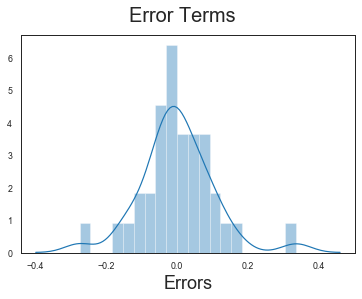

In [1771]:
#calculate the residuals
residual=y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

 Predictions and Evaluation on the Test Set

In [1772]:
#Scaling the test set
# num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
#         'TV_ad','Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad',
#        'NPS', 'Stock_Index', 'heat_deg_days', 'cool_deg_days', 
#        'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
#        'MA2_discount_offer']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1773]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [1774]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

Model Evaluation

In [1775]:
#predict
y_test_pred = lm.predict(X_test_new)

In [1776]:
mse = np.mean((y_pred - y)**2)
mse

0.0008984628488757037

In [1777]:
#Evaluate 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.3249046856398735

Text(0, 0.5, 'y_pred')

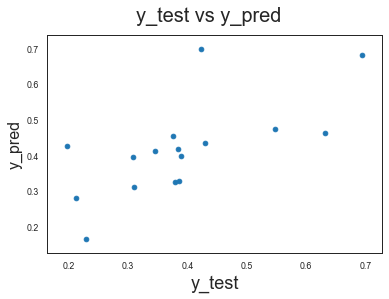

In [1778]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [1779]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     30.89
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.76e-08
Time:                        23:31:29   Log-Likelihood:                 30.587
No. Observations:                  36   AIC:                            -55.17
Df Residuals:                      33   BIC:                            -50.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3913      0

# Koyck Model

The Koyck tells us that the current revenue generated is not just influenced by the different independent attributes, but also because of the revenue generated over the last periods. ie. Current revenue(Yt) is also dependent on the past revenue values(Yt-1).*


  __Yt__ = __α__ +             __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__
  
  __Yt__ = __α__ + __µYt-1__ + __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__  -- (sale at time t is dependent on sale at time t-1)

*If 	X1 is the advertising effect, β1 is the current effect of advertising, carry over effect of advertising is β1 * µ/(1-µ).*

*Therefore the total effect of advertising  = Current effect + Carry over effect*

                                            = β1 + β1 * µ/(1-µ)	

											= β1/(1-µ)

In [1780]:
camera_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [1781]:
camera_df_km = camera_df_week[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]           


camera_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   18196.000     0.479 2.500                    2.750                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4081557.000     0.433 7.100                    2.749                 973 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361              -0.050
2 4675000.000     0.438 6.435                    2.789                1067 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.265               0.005
3 4452052.000     0.431 6.441                    2.838                1008 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.148              -0.008
4 2974282.000     0.425 6.400                    2.789                 616 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.005              -0.007

In [1782]:
camera_df_km['lag_1_gmv'] = camera_df_km['gmv'].shift(-1)

In [1783]:
# check nan values
camera_df_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV                         1
Digital                    1
Sponsorship                1
Content_marketing          1
Online_marketing           1
Affiliates                 1
SEM                        1
TV_ad                      1
Digital_ad                 1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
Affiliates_ad              1
SEM_ad                     1
NPS                        0
Stock_Index                0
max_temp_C                 0
min_temp_C                 0
mean_temp_C                0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
total_precip_mm            0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_gmv                  1
dtype: int64

In [1784]:
#fill it with 0 
camera_df_km = camera_df_km.fillna(0)
camera_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer   lag_1_gmv
0   18196.000     0.479 2.500                    2.750                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000 4081557.000
1 4081557.000     0.433 7.100                    2.749                 973 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361              -0.050 4675000.000
2 4675000.000     0.438 6.435                    2.789                1067 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.265               0.005 4452052.000
3 4452052.000     0.431 6.441                    2.838                1008 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.148              -0.008 2974282.000
4 2974282.000     0.425 6.400                    2.789                 616 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.005              -0.007    1498.000

In [1785]:

scaler = MinMaxScaler()

num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer','lag_1_gmv']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

camera_df_km[num_vars] = scaler.fit_transform(camera_df_km[num_vars])
camera_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_gmv
0 0.001     0.370 0.000                    0.583               0.005 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.015       0.134           0.058                 0.000                0.036          0.052   0.105 0.654        0.714       0.785       0.809        0.793          0.000          0.247          0.000          0.000            0.000            0.000             0.445               0.347      0.314
1 0.314     0.294 0.657                    0.583               0.191 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.712       0.882        0.788          0.069          0.393          0.420          0.019            0.421            0.009             0.677               0.287      0.359
2 0.359     0.302 0.562                    0.596               0.209 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.879       1.000        0.934          0.051          0.799          0.159          0.019            0.161            0.009             0.615               0.354      0.342
3 0.342     0.290 0.563                    0.613               0.198 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.922       0.879        0.859          0.109          0.706          0.115          0.019            0.118            0.009             0.540               0.338      0.229
4 0.229     0.280 0.557                    0.596               0.121 0.001    0.081        0.010              0.000             0.004       0.008 0.063  0.008       0.121           0.036                 0.000                0.021          0.032   0.094 0.753        0.750       1.000       0.996        1.000          0.051          1.000          0.439          0.019            0.440            0.009             0.449               0.339      0.000

In [1786]:
#Split data into train and test
X = camera_df_km.drop('gmv',axis=1)
y = camera_df_km['gmv']

camera_df_train_km = camera_df_km
print(X.shape)
print(y.shape)

(52, 32)
(52,)


In [1787]:
#  Instantiate
km = LinearRegression()

#  Fit a line
km.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1788]:
#  Coefficient values

coef = pd.DataFrame(X.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount        1.161
1                       sla        0.251
2   product_procurement_sla        0.592
3        order_payment_type        0.451
4                        TV       -0.605
5                   Digital        0.316
6               Sponsorship        0.474
7         Content_marketing        0.553
8          Online_marketing       -0.459
9                Affiliates        0.077
10                      SEM       -1.079
11                    TV_ad        0.300
12               Digital_ad        2.609
13           Sponsorship_ad       -0.740
14     Content_Marketing_ad       -1.810
15      Online_Marketing_ad        3.724
16            Affiliates_ad       -2.363
17                   SEM_ad       -0.935
18                      NPS       -0.409
19              Stock_Index       -0.251
20               max_temp_C       -0.391
21               min_temp_C       -0.378
22              mean_temp_C        0.356
23            heat_deg_days       -0.353
24            cool_deg_days        0.253
25            total_rain_mm       -0.019
26            total_snow_cm        0.018
27          total_precip_mm       -0.017
28          snow_on_grnd_cm        0.009
29         MA4_listed_price        0.193
30       MA2_discount_offer       -0.494
31                lag_1_gmv       -0.183

In [1789]:
col = X.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_gmv'], dtype='object')

Model Building - Stepwise selection for feature selection

In [1790]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1791]:
final_features = stepwise_selection(X, y)

print("\n","final_selected_features:",final_features)

Drop Affiliates                     with p-value 0.984278
Drop snow_on_grnd_cm                with p-value 0.948501
Drop Digital                        with p-value 0.908155
Drop total_snow_cm                  with p-value 0.907522
Drop total_precip_mm                with p-value 0.930439
Drop total_rain_mm                  with p-value 0.639117
Drop Content_marketing              with p-value 0.624342
Drop SEM                            with p-value 0.789337
Drop TV_ad                          with p-value 0.574641
Drop Sponsorship                    with p-value 0.522468
Drop Online_marketing               with p-value 0.543646
Drop MA4_listed_price               with p-value 0.325611
Drop lag_1_gmv                      with p-value 0.297351
Drop MA2_discount_offer             with p-value 0.356596
Drop min_temp_C                     with p-value 0.14531
Drop max_temp_C                     with p-value 0.241485
Drop cool_deg_days                  with p-value 0.46411
Drop heat_deg_da

In [1792]:
# function to build model

def build_model(y,x_rfe):
    x_rfe = sm.add_constant(x_rfe)
    # Fitting the model with selected variables
    model = sm.OLS(y, x_rfe).fit() 
    print(model.summary())
    return x_rfe
    
    
def checkVIF(x_rfe):
    vif = pd.DataFrame()
    vif['Features'] = x_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_rfe.values, i) for i in range(x_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    

In [1793]:
# Subsetting training data for 15 selected columns
x_rfe1 = X[final_features]
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     16.99
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.90e-12
Time:                        23:31:30   Log-Likelihood:                 65.330
No. Observations:                  52   AIC:                            -106.7
Df Residuals:                      40   BIC:                            -83.25
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2481 

Dropping ```'Online_Marketing_ad'```

Model 2

In [1794]:
x_rfe1.drop('Online_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     9.701
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.80e-08
Time:                        23:31:30   Log-Likelihood:                 51.758
No. Observations:                  52   AIC:                            -81.52
Df Residuals:                      41   BIC:                            -60.05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1119 

Dropping ```'Stock_Index'``` 

Model 3

In [1795]:
x_rfe1.drop('Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.89e-08
Time:                        23:31:30   Log-Likelihood:                 51.337
No. Observations:                  52   AIC:                            -82.67
Df Residuals:                      42   BIC:                            -63.16
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1119 

Dropping ```'Content_Marketing_ad'``` 

Model 4

In [1796]:
x_rfe1.drop('Content_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     11.84
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.02e-08
Time:                        23:31:30   Log-Likelihood:                 50.458
No. Observations:                  52   AIC:                            -82.92
Df Residuals:                      43   BIC:                            -65.36
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0667      0

Dropping ```'SEM_ad'``` 

Model 5

In [1797]:
x_rfe1.drop('SEM_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     13.14
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.42e-09
Time:                        23:31:30   Log-Likelihood:                 49.540
No. Observations:                  52   AIC:                            -83.08
Df Residuals:                      44   BIC:                            -67.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0643      0

Dropping ```'Digital_ad'``` 

Model 6

In [1798]:
x_rfe1.drop('Digital_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     15.09
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.26e-09
Time:                        23:31:30   Log-Likelihood:                 48.865
No. Observations:                  52   AIC:                            -83.73
Df Residuals:                      45   BIC:                            -70.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0534      0

Dropping ```'Affiliates_ad'``` 

Model 7

In [1799]:
x_rfe1.drop('Affiliates_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.67e-09
Time:                        23:31:30   Log-Likelihood:                 47.438
No. Observations:                  52   AIC:                            -82.88
Df Residuals:                      46   BIC:                            -71.17
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2850      0

Model 8

Dropping ```'Sponsorship_ad'``` 

In [1800]:
x_rfe1.drop('Sponsorship_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     20.49
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.96e-10
Time:                        23:31:30   Log-Likelihood:                 46.443
No. Observations:                  52   AIC:                            -82.89
Df Residuals:                      47   BIC:                            -73.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2675      0

Dropping ```'mean_temp_C'``` 

In [1801]:
x_rfe1.drop('mean_temp_C', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     26.16
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.57e-10
Time:                        23:31:30   Log-Likelihood:                 45.391
No. Observations:                  52   AIC:                            -82.78
Df Residuals:                      48   BIC:                            -74.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3231      0

Dropping ```'sla'``` 

In [1802]:
x_rfe1.drop('sla', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     37.59
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.28e-10
Time:                        23:31:30   Log-Likelihood:                 44.377
No. Observations:                  52   AIC:                            -82.75
Df Residuals:                      49   BIC:                            -76.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4149      0

In [1803]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'NPS']

In [1804]:
# Model Evaluation on testing data
x_test = X[features]

#x_test
### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_test))

In [1805]:
# Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.010623516892056557

In [1806]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0               const        1.161
1  order_payment_type        0.251
2                 NPS        0.592

In [1807]:
# Using K-Fold Cross validation evaluating on whole dataset

fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,X[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.01224615 0.00149188 0.0185019  0.00167913 0.00979916 0.00976841
 0.00181801 0.04977758 0.00942978 0.0180895 ] 

Mean of 5 KFold CV - MSE: 0.013260148335915883


Text(0, 0.5, 'y_pred')

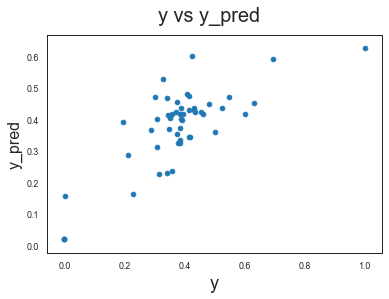

In [1808]:
# Plot y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              
plt.xlabel('y', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

# Distributed Lag Model

In [1809]:
camera_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [1810]:
camera_dlm = camera_df_week_cp[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 
        'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 
        'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 
        'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS']]           


camera_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   18196.000     0.479 2.500                    2.750                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000            1383.415            1482.522            1414.818           0.433           0.438           0.431           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 4081557.000     0.433 7.100                    2.749                 973 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361              -0.050            1482.522            1414.818            1436.885           0.438           0.431           0.425           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 4675000.000     0.438 6.435                    2.789                1067 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.265               0.005            1414.818            1436.885             749.000           0.431           0.425           0.260           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 4452052.000     0.431 6.441                    2.838                1008 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.148              -0.008            1436.885             749.000             299.000           0.425           0.260           0.850           1185.286           1206.000           1206.000               0.000               0.000               0.286          0.143          0.000          0.143     56.139     59.987     59.987
4 2974282.000     0.425 6.400                    2.789                 616 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.

In [1811]:
camera_dlm['lag_1_gmv'] = camera_dlm['gmv'].shift(-1)
camera_dlm['lag_2_gmv'] = camera_dlm['gmv'].shift(-2)
camera_dlm['lag_3_gmv'] = camera_dlm['gmv'].shift(-3)

In [1812]:
#checking null
camera_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV                         1
Digital                    1
Sponsorship                1
Content_marketing          1
Online_marketing           1
Affiliates                 1
SEM                        1
TV_ad                      1
Digital_ad                 1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
Affiliates_ad              1
SEM_ad                     1
NPS                        0
Stock_Index                0
max_temp_C                 0
min_temp_C                 0
mean_temp_C                0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
total_precip_mm            0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_2_listed_price         0
lag_3_listed_p

In [1813]:
camera_dlm.fillna(0, inplace = True)

In [1814]:
camera_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

In [1815]:

scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
            'MA2_discount_offer','lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 
            'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 
            'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 
            'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv']

#Scale these variables using 'fit_transform'
camera_dlm[num_vars] = scaler.fit_transform(camera_dlm[num_vars])

In [1816]:
camera_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS  lag_1_gmv  lag_2_gmv  lag_3_gmv
0 0.001     0.370 0.000                    0.583               0.005 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.015       0.134           0.058                 0.000                0.036          0.052   0.105 0.654        0.714       0.785       0.809        0.793          0.000          0.247          0.000          0.000            0.000            0.000             0.445               0.347               0.875               0.938               0.895           0.510           0.515           0.507              0.948              0.948              0.948               0.000               0.286               0.000          0.000          1.000          0.000      0.910      0.910      0.910      0.314      0.359      0.342
1 0.314     0.294 0.657                    0.583               0.191 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.712       0.882        0.788          0.069          0.393          0.420          0.019            0.421            0.009             0.677               0.287               0.938               0.895               0.909           0.515           0.507           0.500              0.948              0.948              0.954               0.286               0.000               0.000          1.000          0.000          1.000      0.910      0.910      0.936      0.359      0.342      0.229
2 0.359     0.302 0.562                    0.596               0.209 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.879       1.000        0.934          0.051          0.799          0.159          0.019            0.161            0.009             0.615               0.354               0.895               0.909               0.474           0.507           0.500           0.306              0.948              0.954              0.971               0.000               0.000               0.000          0.000          1.000          0.000      0.910      0.936      1.000      0.342      0.229      0.000
3 0.342     0.290 0.563                    0.613               0.198 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.922       0.879        0.859          0.109          0.706          0.115          0.019            0.118            0.009             0.540               0.338               0.909               0.474               0.189           0.500           0.306           1.000              0.954              0.971              0.971               0.000               0.000               0.286          1.000          0.000          1.000      0.936      1.000      1.000      0.229      0.000      0.000
4 0.229     0.280 0.557                    0.596               0.121 0.001    0.081        0.010              0.000    

In [1817]:
# Split the train dataset into X and y
x = camera_dlm.drop('gmv',axis=1)
y = camera_dlm['gmv']

camera_train_dlm = camera_dlm

In [1818]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 52)
y dataset:  (52,)


In [1819]:
#  Instantiate
dlm = LinearRegression()

#  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1820]:
#  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        0.522
1                       sla        0.826
2   product_procurement_sla        0.563
3        order_payment_type        0.752
4                        TV       -0.741
5                   Digital       -0.377
6               Sponsorship        3.000
7         Content_marketing        4.639
8          Online_marketing      -13.889
9                Affiliates       14.877
10                      SEM       -5.311
11                    TV_ad        0.048
12               Digital_ad        4.084
13           Sponsorship_ad       -4.317
14     Content_Marketing_ad       -6.762
15      Online_Marketing_ad       18.841
16            Affiliates_ad      -18.259
17                   SEM_ad        3.793
18                      NPS       -0.655
19              Stock_Index       -1.098
20               max_temp_C        0.820
21               min_temp_C        0.880
22              mean_temp_C       -0.528
23            heat_deg_days       -0.054
24            cool_deg_days       -1.743
25            total_rain_mm       -0.237
26            total_snow_cm       -0.584
27          total_precip_mm       -0.325
28          snow_on_grnd_cm        1.194
29         MA4_listed_price       -0.823
30       MA2_discount_offer        0.817
31       lag_1_listed_price        0.329
32       lag_2_listed_price        0.483
33       lag_3_listed_price       -0.590
34           lag_1_discount        0.805
35           lag_2_discount        2.296
36           lag_3_discount        0.414
37        lag_1_Stock_Index        2.121
38        lag_2_Stock_Index        3.503
39        lag_3_Stock_Index       -4.768
40       lag_1_holiday_flag       -0.509
41       lag_2_holiday_flag       -0.046
42       lag_3_holiday_flag       -0.862
43            lag_1_PayDate        0.941
44            lag_2_PayDate        1.019
45            lag_3_PayDate        0.323
46                lag_1_NPS       -2.837
47                lag_2_NPS       -6.047
48                lag_3_NPS        4.718
49                lag_1_gmv       -1.472
50                lag_2_gmv       -0.923
51                lag_3_gmv       -0.543

In [1821]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

#### Model building - Stepwise Selection

In [1822]:
def stepwise_selection(x, y,
                       initial_list=col,
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1823]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TV_ad                          with p-value 0.862418
Drop Digital                        with p-value 0.628953
Drop mean_temp_C                    with p-value 0.221127
Drop heat_deg_days                  with p-value 0.191092

 final_selected_features: ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'l

In [1824]:
#  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
dlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     412.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.22e-05
Time:                        23:31:31   Log-Likelihood:                 240.83
No. Observations:                  52   AIC:                            -385.7
Df Residuals:                       4   BIC:                            -292.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.7016      0.140      5.006      0.007       0.312       1.091
discount                    0.6334      0.153      4.136      0.014       0.208       1.059
sla                         0.7413      0.072     10.326      0.000       0.542       0.941
product_procurement_sla     0.6094      0.073      8.323      0.001       0.406       0.813
order_payment_type          0.7039      0.035     19.999      0.000       0.606       0.802
TV                         -0.7834      0.047    -16.666      0.000      -0.914      -0.653
Sponsorship                 2.4763      0.202     12.262      0.000       1.916       3.037
Content_marketing           3.9152      0.486      8.054      0.001       2.566       5.265
Online_marketing          -12.8582      0.805    -15.964      0.000     -15.094     -10.622
Affiliates                 13.7819      0.865     15.938      0.000      11.381      16.183
SEM                        -4.5886      0.587     -7.817      0.001      -6.218      -2.959
Digital_ad                  4.3343      0.283     15.308      0.000       3.548       5.120
Sponsorship_ad             -3.8171      0.207    -18.471      0.000      -4.391      -3.243
Content_Marketing_ad       -6.4270      0.504    -12.748      0.000      -7.827      -5.027
Online_Marketing_ad        18.1300      0.953     19.026      0.000      15.484      20.776
Affiliates_ad             -17.2542      0.993    -17.371      0.000     -20.012     -14.496
SEM_ad                      2.8419      0.606      4.688      0.009       1.159       4.525
NPS                        -0.4377      0.087     -5.044      0.007      -0.679      -0.197
Stock_Index                -1.1141      0.036    -31.037      0.000      -1.214      -1.014
max_temp_C                  0.6470      0.054     12.087      0.000       0.498       0.796
min_temp_C                  0.4621      0.067      6.915      0.002       0.277       0.648
cool_deg_days              -1.4824      0.141    -10.508      0.000      -1.874      -1.091
total_rain_mm              -0.2080      0.014    -15.092      0.000      -0.246      -0.170
total_snow_cm              -0.4646      0.037    -12.640      0.000      -0.567      -0.363
total_precip_mm            -0.2777      0.018    -15.129      0.000      -0.329      -0.227
snow_on_grnd_cm             0.9728      0.100      9.721      0.001       0.695       1.251
MA4_listed_price           -0.6537      0.079     -8.259      0.001      -0.873      -0.434
MA2_discount_offer          0.7241      0.108      6.680      0.003       0.423       1.025
lag_1_listed_price          0.3932      0.051      7.679      0.002       0.251       0.535
lag_2_listed_price          0.5509      0.032     17.125      0.000       0.462       0.640
lag_3_listed_price         -0.5355      0.034  

In [1825]:
checkVIF(x_rfe1)

                   Features       VIF
24          total_precip_mm       inf
23            total_snow_cm       inf
22            total_rain_mm       inf
15            Affiliates_ad 74448.060
14      Online_Marketing_ad 60329.200
9                Affiliates 57160.140
8          Online_marketing 44267.230
0                     const 14141.120
10                      SEM 13775.020
16                   SEM_ad 12980.120
7         Content_marketing 11122.490
13     Content_Marketing_ad 10568.770
36        lag_3_Stock_Index  5376.080
45                lag_3_NPS  4618.330
11               Digital_ad  3029.890
44                lag_2_NPS  2662.270
6               Sponsorship  2579.540
12           Sponsorship_ad  2430.070
35        lag_2_Stock_Index  1950.300
21            cool_deg_days   792.800
41            lag_2_PayDate   762.670
40            lag_1_PayDate   650.590
43                lag_1_NPS   412.720
17                      NPS   331.470
34        lag_1_Stock_Index   293.320
1           

Model 2

Dropping ```''total_snow_cm'```

In [1826]:
x_rfe1.drop('total_snow_cm', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     412.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.22e-05
Time:                        23:31:31   Log-Likelihood:                 240.83
No. Observations:                  52   AIC:                            -385.7
Df Residuals:                       4   BIC:                            -292.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```''Affiliates_ad'``` 

Model 3

In [1827]:
x_rfe1.drop('Affiliates_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     6.780
Date:                Mon, 02 Mar 2020   Prob (F-statistic):             0.0202
Time:                        23:31:31   Log-Likelihood:                 128.08
No. Observations:                  52   AIC:                            -162.2
Df Residuals:                       5   BIC:                            -70.45
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Online_marketing'``` 

Model 4

In [1828]:
x_rfe1.drop('Online_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     7.625
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00831
Time:                        23:31:31   Log-Likelihood:                 125.86
No. Observations:                  52   AIC:                            -159.7
Df Residuals:                       6   BIC:                            -69.96
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_3_gmv'``` 

Model 5

In [1829]:
x_rfe1.drop('lag_3_gmv', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     9.098
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00261
Time:                        23:31:31   Log-Likelihood:                 125.86
No. Observations:                  52   AIC:                            -161.7
Df Residuals:                       7   BIC:                            -73.91
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_3_discount'``` 

Model 6

In [1830]:
x_rfe1.drop('lag_3_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     6.217
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00513
Time:                        23:31:31   Log-Likelihood:                 112.20
No. Observations:                  52   AIC:                            -136.4
Df Residuals:                       8   BIC:                            -50.55
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'total_rain_mm'``` 

Model 7

In [1831]:
x_rfe1.drop('total_rain_mm', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     7.038
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00195
Time:                        23:31:31   Log-Likelihood:                 111.77
No. Observations:                  52   AIC:                            -137.5
Df Residuals:                       9   BIC:                            -53.63
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_listed_price'```

Model 8

In [1832]:
x_rfe1.drop('lag_2_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     6.799
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00135
Time:                        23:31:31   Log-Likelihood:                 107.64
No. Observations:                  52   AIC:                            -131.3
Df Residuals:                      10   BIC:                            -49.33
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'total_precip_mm'``` 

Model 9

In [1833]:
x_rfe1.drop('total_precip_mm', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     7.649
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           0.000471
Time:                        23:31:31   Log-Likelihood:                 107.58
No. Observations:                  52   AIC:                            -133.2
Df Residuals:                      11   BIC:                            -53.17
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_NPS'``` 

Model 10

In [1834]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     8.443
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           0.000166
Time:                        23:31:32   Log-Likelihood:                 107.24
No. Observations:                  52   AIC:                            -134.5
Df Residuals:                      12   BIC:                            -56.44
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_3_listed_price'``` 

Model 11

In [1835]:
x_rfe1.drop('lag_3_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     9.284
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.59e-05
Time:                        23:31:32   Log-Likelihood:                 106.97
No. Observations:                  52   AIC:                            -135.9
Df Residuals:                      13   BIC:                            -59.83
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_PayDate'``` 

Model 12

In [1836]:
x_rfe1.drop('lag_1_PayDate', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     10.27
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.69e-05
Time:                        23:31:32   Log-Likelihood:                 106.96
No. Observations:                  52   AIC:                            -137.9
Df Residuals:                      14   BIC:                            -63.78
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_PayDate``` 

Model 13

In [1837]:
x_rfe1.drop('lag_2_PayDate', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     11.30
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.89e-06
Time:                        23:31:32   Log-Likelihood:                 106.95
No. Observations:                  52   AIC:                            -139.9
Df Residuals:                      15   BIC:                            -67.70
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Model 15

Dropping ```'lag_1_NPS'```

In [1838]:
x_rfe1.drop('lag_1_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     6.197
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           0.000158
Time:                        23:31:32   Log-Likelihood:                 89.828
No. Observations:                  52   AIC:                            -107.7
Df Residuals:                      16   BIC:                            -37.41
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Model 16

Dropping ```'lag_3_PayDate'``` 

In [1839]:
x_rfe1.drop('lag_3_PayDate', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     6.768
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.93e-05
Time:                        23:31:32   Log-Likelihood:                 89.792
No. Observations:                  52   AIC:                            -109.6
Df Residuals:                      17   BIC:                            -41.29
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_discount'``` 

In [1840]:
x_rfe1.drop('lag_1_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     7.379
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.12e-05
Time:                        23:31:32   Log-Likelihood:                 89.780
No. Observations:                  52   AIC:                            -111.6
Df Residuals:                      18   BIC:                            -45.22
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_discount'``` 

In [1841]:
x_rfe1.drop('lag_2_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     7.469
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.29e-05
Time:                        23:31:32   Log-Likelihood:                 88.025
No. Observations:                  52   AIC:                            -110.0
Df Residuals:                      19   BIC:                            -45.66
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_3_holiday_flag'```

In [1842]:
x_rfe1.drop('lag_3_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     8.116
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.38e-06
Time:                        23:31:32   Log-Likelihood:                 88.024
No. Observations:                  52   AIC:                            -112.0
Df Residuals:                      20   BIC:                            -49.61
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_gmv'``` 

In [1843]:
x_rfe1.drop('lag_2_gmv', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     8.185
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.72e-06
Time:                        23:31:32   Log-Likelihood:                 86.267
No. Observations:                  52   AIC:                            -110.5
Df Residuals:                      21   BIC:                            -50.05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'TV'```

In [1844]:
x_rfe1.drop('TV', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.18e-05
Time:                        23:31:32   Log-Likelihood:                 79.404
No. Observations:                  52   AIC:                            -98.81
Df Residuals:                      22   BIC:                            -40.27
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Stock_Index'``` 

In [1845]:
x_rfe1.drop('Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     6.924
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.97e-06
Time:                        23:31:32   Log-Likelihood:                 78.540
No. Observations:                  52   AIC:                            -99.08
Df Residuals:                      23   BIC:                            -42.49
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Sponsorship''```

In [1846]:
x_rfe1.drop('Sponsorship', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7.483
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.14e-06
Time:                        23:31:32   Log-Likelihood:                 78.511
No. Observations:                  52   AIC:                            -101.0
Df Residuals:                      24   BIC:                            -46.39
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Sponsorship_ad'``` 

In [1847]:
x_rfe1.drop('Sponsorship_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7.725
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.16e-06
Time:                        23:31:32   Log-Likelihood:                 77.427
No. Observations:                  52   AIC:                            -100.9
Df Residuals:                      25   BIC:                            -48.17
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_gmv'``` 

In [1848]:
x_rfe1.drop('lag_1_gmv', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     7.156
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.91e-06
Time:                        23:31:32   Log-Likelihood:                 73.876
No. Observations:                  52   AIC:                            -95.75
Df Residuals:                      26   BIC:                            -45.02
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Online_Marketing_ad'```

In [1849]:
x_rfe1.drop('Online_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     6.290
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.55e-06
Time:                        23:31:32   Log-Likelihood:                 69.231
No. Observations:                  52   AIC:                            -88.46
Df Residuals:                      27   BIC:                            -39.68
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Content_Marketing_ad'``` 

In [1850]:
x_rfe1.drop('Content_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6.523
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.21e-06
Time:                        23:31:33   Log-Likelihood:                 68.293
No. Observations:                  52   AIC:                            -88.59
Df Residuals:                      28   BIC:                            -41.76
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_Stock_Index''``` 

In [1851]:
x_rfe1.drop('lag_1_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     6.998
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.29e-06
Time:                        23:31:33   Log-Likelihood:                 68.091
No. Observations:                  52   AIC:                            -90.18
Df Residuals:                      29   BIC:                            -45.30
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'max_temp_C'``` 

In [1852]:
x_rfe1.drop('max_temp_C', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     7.540
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.85e-07
Time:                        23:31:33   Log-Likelihood:                 67.965
No. Observations:                  52   AIC:                            -91.93
Df Residuals:                      30   BIC:                            -49.00
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Affiliates'``` 

In [1853]:
x_rfe1.drop('Affiliates', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     8.180
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.65e-07
Time:                        23:31:33   Log-Likelihood:                 67.961
No. Observations:                  52   AIC:                            -93.92
Df Residuals:                      31   BIC:                            -52.95
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'Digital_ad'``` 

In [1854]:
x_rfe1.drop('Digital_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     8.106
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.63e-07
Time:                        23:31:33   Log-Likelihood:                 65.962
No. Observations:                  52   AIC:                            -91.92
Df Residuals:                      32   BIC:                            -52.90
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'SEM'``` 

In [1855]:
x_rfe1.drop('SEM', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     7.289
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.31e-07
Time:                        23:31:33   Log-Likelihood:                 61.920
No. Observations:                  52   AIC:                            -85.84
Df Residuals:                      33   BIC:                            -48.77
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'MA4_listed_price'``` 

In [1856]:
x_rfe1.drop('MA4_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     7.944
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.85e-07
Time:                        23:31:33   Log-Likelihood:                 61.900
No. Observations:                  52   AIC:                            -87.80
Df Residuals:                      34   BIC:                            -52.68
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_Stock_Index'``` 

In [1857]:
x_rfe1.drop('lag_2_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     8.687
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.07e-08
Time:                        23:31:33   Log-Likelihood:                 61.897
No. Observations:                  52   AIC:                            -89.79
Df Residuals:                      35   BIC:                            -56.62
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'min_temp_C'``` 

In [1858]:
x_rfe1.drop('min_temp_C', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     9.513
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.95e-08
Time:                        23:31:33   Log-Likelihood:                 61.857
No. Observations:                  52   AIC:                            -91.71
Df Residuals:                      36   BIC:                            -60.49
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_holiday_flag'``` 

In [1859]:
x_rfe1.drop('lag_1_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     10.47
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.88e-09
Time:                        23:31:33   Log-Likelihood:                 61.841
No. Observations:                  52   AIC:                            -93.68
Df Residuals:                      37   BIC:                            -64.41
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'SEM_ad'``` 

In [1860]:
x_rfe1.drop('SEM_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     11.51
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.81e-09
Time:                        23:31:33   Log-Likelihood:                 61.720
No. Observations:                  52   AIC:                            -95.44
Df Residuals:                      38   BIC:                            -68.12
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```''Content_marketing``` 

In [1861]:
x_rfe1.drop('Content_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     12.64
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.87e-10
Time:                        23:31:33   Log-Likelihood:                 61.462
No. Observations:                  52   AIC:                            -96.92
Df Residuals:                      39   BIC:                            -71.56
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_1_listed_price'```

In [1862]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     13.88
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.00e-10
Time:                        23:31:33   Log-Likelihood:                 61.072
No. Observations:                  52   AIC:                            -98.14
Df Residuals:                      40   BIC:                            -74.73
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'snow_on_grnd_cm'``` 

In [1863]:
x_rfe1.drop('snow_on_grnd_cm', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     15.26
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.15e-11
Time:                        23:31:33   Log-Likelihood:                 60.556
No. Observations:                  52   AIC:                            -99.11
Df Residuals:                      41   BIC:                            -77.65
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'lag_2_holiday_flag'``` 

In [1864]:
x_rfe1.drop('lag_2_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     16.69
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.09e-11
Time:                        23:31:33   Log-Likelihood:                 59.744
No. Observations:                  52   AIC:                            -99.49
Df Residuals:                      42   BIC:                            -79.98
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'cool_deg_days'```

In [1865]:
x_rfe1.drop('cool_deg_days', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     17.30
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.63e-11
Time:                        23:31:33   Log-Likelihood:                 57.623
No. Observations:                  52   AIC:                            -97.25
Df Residuals:                      43   BIC:                            -79.68
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'MA2_discount_offer'``` 

In [1866]:
x_rfe1.drop('MA2_discount_offer', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     18.27
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.93e-11
Time:                        23:31:33   Log-Likelihood:                 55.625
No. Observations:                  52   AIC:                            -95.25
Df Residuals:                      44   BIC:                            -79.64
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dropping ```'product_procurement_sla'``` 

In [1867]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     19.49
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.76e-11
Time:                        23:31:33   Log-Likelihood:                 53.496
No. Observations:                  52   AIC:                            -92.99
Df Residuals:                      45   BIC:                            -79.33
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1333      0

Dropping ```'lag_3_Stock_Index'``` 

In [1868]:
x_rfe1.drop('lag_3_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.86
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.57e-09
Time:                        23:31:33   Log-Likelihood:                 46.259
No. Observations:                  52   AIC:                            -80.52
Df Residuals:                      46   BIC:                            -68.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1987      0

Dropping ```'lag_3_NPS'```

In [1869]:
x_rfe1.drop('lag_3_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     19.94
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.18e-09
Time:                        23:31:33   Log-Likelihood:                 45.994
No. Observations:                  52   AIC:                            -81.99
Df Residuals:                      47   BIC:                            -72.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2358      0

Dropping ```''discount'``` 

In [1870]:
x_rfe1.drop('discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     26.16
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.57e-10
Time:                        23:31:33   Log-Likelihood:                 45.391
No. Observations:                  52   AIC:                            -82.78
Df Residuals:                      48   BIC:                            -74.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3231      0

Dropping ```'sla'``` 

In [1871]:
x_rfe1.drop('sla', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     37.59
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.28e-10
Time:                        23:31:33   Log-Likelihood:                 44.377
No. Observations:                  52   AIC:                            -82.75
Df Residuals:                      49   BIC:                            -76.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4149      0

In [1872]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'NPS']

In [1873]:
#  Model Evaluation on testing data
x_2 = x[features]

#  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [1874]:
#  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.010623516892056557

In [1875]:
#  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0               const        0.522
1  order_payment_type        0.826
2                 NPS        0.563

In [1876]:
#  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.01224615 0.00149188 0.0185019  0.00167913 0.00979916 0.00976841
 0.00181801 0.04977758 0.00942978 0.0180895 ] 

Mean of 5 KFold CV - MSE: 0.013260148335915883


Text(0, 0.5, 'y_pred')

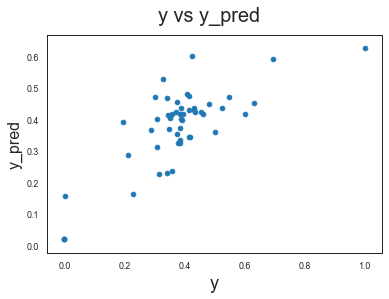

In [1877]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Multiplicative Model

In [1878]:
camera_mm = camera_df_week_cp[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]         

camera_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   18196.000     0.479 2.500                    2.750                  28                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4081557.000     0.433 7.100                    2.749                 973                 176 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041             0.361              -0.050
2 4675000.000     0.438 6.435                    2.789                1067                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.265               0.005
3 4452052.000     0.431 6.441                    2.838                1008                 197 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.148              -0.008
4 2974282.000     0.425 6.400                    2.789                 616                 138 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.005              -0.007

In [1879]:
# Applying Log 
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [1880]:
camera_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0  9.809    -0.737 0.916                    1.012               3.332               0.000 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.922      -0.457           0.617                -8.364               -1.103         -1.989   0.228 4.000        7.071         0.000   -1.609       3.239       2.580        2.963         -2.303          0.378          0.000          0.000            0.000            0.000             0.000               0.000
1 15.222    -0.836 1.960                    1.011               6.880               5.170 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.179       2.666        2.958          0.057          0.842          1.424         -3.532            1.431           -3.189            -1.019               0.000
2 15.358    -0.826 1.862                    1.026               6.973               5.283 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071        -1.253   -1.946       3.310       2.792        3.087         -0.203          1.552          0.451         -3.532            0.469           -3.189            -1.328              -5.242
3 15.309    -0.841 1.863                    1.043               6.916               5.283 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.341       2.663        3.022          0.490          1.428          0.131         -3.532            0.157           -3.189            -1.912               0.000
4 14.906    -0.856 1.856                    1.026               6.423               4.927 -6.655   -1.364       -1.548            -13.580            -3.655      -4.217 -0.688 -3.568      -0.558           0.131                -9.046               -1.652         -2.487   0.123 4.028        7.078         0.000   -1.946       3.395       2.788        3.139         -0.203          1.776          1.468         -3.532            1.475           -3.189            -5.253               0.000

In [1881]:
scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

camera_mm[num_vars] = scaler.fit_transform(camera_mm[num_vars])
camera_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0 0.385     0.515 0.000                    0.730               0.390               0.000 0.498    0.547        0.471              0.384             0.467       0.467 0.331  0.444       0.432           0.382                 0.358                0.393          0.382   0.185 0.687        0.734         0.000   -1.609       0.860       0.924        0.884          0.000          0.408          0.303          0.895            0.286            0.677             1.000               1.000
1 0.891     0.431 0.782                    0.729               0.806               5.170 0.498    0.547        0.471              0.384             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734         0.000    0.000       0.807       0.955        0.881          0.477          0.604          0.736          0.000            0.731            0.000             0.806               1.000
2 0.904     0.440 0.708                    0.740               0.817               5.283 0.498    0.547        0.471              0.384             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734        -1.253   -1.946       0.924       1.000        0.965          0.424          0.905          0.440          0.000            0.432            0.000             0.747               0.396
3 0.900     0.427 0.709                    0.752               0.810               5.283 0.498    0.547        0.471              0.384             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734         0.000    0.000       0.952       0.954        0.923          0.564          0.853          0.343          0.000            0.335            0.000             0.636               1.000
4 0.862     0.415 0.704                    0.740               0.752               4.927 0.000    0.291        0.000              0.000             0.000       0.000 0.000  0.358       0.404           0.277                 0.307                0.293          0.278   0.147 0.780        0.768         0.000   -1.946       1.000       0.998        1.000          0.424          1.000          0.750          0.000            0.745            0.000             0.000               1.000

In [1882]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [1883]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 34)
y dataset:  (52,)


In [1884]:
# Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1885]:
# Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.150
1                       sla       -0.139
2   product_procurement_sla        0.014
3        order_payment_type        0.600
4        is_premium_product        0.059
5                        TV       -0.046
6                   Digital        0.412
7               Sponsorship       -0.187
8         Content_marketing       -0.023
9          Online_marketing        1.874
10               Affiliates       -1.613
11                      SEM       -0.318
12                    TV_ad       -0.167
13               Digital_ad       -0.183
14           Sponsorship_ad        0.105
15     Content_Marketing_ad        0.165
16      Online_Marketing_ad       -1.439
17            Affiliates_ad        1.271
18                   SEM_ad        0.027
19                      NPS       -0.179
20              Stock_Index       -0.011
21             holiday_flag        0.023
22                  PayDate       -0.002
23               max_temp_C        0.053
24               min_temp_C        0.141
25              mean_temp_C       -0.247
26            heat_deg_days       -0.046
27            cool_deg_days        0.014
28            total_rain_mm       -0.363
29            total_snow_cm       -0.073
30          total_precip_mm        0.372
31          snow_on_grnd_cm       -0.013
32         MA4_listed_price        0.004
33       MA2_discount_offer        0.010

In [1886]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Model Building - Stepwise selection for feature selection

In [1887]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [1888]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Content_marketing              with p-value 0.927087
Drop SEM_ad                         with p-value 0.918693
Drop TV                             with p-value 0.930725
Drop product_procurement_sla        with p-value 0.755863
Drop Stock_Index                    with p-value 0.631898
Drop MA4_listed_price               with p-value 0.491414
Drop cool_deg_days                  with p-value 0.473598
Drop MA2_discount_offer             with p-value 0.509078
Drop max_temp_C                     with p-value 0.44885
Drop Affiliates_ad                  with p-value 0.331556
Drop snow_on_grnd_cm                with p-value 0.326449
Drop PayDate                        with p-value 0.431025
Drop heat_deg_days                  with p-value 0.256347

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'is_premium_product', 'Digital', 'Sponsorship', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', '

In [1889]:
#Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]
x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

mm1.params

const                   0.454
discount               -0.173
sla                    -0.171
order_payment_type      0.566
is_premium_product      0.068
Digital                 0.402
Sponsorship            -0.221
Online_marketing        0.970
Affiliates             -0.672
SEM                    -0.291
TV_ad                  -0.153
Digital_ad             -0.186
Sponsorship_ad          0.153
Content_Marketing_ad    0.206
Online_Marketing_ad    -0.334
NPS                    -0.154
holiday_flag            0.024
min_temp_C              0.079
mean_temp_C            -0.116
total_rain_mm          -0.349
total_snow_cm          -0.078
total_precip_mm         0.353
dtype: float64

In [1890]:
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     861.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.93e-36
Time:                        23:31:34   Log-Likelihood:                 174.92
No. Observations:                  52   AIC:                            -305.8
Df Residuals:                      30   BIC:                            -262.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4538      0.042     10.916      0.000       0.369       0.539
discount                -0.1730      0.017     -9.901      0.000      -0.209      -0.137
sla                     -0.1715      0.034     -5.066      0.000      -0.241      -0.102
order_payment_type       0.5656      0.064      8.806      0.000       0.434       0.697
is_premium_product       0.0677      0.008      8.014      0.000       0.050       0.085
Digital                  0.4021      0.065      6.205      0.000       0.270       0.534
Sponsorship             -0.2213      0.063     -3.510      0.001      -0.350      -0.093
Online_marketing         0.9703      0.162      5.988      0.000       0.639       1.301
Affiliates              -0.6720      0.126     -5.349      0.000      -0.929      -0.415
SEM                     -0.2910      0.035     -8.324      0.000      -0.362      -0.220
TV_ad                   -0.1532      0.039     -3.933      0.000      -0.233      -0.074
Digital_ad              -0.1865      0.055     -3.366      0.002      -0.300      -0.073
Sponsorship_ad           0.1530      0.067      2.268      0.031       0.015       0.291
Content_Marketing_ad     0.2057      0.037      5.554      0.000       0.130       0.281
Online_Marketing_ad     -0.3340      0.095     -3.512      0.001      -0.528      -0.140
NPS                     -0.1543      0.033     -4.732      0.000      -0.221      -0.088
holiday_flag             0.0242      0.004      5.517      0.000       0.015       0.033
min_temp_C               0.0787      0.033      2.411      0.022       0.012       0.145
mean_temp_C             -0.1160      0.039     -2.960      0.006      -0.196      -0.036
total_rain_mm           -0.3490      0.087     -4.000      0.000      -0.527      -0.171
total_snow_cm           -0.0776      0.017     -4.648      0.000      -0.112      -0.043
total_precip_mm          0.3533      0.090      3.912      0.000       0.169       0.538
==============================================================================
Omnibus:                        3.907   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.752
Skew:                          -0.172   Prob(JB):                        0.153
Kurtosis:                       4.270   Cond. No.                         884.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1891]:
checkVIF(x_rfe1)

                Features     VIF
7       Online_marketing 845.480
0                  const 739.830
8             Affiliates 522.130
14   Online_Marketing_ad 267.400
21       total_precip_mm 154.410
19         total_rain_mm 137.330
12        Sponsorship_ad 133.510
6            Sponsorship 128.470
5                Digital 108.530
11            Digital_ad  71.500
3     order_payment_type  71.210
4     is_premium_product  66.670
10                 TV_ad  37.060
13  Content_Marketing_ad  36.100
18           mean_temp_C  34.070
15                   NPS  28.320
9                    SEM  27.800
17            min_temp_C  25.550
20         total_snow_cm   8.410
2                    sla   6.710
1               discount   1.920
16          holiday_flag   1.880


Dropping ```'Online_marketing'``` 

In [1892]:
x_rfe1.drop('Online_marketing',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     425.1
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.43e-32
Time:                        23:31:34   Log-Likelihood:                 154.48
No. Observations:                  52   AIC:                            -267.0
Df Residuals:                      31   BIC:                            -226.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4740      0.060      7.847      0.000       0.351       0.597
discount                -0.2032      0.024     -8.337      0.000      -0.253      -0.154
sla                     -0.2147      0.048     -4.454      0.000      -0.313      -0.116
order_payment_type       0.4644      0.090      5.142      0.000       0.280       0.649
is_premium_product       0.0746      0.012      6.115      0.000       0.050       0.100
Digital                  0.2144      0.083      2.593      0.014       0.046       0.383
Sponsorship             -0.0652      0.084     -0.779      0.442      -0.236       0.105
Affiliates               0.0239      0.070      0.344      0.733      -0.118       0.166
SEM                     -0.1780      0.043     -4.149      0.000      -0.265      -0.090
TV_ad                   -0.2233      0.054     -4.122      0.000      -0.334      -0.113
Digital_ad              -0.0597      0.075     -0.800      0.430      -0.212       0.093
Sponsorship_ad           0.0103      0.092      0.112      0.912      -0.177       0.198
Content_Marketing_ad     0.0740      0.043      1.704      0.098      -0.015       0.163
Online_Marketing_ad      0.1313      0.080      1.641      0.111      -0.032       0.294
NPS                     -0.1192      0.047     -2.549      0.016      -0.215      -0.024
holiday_flag             0.0213      0.006      3.345      0.002       0.008       0.034
min_temp_C               0.0673      0.048      1.416      0.167      -0.030       0.164
mean_temp_C             -0.0886      0.057     -1.562      0.129      -0.204       0.027
total_rain_mm           -0.3341      0.127     -2.627      0.013      -0.593      -0.075
total_snow_cm           -0.0795      0.024     -3.268      0.003      -0.129      -0.030
total_precip_mm          0.3504      0.132      2.662      0.012       0.082       0.619
==============================================================================
Omnibus:                        0.181   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.361
Skew:                           0.099   Prob(JB):                        0.835
Kurtosis:                       2.644   Cond. No.                         495.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping ```'Affiliates'``` 

In [1893]:
x_rfe1.drop('Affiliates',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     460.1
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.18e-33
Time:                        23:31:34   Log-Likelihood:                 154.38
No. Observations:                  52   AIC:                            -268.8
Df Residuals:                      32   BIC:                            -229.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4715 

Dropping ```Sponsorship_ad'``` 

In [1894]:
x_rfe1.drop('Sponsorship_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     500.6
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.19e-35
Time:                        23:31:34   Log-Likelihood:                 154.37
No. Observations:                  52   AIC:                            -270.7
Df Residuals:                      33   BIC:                            -233.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4703 

Dropping ```''min_temp_C'``` 

In [1895]:
x_rfe1.drop('min_temp_C',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     512.5
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.36e-36
Time:                        23:31:35   Log-Likelihood:                 152.72
No. Observations:                  52   AIC:                            -269.4
Df Residuals:                      34   BIC:                            -234.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4585 

Dropping ```''Digital_ad'```

In [1896]:
x_rfe1.drop('Digital_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     523.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.65e-37
Time:                        23:31:35   Log-Likelihood:                 150.95
No. Observations:                  52   AIC:                            -267.9
Df Residuals:                      35   BIC:                            -234.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4560 

Dropping ```'mean_temp_C'``` 

In [1897]:
x_rfe1.drop('mean_temp_C',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     565.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.69e-38
Time:                        23:31:35   Log-Likelihood:                 150.54
No. Observations:                  52   AIC:                            -269.1
Df Residuals:                      36   BIC:                            -237.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4233 

Dropping ```'total_precip_mm'``` 

In [1898]:
x_rfe1.drop('total_precip_mm',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     530.6
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.45e-38
Time:                        23:31:35   Log-Likelihood:                 146.41
No. Observations:                  52   AIC:                            -262.8
Df Residuals:                      37   BIC:                            -233.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3812 

Dropping ```'total_rain_mm'``` 

In [1899]:
x_rfe1.drop('total_rain_mm',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     582.5
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.59e-39
Time:                        23:31:35   Log-Likelihood:                 146.21
No. Observations:                  52   AIC:                            -264.4
Df Residuals:                      38   BIC:                            -237.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3808 

Dropping ```'total_snow_cm'``` 

In [1900]:
x_rfe1.drop('total_snow_cm',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     618.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.50e-40
Time:                        23:31:35   Log-Likelihood:                 145.01
No. Observations:                  52   AIC:                            -264.0
Df Residuals:                      39   BIC:                            -238.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3757 

Dropping ```'Sponsorship'``` 

In [1901]:
x_rfe1.drop('Sponsorship',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     655.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.62e-41
Time:                        23:31:35   Log-Likelihood:                 143.61
No. Observations:                  52   AIC:                            -263.2
Df Residuals:                      40   BIC:                            -239.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3821 

Dropping ```'Online_Marketing_ad'```

In [1902]:
x_rfe1.drop('Online_Marketing_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     693.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.11e-42
Time:                        23:31:35   Log-Likelihood:                 141.97
No. Observations:                  52   AIC:                            -261.9
Df Residuals:                      41   BIC:                            -240.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3845 

Dropping ```'holiday_flag'``` 

In [1903]:
x_rfe1.drop('holiday_flag',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     723.0
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.51e-43
Time:                        23:31:35   Log-Likelihood:                 139.71
No. Observations:                  52   AIC:                            -259.4
Df Residuals:                      42   BIC:                            -239.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3890 

Dropping ```'order_payment_type'``` 

In [1904]:
x_rfe1.drop('order_payment_type',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     463.6
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.92e-39
Time:                        23:31:35   Log-Likelihood:                 124.61
No. Observations:                  52   AIC:                            -231.2
Df Residuals:                      43   BIC:                            -213.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4357 

Dropping ```'Digital'``` 

In [1905]:
x_rfe1.drop('Digital',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     541.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.64e-40
Time:                        23:31:35   Log-Likelihood:                 124.59
No. Observations:                  52   AIC:                            -233.2
Df Residuals:                      44   BIC:                            -217.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4376 

Dropping ```'SEM'```

In [1906]:
x_rfe1.drop('SEM',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     646.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.16e-42
Time:                        23:31:35   Log-Likelihood:                 124.59
No. Observations:                  52   AIC:                            -235.2
Df Residuals:                      45   BIC:                            -221.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4375 

Dropping ```'TV_ad'``` 

In [1907]:
x_rfe1.drop('TV_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     788.7
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.34e-43
Time:                        23:31:35   Log-Likelihood:                 124.45
No. Observations:                  52   AIC:                            -236.9
Df Residuals:                      46   BIC:                            -225.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4436 

Dropping ```'NPS'``` 

In [1908]:
x_rfe1.drop('NPS',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     949.0
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.74e-44
Time:                        23:31:35   Log-Likelihood:                 122.92
No. Observations:                  52   AIC:                            -235.8
Df Residuals:                      47   BIC:                            -226.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4990 

Dropping ```'Content_Marketing_ad'``` 

In [1909]:
x_rfe1.drop('Content_Marketing_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1260.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.28e-45
Time:                        23:31:35   Log-Likelihood:                 122.27
No. Observations:                  52   AIC:                            -236.5
Df Residuals:                      48   BIC:                            -228.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5069      0

In [1910]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'is_premium_product']

In [1911]:
# Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [1912]:
# Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0005311125806985041

In [1913]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0               const       -0.150
1            discount       -0.139
2                 sla        0.014
3  is_premium_product        0.600

In [1914]:
# Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00257446 0.00062475 0.00057691 0.00019265 0.00039693 0.00077497
 0.0002246  0.00143517 0.00069798 0.0004814 ] 

Mean of 5 KFold CV - MSE: 0.0007979819551699368


Text(0, 0.5, 'y_pred')

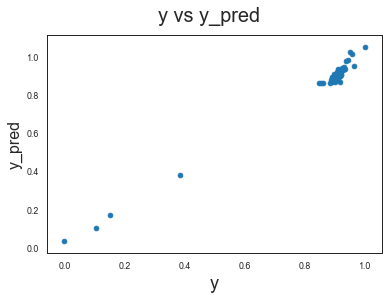

In [1915]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Gaming Accesories

In [1916]:
gaming_df.shape

(184576, 19)

In [1917]:
gaming_df.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  discount  week  is_premium_product
1598  ACCCZ34CBVZJTVQF 2015-10-04 19:24:36  2015     10  1408216975064600  1408216975064600 3075.000      1                   0    9            GamingHardware               GamingAccessory                   GamePad     3999.000                        5       3075.000     0.230    14                   0
1599  ACCCZ34CBVZJTVQF 2015-10-14 22:54:54  2015     10  1416985339691600  1416985339691600 2750.000      1                   0    7            GamingHardware               GamingAccessory                   GamePad     3999.000                        5       2750.000     0.310    16                   0
1600  ACCCZ34CBVZJTVQF 2015-10-15 20:19:38  2015     10  1417669228375400  1417669228375400 2899.000      1                   1    5            GamingHardware               GamingAccessory                   GamePad     3999.000                        5       2899.000     0.280    16                   0
1601  ACCCZ34CBVZJTVQF 2015-10-17 18:21:43  2015     10  1419414998353400  1419414998353400 2609.000      1                   1    5            GamingHardware               GamingAccessory                   GamePad     3999.000                        5       2609.000     0.350    16                   0
1602  ACCCZ34CBVZJTVQF 2015-10-26 17:49:39  2015     10  1427167582532600  1427167582532600 2772.000      1                   1    5            GamingHardware               GamingAccessory                   GamePad     3999.000                        5       2772.000     0.310    18                   0

### Aggregate Data on week basis

In [1918]:
#aggreagrate data on mean and sum for numerical columns
gaming_df_week = pd.DataFrame(gaming_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'is_premium_product':'sum'}))
gaming_df_week.reset_index( inplace = True)

In [1919]:
gaming_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product
0     1   39520.000       1221.281     3279.312     0.258 2.812                    2.844      26             32        32                  32                   0
1     2 2758912.000        872.218     1813.347     0.399 5.339                    3.083     318           3047      2907                 806                  28
2     3 2348035.359        815.580     1783.741     0.417 5.260                    2.637     308           2812      2785                 674                  19
3     4 2677184.500       1002.633     2255.712     0.366 5.315                    2.505     324           2589      2547                 596                  19
4     5 1965726.000       1015.094     4873.604     0.419 5.555                    3.054     303           1857      1839                 379                  17

In [1920]:
gaming_df_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [1921]:
cal_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [1922]:
media_investment_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [1923]:
#change datatype before merge
gaming_df_week['week'] = gaming_df_week['week'].astype(int)
cal_df['week'] = cal_df['week'].astype(int)

In [1924]:
#merge camera_df and media_df
gaming_df_week = gaming_df_week.merge(media_investment_df, how = 'left', on = 'week')

In [1925]:
gaming_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad
0     1   39520.000       1221.281     3279.312     0.258 2.812                    2.844      26             32        32                  32                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256
1     2 2758912.000        872.218     1813.347     0.399 5.339                    3.083     318           3047      2907                 806                  28 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
2     3 2348035.359        815.580     1783.741     0.417 5.260                    2.637     308           2812      2785                 674                  19 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
3     4 2677184.500       1002.633     2255.712     0.366 5.315                    2.505     324           2589      2547                 596                  19 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
4     5 1965726.000       1015.094     4873.604     0.419 5.555                    3.054     303           1857      1839                 379                  17 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131

In [1926]:
cal_df.head()

week    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

In [1927]:
#merge gaming df and cal df
gaming_df_week = gaming_df_week.merge(cal_df, how = 'left', on = 'week')

In [1928]:
gaming_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1   39520.000       1221.281     3279.312     0.258 2.812                    2.844      26             32        32                  32                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 2758912.000        872.218     1813.347     0.399 5.339                    3.083     318           3047      2907                 806                  28 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 2348035.359        815.580     1783.741     0.417 5.260                    2.637     308           2812      2785                 674                  19 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 2677184.500       1002.633     2255.712     0.366 5.315                    2.505     324           2589      2547                 596                  19 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 1965726.000       1015.094     4873.604     0.419 5.555                    3.054     303           1857      1839                 379                  17 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

#### Moving Avergae Camera Accesory

In [1929]:
# Moving Average for listing_price and discount



gaming_df_week[['MA2_LP','MA2_Discount']] = gaming_df_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
gaming_df_week[['MA3_LP','MA3_Discount']] = gaming_df_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
gaming_df_week[['MA4_LP','MA4_Discount']] = gaming_df_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

# Reference listed price Inflation 

gaming_df_week['MA2_listed_price'] = (gaming_df_week['listing_price']-gaming_df_week['MA2_LP'])/gaming_df_week['MA2_LP']
gaming_df_week['MA3_listed_price'] = (gaming_df_week['listing_price']-gaming_df_week['MA3_LP'])/gaming_df_week['MA3_LP']
gaming_df_week['MA4_listed_price'] = (gaming_df_week['listing_price']-gaming_df_week['MA4_LP'])/gaming_df_week['MA4_LP']

# Reference discount Inflation

gaming_df_week['MA2_discount_offer'] = (gaming_df_week['discount']-gaming_df_week['MA2_Discount'])/gaming_df_week['MA2_Discount']
gaming_df_week['MA3_discount_offer'] = (gaming_df_week['discount']-gaming_df_week['MA3_Discount'])/gaming_df_week['MA3_Discount']
gaming_df_week['MA4_discount_offer'] = (gaming_df_week['discount']-gaming_df_week['MA4_Discount'])/gaming_df_week['MA4_Discount']


gaming_df_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
gaming_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1   39520.000       1221.281     3279.312     0.258 2.812                    2.844      26             32        32                  32                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 2758912.000        872.218     1813.347     0.399 5.339                    3.083     318           3047      2907                 806                  28 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167            -0.167            -0.167               0.214               0.214               0.214
2     3 2348035.359        815.580     1783.741     0.417 5.260                    2.637     308           2812      2785                 674                  19 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.034            -0.159            -0.159               0.021               0.163               0.163
3     4 2677184.500       1002.633     2255.712     0.366 5.315                    2.505     324           2589      2547                 596                  19 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.103             0.118             0.025              -0.065              -0.072               0.016
4     5 1965726.000       1015.094     4873.604     0.419 5.555                    3.054     303           1857      1839                 379                  17 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.006             0.075        

Camera Accessory - multicollinearity between revenue and other variables

In [1930]:
#Find Highly correlated data and drop Highly Correlated Columns

correlation_0 = gaming_df_week.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[(correlation_0 > 0.95) | (correlation_0 < -0.95)]
print(round(corr,2))

order_item_id         gmv                    0.950
gmv                   order_item_id          0.950
                      order_id               0.950
order_id              gmv                    0.950
SEM_ad                Content_Marketing_ad   0.960
Content_Marketing_ad  SEM_ad                 0.960
Content_marketing     SEM                    0.960
SEM                   Content_marketing      0.960
heat_deg_days         min_temp_C             0.970
min_temp_C            heat_deg_days          0.970
Digital_ad            Digital                0.970
Digital               Digital_ad             0.970
mean_temp_C           max_temp_C             0.970
max_temp_C            mean_temp_C            0.970
SEM                   SEM_ad                 0.970
SEM_ad                SEM                    0.970
Content_marketing     Content_Marketing_ad   0.970
Content_Marketing_ad  Content_marketing      0.970
Sponsorship_ad        Sponsorship            0.970
Sponsorship           Sponsorsh

In [1931]:
gaming_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

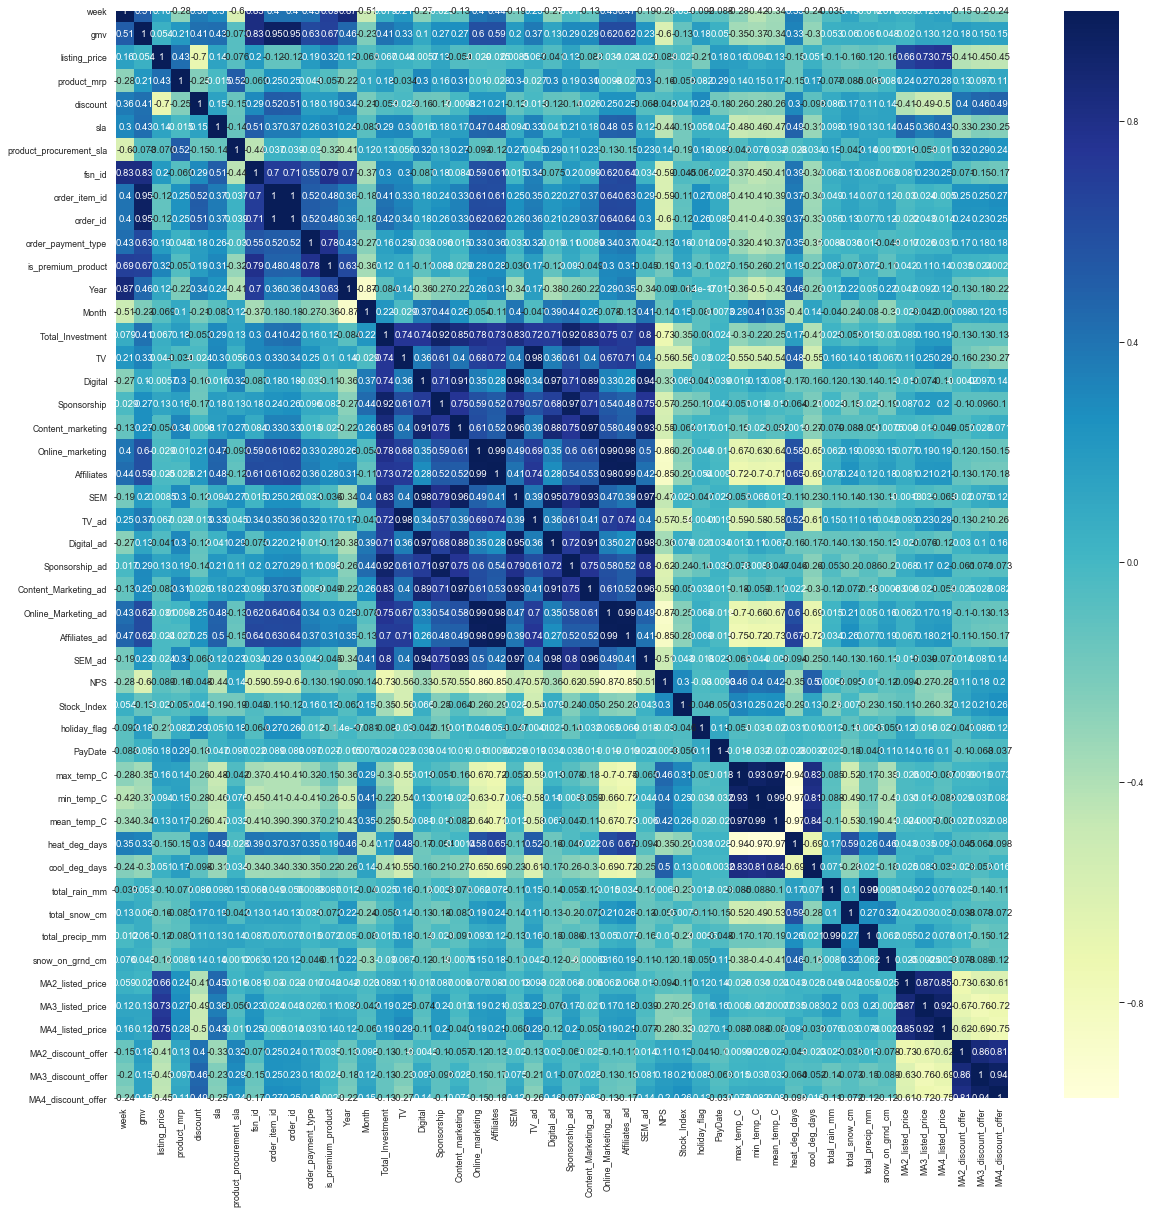

In [1932]:
plt.figure(figsize=(20,20))
sns.heatmap(gaming_df_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [1933]:
gaming_df_week_cp = gaming_df_week.copy(deep=True)

In [1934]:
gaming_df_week_cp.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1   39520.000       1221.281     3279.312     0.258 2.812                    2.844      26             32        32                  32                   0 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 2758912.000        872.218     1813.347     0.399 5.339                    3.083     318           3047      2907                 806                  28 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167            -0.167            -0.167               0.214               0.214               0.214
2     3 2348035.359        815.580     1783.741     0.417 5.260                    2.637     308           2812      2785                 674                  19 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.034            -0.159            -0.159               0.021               0.163               0.163
3     4 2677184.500       1002.633     2255.712     0.366 5.315                    2.505     324           2589      2547                 596                  19 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.103             0.118             0.025              -0.065              -0.072               0.016
4     5 1965726.000       1015.094     4873.604     0.419 5.555                    3.054     303           1857      1839                 379                  17 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.006             0.075        

In [1935]:
gaming_df_week_cp.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [1936]:
#Lets not drop highly correlated variable

#camera_df_week_cp.drop(['order_id', 'Affiliates_ad', 'Online_marketing', 'total_rain_mm','TV_ad', 'Digital', 'Year_y','SEM_ad',
#              'Sponsorship_ad','Content_Marketing_ad','mean_temp_C'], axis = 1, inplace = True)

#Drop some items not required one like 'order_id','order_item_id' and not dropping highly correlated items
gaming_df_week_cp.drop(['fsn_id', 'order_item_id','order_id','week','Date', 'Year', 'Month',
                       'product_mrp','Total_Investment'],axis = 1, inplace = True)

### Lag variables for Distributed model

In [1937]:

gaming_df_week_cp['lag_1_listed_price'] = gaming_df_week_cp['listing_price'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_listed_price'] = gaming_df_week_cp['listing_price'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_listed_price'] = gaming_df_week_cp['listing_price'].shift(-3).fillna(0)

gaming_df_week_cp['lag_1_discount'] = gaming_df_week_cp['discount'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_discount'] = gaming_df_week_cp['discount'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_discount'] = gaming_df_week_cp['discount'].shift(-3).fillna(0)

gaming_df_week_cp['lag_1_Stock_Index'] = gaming_df_week_cp['Stock_Index'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_Stock_Index'] = gaming_df_week_cp['Stock_Index'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_Stock_Index'] = gaming_df_week_cp['Stock_Index'].shift(-3).fillna(0)

gaming_df_week_cp['lag_1_holiday_flag'] = gaming_df_week_cp['holiday_flag'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_holiday_flag'] = gaming_df_week_cp['holiday_flag'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_holiday_flag'] = gaming_df_week_cp['holiday_flag'].shift(-3).fillna(0)

gaming_df_week_cp['lag_1_PayDate'] = gaming_df_week_cp['PayDate'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_PayDate'] = gaming_df_week_cp['PayDate'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_PayDate'] = gaming_df_week_cp['PayDate'].shift(-3).fillna(0)

gaming_df_week_cp['lag_1_NPS'] = gaming_df_week_cp['NPS'].shift(-1).fillna(0)
gaming_df_week_cp['lag_2_NPS'] = gaming_df_week_cp['NPS'].shift(-2).fillna(0)
gaming_df_week_cp['lag_3_NPS'] = gaming_df_week_cp['NPS'].shift(-3).fillna(0)

In [1938]:
gaming_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   39520.000       1221.281     0.258 2.812                    2.844                  32                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000             872.218             815.580            1002.633           0.399           0.417           0.366           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 2758912.000        872.218     0.399 5.339                    3.083                 806                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167            -0.167            -0.167               0.214               0.214               0.214             815.580            1002.633            1015.094           0.417           0.366           0.419           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 2348035.359        815.580     0.417 5.260                    2.637                 674                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.034            -0.159            -0.159               0.021               0.163               0.163            1002.633            1015.094             195.500           0.366           0.419           0.535           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 2677184.500       1002.633     0.366 5.315                    2.505                 596                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

# Modeling 

## Gaming Accesory

#### Linear Model

In [1939]:
gaming_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   39520.000       1221.281     0.258 2.812                    2.844                  32                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000             872.218             815.580            1002.633           0.399           0.417           0.366           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 2758912.000        872.218     0.399 5.339                    3.083                 806                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167            -0.167            -0.167               0.214               0.214               0.214             815.580            1002.633            1015.094           0.417           0.366           0.419           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 2348035.359        815.580     0.417 5.260                    2.637                 674                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.034            -0.159            -0.159               0.021               0.163               0.163            1002.633            1015.094             195.500           0.366           0.419           0.535           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 2677184.500       1002.633     0.366 5.315                    2.505                 596                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

In [1940]:
gaming_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [1941]:
 model_columns1 = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

model1 = gaming_df_week_cp[model_columns1]

In [1942]:
model1.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   39520.000     0.258 2.812                    2.844                  32                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 2758912.000     0.399 5.339                    3.083                 806                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167               0.214
2 2348035.359     0.417 5.260                    2.637                 674                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.159               0.021
3 2677184.500     0.366 5.315                    2.505                 596                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.025              -0.065
4 1965726.000     0.419 5.555                    3.054                 379                  17 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.096               0.068

In [1943]:
#function to get all required columns in the model and fill it with 0 for null values
def intitalModel():

    model_columns = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

    model = gaming_df_week_cp[model_columns]
    model.fillna(0, inplace = True)
    return model

Split data into train and test

In [1944]:
np.random.seed(0)
df_train, df_test= train_test_split(intitalModel(),train_size=0.7,test_size = 0.3,random_state=60)
print(df_train.shape)
print(df_test.shape)

(37, 35)
(16, 35)


Rescaling Techniques
2 methods
1. Min-Max/Normalisation - b/w 0 and 1
2. Standarisation - mean=0 sigma=1

In [1945]:

scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
14 0.293     0.388 0.813                    0.359               0.128                  19 0.661    1.000        1.000              1.000             1.000       1.000 1.000  0.661       1.000           1.000                 1.000                1.000          1.000   1.000 0.000        0.859         0.000    0.000       0.571       0.650        0.638          0.180          0.108          0.075          0.039            0.080            0.018             0.588               0.370
27 0.472     0.760 0.926                    0.442               0.224                  22 0.376    0.000        0.030              0.209             0.751       0.844 0.045  0.376       0.000           0.030                 0.209                0.751          0.844   0.045 0.173        0.163         0.000    0.000       0.187       0.159        0.184          0.775          0.216          0.491          0.737            0.600            0.036             0.639               0.422
41 0.414     0.621 0.927                    0.331               0.896                  48 0.559    0.041        0.280              0.010             0.676       0.815 0.074  0.559       0.041           0.280                 0.010                0.676          0.815   0.074 0.477        1.000         0.000    0.143       0.477       0.194        0.358          0.522          0.108          0.075          0.039            0.080            0.018             0.621               0.513
16 0.322     0.475 1.000                    0.356               0.146                  19 0.661    1.000        1.000              1.000             1.000       1.000 1.000  0.661       1.000           1.000                 1.000                1.000          1.000   1.000 0.000        0.859         0.000    0.000       0.518       0.629        0.599          0.228          0.108          0.135          0.039            0.141            0.018             0.658               0.046
20 0.296     0.555 0.877                    0.315               0.128                   7 0.363    0.053        0.125              0.039             0.641       0.755 0.072  0.363       0.053           0.125                 0.039                0.641          0.755   0.072 0.167        0.960         0.000    0.000       0.175       0.342        0.266          0.655          0.162          0.303          1.000            0.454            0.245             0.693               0.425

In [1946]:
df_train.describe()

gmv  discount    sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
count 37.000    37.000 37.000                   37.000              37.000              37.000 37.000   37.000       37.000             37.000            37.000      37.000 37.000 37.000      37.000          37.000                37.000               37.000         37.000  37.000 37.000       37.000        37.000   37.000      37.000      37.000       37.000         37.000         37.000         37.000         37.000           37.000           37.000            37.000              37.000
mean   0.387     0.630  0.826                    0.390               0.251              23.811  0.353    0.184        0.301              0.202             0.596       0.660  0.187  0.348       0.182           0.298                 0.203                0.594          0.656   0.185  0.353        0.645         0.104    0.063       0.466       0.495        0.515          0.423          0.357          0.263          0.169            0.287            0.079             0.621               0.444
std    0.196     0.190  0.217                    0.197               0.219              17.575  0.268    0.295        0.325              0.297             0.337       0.359  0.294  0.257       0.275           0.305                 0.278                0.333          0.357   0.276  0.294        0.326         0.212    0.074       0.287       0.280        0.282          0.275          0.256          0.210          0.261            0.216            0.172             0.166               0.190
min    0.000     0.000  0.000                    0.000               0.000               0.000  0.000    0.000        0.000              0.000             0.000       0.000  0.000  0.000       0.000           0.000                 0.000                0.000          0.000   0.000  0.000        0.000         0.000    0.000       0.000       0.000        0.000          0.000          0.000          0.000          0.000            0.000            0.000             0.000               0.000
25%    0.327     0.529  0.806                    0.331               0.174              13.000  0.117    0.041        0.078              0.010             0.324       0.392  0.058  0.117       0.053           0.078                 0.010                0.447          0.480   0.058  0.167        0.379         0.000    0.000       0.222       0.251        0.290          0.175          0.216          0.144          0.039            0.149            0.018             0.584               0.370
50%    0.417     0.662  0.906                    0.363               0.212              19.000  0.363    0.081        0.130              0.173             0.751       0.815  0.096  0.363       0.081           0.242                 0.173                0.751          0.836   0.096  0.297        0.831         0.000    0.000       0.436       0.466        0.485          0.420          0.282          0.213          0.058            0.240            0.027             0.640               0.428
75%    0.486     0.750  0.931                    0.458               0.255              32.000  0.559    0.177        0.486              0.209             0.815       0.926  0.118  0.559       0.165           0.417                 0.209                0.808          0.903   0.118  0.477        0.912         0.143    0.143       0.674       0.756        0.747          0.655          0.449          0.303          0.096            0.341            0.045             0.674               0.501
max    1.000     1.000  1.000                    1.000           

In [1947]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
y_train = df_train.pop('gmv')
X_train = df_train

In [1948]:
#Running RFE with the output number of the variable equalt to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [1949]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', False, 10),
 ('sla', False, 20),
 ('product_procurement_sla', False, 19),
 ('order_payment_type', True, 1),
 ('is_premium_product', False, 25),
 ('TV', False, 5),
 ('Digital', False, 9),
 ('Sponsorship', False, 3),
 ('Content_marketing', True, 1),
 ('Online_marketing', True, 1),
 ('Affiliates', False, 12),
 ('SEM', True, 1),
 ('TV_ad', False, 4),
 ('Digital_ad', True, 1),
 ('Sponsorship_ad', False, 2),
 ('Content_Marketing_ad', True, 1),
 ('Online_Marketing_ad', True, 1),
 ('Affiliates_ad', True, 1),
 ('SEM_ad', True, 1),
 ('NPS', True, 1),
 ('Stock_Index', False, 13),
 ('holiday_flag', False, 17),
 ('PayDate', False, 16),
 ('max_temp_C', False, 6),
 ('min_temp_C', False, 8),
 ('mean_temp_C', False, 7),
 ('heat_deg_days', False, 14),
 ('cool_deg_days', False, 15),
 ('total_rain_mm', False, 24),
 ('total_snow_cm', False, 21),
 ('total_precip_mm', False, 23),
 ('snow_on_grnd_cm', False, 22),
 ('MA4_listed_price', False, 11),
 ('MA2_discount_offer', False, 18)]

In [1950]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type', 'Content_marketing', 'Online_marketing', 'SEM', 'Digital_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS'], dtype='object')

In [1951]:
X_train.columns[~rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Affiliates', 'TV_ad', 'Sponsorship_ad', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Building model using statsmodel, for the detailed analysis

In [1952]:
X_train_rfe = X_train[col]

In [1953]:
X_train_rfe.head()

order_payment_type  Content_marketing  Online_marketing   SEM  Digital_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS
14               0.128              1.000             1.000 1.000       1.000                 1.000                1.000          1.000   1.000 0.000
27               0.224              0.209             0.751 0.045       0.000                 0.209                0.751          0.844   0.045 0.173
41               0.896              0.010             0.676 0.074       0.041                 0.010                0.676          0.815   0.074 0.477
16               0.146              1.000             1.000 1.000       1.000                 1.000                1.000          1.000   1.000 0.000
20               0.128              0.039             0.641 0.072       0.053                 0.039                0.641          0.755   0.072 0.167

Define Function for build_model and VIF

In [1954]:
# It will give the detailed stats model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model 1 using RFE

In [1955]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     21.08
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.22e-10
Time:                        23:31:42   Log-Likelihood:                 49.104
No. Observations:                  37   AIC:                            -76.21
Df Residuals:                      26   BIC:                            -58.49
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6405 

In [1956]:
checkVIF(X_train_new)

Features     VIF
7    Online_Marketing_ad 621.360
9                 SEM_ad 502.130
8          Affiliates_ad 457.630
6   Content_Marketing_ad 453.260
2      Content_marketing 441.000
4                    SEM 379.930
5             Digital_ad 193.090
3       Online_marketing  72.870
0                  const  54.240
10                   NPS   8.050
1     order_payment_type   2.400

Dropping ```'Content_Marketing_ad'```

In [1957]:
#Drop Content_Marketing_ad because p-value>0.05
X_train_new = X_train_new.drop(["Content_Marketing_ad"], axis = 1)

Model 2

In [1958]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.40e-10
Time:                        23:31:42   Log-Likelihood:                 47.887
No. Observations:                  37   AIC:                            -75.77
Df Residuals:                      27   BIC:                            -59.66
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6367    

As p-value for Content_marketing is > 0.05 so remove SEM and update the model

Model 3

Dropping ```'SEM'``` 

In [1959]:
X_train_new = X_train_new.drop(['SEM'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     26.01
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.20e-11
Time:                        23:31:42   Log-Likelihood:                 47.678
No. Observations:                  37   AIC:                            -77.36
Df Residuals:                      28   BIC:                            -62.86
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6305    

Features     VIF
5  Online_Marketing_ad 503.940
6        Affiliates_ad 428.630
7               SEM_ad 262.810
4           Digital_ad 180.090
3     Online_marketing  56.610
0                const  53.430
2    Content_marketing  18.790
8                  NPS   7.980
1   order_payment_type   2.290

Model 4

Dropping ```'Online_Marketing_ad'``` 

In [1960]:
X_train_new = X_train_new.drop(['Online_Marketing_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.22e-07
Time:                        23:31:42   Log-Likelihood:                 33.811
No. Observations:                  37   AIC:                            -51.62
Df Residuals:                      29   BIC:                            -38.74
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6182      0

Features     VIF
6              SEM_ad 123.830
4          Digital_ad  89.620
3    Online_marketing  55.030
0               const  53.390
5       Affiliates_ad  41.570
2   Content_marketing  18.550
7                 NPS   7.490
1  order_payment_type   1.640

Model 5

Dropping ```'Online_marketing'``` 

In [1961]:
X_train_new = X_train_new.drop(['Online_marketing'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.18
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.35e-07
Time:                        23:31:42   Log-Likelihood:                 33.110
No. Observations:                  37   AIC:                            -52.22
Df Residuals:                      30   BIC:                            -40.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5871      0

Features     VIF
5              SEM_ad 122.380
3          Digital_ad  83.030
0               const  50.740
2   Content_marketing  11.530
6                 NPS   7.420
4       Affiliates_ad   6.210
1  order_payment_type   1.640

Model 6

Dropping ```'Affiliates_ad'``` 

In [1962]:
X_train_new = X_train_new.drop(['Affiliates_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     16.86
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.78e-08
Time:                        23:31:43   Log-Likelihood:                 32.537
No. Observations:                  37   AIC:                            -53.07
Df Residuals:                      31   BIC:                            -43.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4773      0

Features     VIF
4              SEM_ad 118.090
3          Digital_ad  82.540
0               const  11.530
2   Content_marketing   9.600
5                 NPS   3.340
1  order_payment_type   1.140

Model 7

Dropping ```'Content_marketing'``` 

In [1963]:
X_train_new = X_train_new.drop(['Content_marketing'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     20.67
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.69e-08
Time:                        23:31:43   Log-Likelihood:                 31.850
No. Observations:                  37   AIC:                            -53.70
Df Residuals:                      32   BIC:                            -45.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4863      0

Features    VIF
3              SEM_ad 87.930
2          Digital_ad 75.710
0               const 11.320
4                 NPS  3.340
1  order_payment_type  1.070

Model 8

Dropping ```'Digital_ad'``` 

In [1964]:
X_train_new = X_train_new.drop(['Digital_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     25.57
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.76e-09
Time:                        23:31:43   Log-Likelihood:                 30.460
No. Observations:                  37   AIC:                            -52.92
Df Residuals:                      33   BIC:                            -46.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4289      0

Features   VIF
0               const 7.280
3                 NPS 1.460
2              SEM_ad 1.400
1  order_payment_type 1.050

Model 9

Dropping ```'SEM_ad'``` 

In [1965]:
X_train_new = X_train_new.drop(['SEM_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     38.56
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.80e-09
Time:                        23:31:43   Log-Likelihood:                 30.144
No. Observations:                  37   AIC:                            -54.29
Df Residuals:                      34   BIC:                            -49.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4062      0

Features   VIF
0               const 4.620
1  order_payment_type 1.050
2                 NPS 1.050

Model 9 looks good as all p-value <0.05 and VIF <5

Residual Analysis of Model

In [1966]:
X_train_new.describe()

const  order_payment_type    NPS
count 37.000              37.000 37.000
mean   1.000               0.251  0.353
std    0.000               0.219  0.294
min    1.000               0.000  0.000
25%    1.000               0.174  0.167
50%    1.000               0.212  0.297
75%    1.000               0.255  0.477
max    1.000               1.000  1.000

In [1967]:
#Get the model by passing final model variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

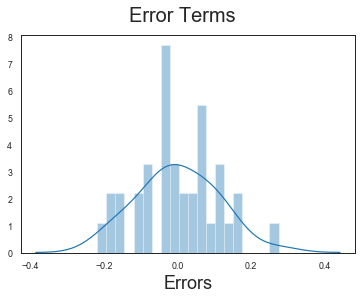

In [1968]:
#calculate the residuals
residual=y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

 Predictions and Evaluation on the Test Set

In [1969]:
#Scaling the test set
# num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
#         'TV_ad','Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad',
#        'NPS', 'Stock_Index', 'heat_deg_days', 'cool_deg_days', 
#        'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
#        'MA2_discount_offer']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1970]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [1971]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

Model Evaluation

In [1972]:
#predict
y_test_pred = lm.predict(X_test_new)

In [1973]:
#Evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.5225879887629483

Text(0, 0.5, 'y_pred')

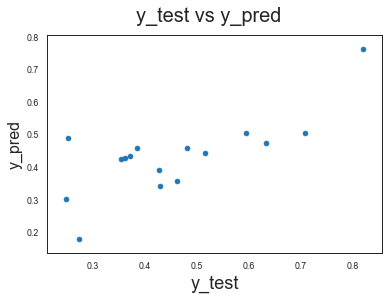

In [1974]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [1975]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     38.56
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.80e-09
Time:                        23:31:43   Log-Likelihood:                 30.144
No. Observations:                  37   AIC:                            -54.29
Df Residuals:                      34   BIC:                            -49.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4062      0

# Koyck Model

The Koyck tells us that the current revenue generated is not just influenced by the different independent attributes, but also because of the revenue generated over the last periods. ie. Current revenue(Yt) is also dependent on the past revenue values(Yt-1).*


  __Yt__ = __α__ +             __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__
  
  __Yt__ = __α__ + __µYt-1__ + __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__  -- (sale at time t is dependent on sale at time t-1)

*If 	X1 is the advertising effect, β1 is the current effect of advertising, carry over effect of advertising is β1 * µ/(1-µ).*

*Therefore the total effect of advertising  = Current effect + Carry over effect*

                                            = β1 + β1 * µ/(1-µ)	

											= β1/(1-µ)

In [1976]:
gaming_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [1977]:
gaming_df_km = gaming_df_week[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]           


gaming_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   39520.000     0.258 2.812                    2.844                  32 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 2758912.000     0.399 5.339                    3.083                 806 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167               0.214
2 2348035.359     0.417 5.260                    2.637                 674 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.159               0.021
3 2677184.500     0.366 5.315                    2.505                 596 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.025              -0.065
4 1965726.000     0.419 5.555                    3.054                 379 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.096               0.068

In [1978]:
gaming_df_km['lag_1_gmv'] = gaming_df_km['gmv'].shift(-1)

In [1979]:
# check nan values
gaming_df_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV                         1
Digital                    1
Sponsorship                1
Content_marketing          1
Online_marketing           1
Affiliates                 1
SEM                        1
TV_ad                      1
Digital_ad                 1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
Affiliates_ad              1
SEM_ad                     1
NPS                        0
Stock_Index                0
max_temp_C                 0
min_temp_C                 0
mean_temp_C                0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
total_precip_mm            0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_gmv                  1
dtype: int64

In [1980]:
#fill it with 0 
gaming_df_km = gaming_df_km.fillna(0)
gaming_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer   lag_1_gmv
0   39520.000     0.258 2.812                    2.844                  32 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000 2758912.000
1 2758912.000     0.399 5.339                    3.083                 806 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167               0.214 2348035.359
2 2348035.359     0.417 5.260                    2.637                 674 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.159               0.021 2677184.500
3 2677184.500     0.366 5.315                    2.505                 596 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.025              -0.065 1965726.000
4 1965726.000     0.419 5.555                    3.054                 379 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.096               0.068     391.000

In [1981]:

scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer','lag_1_gmv']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

gaming_df_km[num_vars] = scaler.fit_transform(gaming_df_km[num_vars])
gaming_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_gmv
0 0.005     0.000 0.000                    0.562               0.009 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.015       0.134           0.058                 0.000                0.036          0.052   0.105 0.654        0.714       0.785       0.776        0.793          0.000          0.247          0.000          0.000            0.000            0.000             0.638               0.432      0.384
1 0.384     0.510 0.694                    0.721               0.221 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.712       0.845        0.788          0.069          0.393          0.420          0.019            0.421            0.009             0.495               1.000      0.327
2 0.327     0.572 0.672                    0.425               0.185 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.879       0.958        0.934          0.051          0.799          0.159          0.019            0.161            0.009             0.502               0.488      0.373
3 0.372     0.388 0.687                    0.337               0.163 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.922       0.843        0.859          0.109          0.706          0.115          0.019            0.118            0.009             0.660               0.259      0.274
4 0.273     0.581 0.753                    0.702               0.104 0.001    0.081        0.010              0.000             0.004       0.008 0.063  0.008       0.121           0.036                 0.000                0.021          0.032   0.094 0.753        0.750       1.000       0.954        1.000          0.051          1.000          0.439          0.019            0.440            0.009             0.721               0.612      0.000

In [1982]:
#Split data into train and test
X = gaming_df_km.drop('gmv',axis=1)
y = gaming_df_km['gmv']

gaming_df_train_km = gaming_df_km
print(X.shape)
print(y.shape)

(53, 32)
(53,)


In [1983]:
#  Instantiate
km = LinearRegression()

#  Fit a line
km.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1984]:
#  Coefficient values

coef = pd.DataFrame(X.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount        0.471
1                       sla        0.083
2   product_procurement_sla        0.071
3        order_payment_type        0.734
4                        TV       -0.760
5                   Digital        1.110
6               Sponsorship        0.626
7         Content_marketing       -0.669
8          Online_marketing       -1.425
9                Affiliates        1.214
10                      SEM       -0.310
11                    TV_ad        0.640
12               Digital_ad        1.841
13           Sponsorship_ad       -0.815
14     Content_Marketing_ad       -0.072
15      Online_Marketing_ad        4.454
16            Affiliates_ad       -3.650
17                   SEM_ad       -2.433
18                      NPS       -0.673
19              Stock_Index       -0.168
20               max_temp_C        0.007
21               min_temp_C        0.060
22              mean_temp_C        0.073
23            heat_deg_days       -0.083
24            cool_deg_days        0.026
25            total_rain_mm       -0.025
26            total_snow_cm        0.011
27          total_precip_mm       -0.023
28          snow_on_grnd_cm        0.035
29         MA4_listed_price        0.216
30       MA2_discount_offer        0.036
31                lag_1_gmv       -0.017

In [1985]:
col = X.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_gmv'], dtype='object')

Model Building - Stepwise selection for feature selection

In [1986]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1987]:
final_features = stepwise_selection(X, y)

print("\n","final_selected_features:",final_features)

Drop max_temp_C                     with p-value 0.977074
Drop Content_Marketing_ad           with p-value 0.934881
Drop SEM                            with p-value 0.903866
Drop total_snow_cm                  with p-value 0.883234
Drop total_precip_mm                with p-value 0.927902
Drop cool_deg_days                  with p-value 0.806517
Drop heat_deg_days                  with p-value 0.955882
Drop lag_1_gmv                      with p-value 0.800721
Drop min_temp_C                     with p-value 0.733133
Drop MA2_discount_offer             with p-value 0.701893
Drop snow_on_grnd_cm                with p-value 0.638609
Drop Affiliates                     with p-value 0.402951
Drop total_rain_mm                  with p-value 0.441593
Drop sla                            with p-value 0.384506
Drop Online_marketing               with p-value 0.250731
Drop product_procurement_sla        with p-value 0.196227
Drop TV_ad                          with p-value 0.203296
Drop Sponsorsh

In [1988]:
# function to build model

def build_model(y,x_rfe):
    x_rfe = sm.add_constant(x_rfe)
    # Fitting the model with selected variables
    model = sm.OLS(y, x_rfe).fit() 
    print(model.summary())
    return x_rfe
    
    
def checkVIF(x_rfe):
    vif = pd.DataFrame()
    vif['Features'] = x_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_rfe.values, i) for i in range(x_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    

In [1989]:
# Subsetting training data for 15 selected columns
x_rfe1 = X[final_features]
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.40
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.86e-21
Time:                        23:31:44   Log-Likelihood:                 93.335
No. Observations:                  53   AIC:                            -158.7
Df Residuals:                      39   BIC:                            -131.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1715    

Model 2

Dropping ```'Online_Marketing_ad'``` 

In [1990]:
x_rfe1.drop('Online_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     39.06
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.94e-18
Time:                        23:31:45   Log-Likelihood:                 81.161
No. Observations:                  53   AIC:                            -136.3
Df Residuals:                      40   BIC:                            -110.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0247      0

Model 3

Dropping ```'Digital_ad'``` 

In [1991]:
x_rfe1.drop('Digital_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     33.30
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.15e-17
Time:                        23:31:45   Log-Likelihood:                 74.616
No. Observations:                  53   AIC:                            -125.2
Df Residuals:                      41   BIC:                            -101.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0199      0

Model 4

Dropping ```'Affiliates_ad'``` 

In [1992]:
x_rfe1.drop('Affiliates_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     35.88
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.22e-17
Time:                        23:31:45   Log-Likelihood:                 73.552
No. Observations:                  53   AIC:                            -125.1
Df Residuals:                      42   BIC:                            -103.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0632      0

Model 5

Dropping ```'mean_temp_C'```

In [1993]:
x_rfe1.drop('mean_temp_C', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     39.27
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.93e-18
Time:                        23:31:45   Log-Likelihood:                 72.638
No. Observations:                  53   AIC:                            -125.3
Df Residuals:                      43   BIC:                            -105.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1050      0

Model 6

Dropping ```'Digital'``` 

In [1994]:
x_rfe1.drop('Digital', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     23.25
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.98e-13
Time:                        23:31:45   Log-Likelihood:                 57.599
No. Observations:                  53   AIC:                            -97.20
Df Residuals:                      44   BIC:                            -79.47
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0865      0

Model 7

Dropping ```'Content_marketing'```

In [1995]:
x_rfe1.drop('Content_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     27.01
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.04e-14
Time:                        23:31:45   Log-Likelihood:                 57.469
No. Observations:                  53   AIC:                            -98.94
Df Residuals:                      45   BIC:                            -83.18
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0877      0

Model 8

Dropping ```'SEM_ad'```

In [1996]:
x_rfe1.drop('SEM_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     30.56
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.76e-14
Time:                        23:31:45   Log-Likelihood:                 56.346
No. Observations:                  53   AIC:                            -98.69
Df Residuals:                      46   BIC:                            -84.90
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1569      0

Dropping ```'MA4_listed_price'```

In [1997]:
x_rfe1.drop('MA4_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     34.68
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.11e-14
Time:                        23:31:45   Log-Likelihood:                 54.722
No. Observations:                  53   AIC:                            -97.44
Df Residuals:                      47   BIC:                            -85.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3516      0

In [1998]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'order_payment_type', 'TV', 'NPS', 'Stock_Index']

In [1999]:
# Model Evaluation on testing data
x_test = X[features]

#x_test
### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_test))

In [2000]:
# Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.007425322145518745

In [2001]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0               const        0.471
1            discount        0.083
2  order_payment_type        0.071
3                  TV        0.734
4                 NPS       -0.760
5         Stock_Index        1.110

In [2002]:
# Using K-Fold Cross validation evaluating on whole dataset

fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,X[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00679578 0.00813167 0.00972185 0.0078263  0.00543614 0.00657088
 0.00906941 0.01589667 0.01667521 0.01355102] 

Mean of 5 KFold CV - MSE: 0.009967494082843874


Text(0, 0.5, 'y_pred')

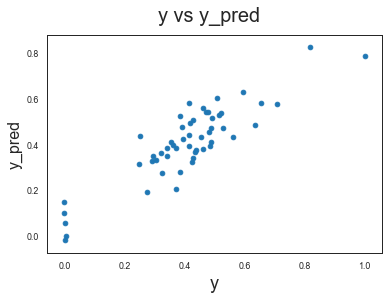

In [2003]:
# Plot y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              
plt.xlabel('y', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

# Distributed Lag Model

In [2004]:
gaming_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [2005]:
gaming_dlm = gaming_df_week_cp[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 
        'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 
        'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 
        'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS']]           


gaming_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0   39520.000     0.258 2.812                    2.844                  32 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000             872.218             815.580            1002.633           0.399           0.417           0.366           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 2758912.000     0.399 5.339                    3.083                 806 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167               0.214             815.580            1002.633            1015.094           0.417           0.366           0.419           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 2348035.359     0.417 5.260                    2.637                 674 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.159               0.021            1002.633            1015.094             195.500           0.366           0.419           0.535           1177.000           1185.286           1206.000               0.000               0.000               0.000          0.000          0.143          0.000     54.600     56.139     59.987
3 2677184.500     0.366 5.315                    2.505                 596 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.025              -0.065            1015.094             195.500            1218.750           0.419           0.535           0.385           1185.286           1206.000           1206.000               0.000               0.000               0.286          0.143          0.000          0.143     56.139     59.987     59.987
4 1965726.000     0.419 5.555                    3.054                 379 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.

In [2006]:
gaming_dlm['lag_1_gmv'] = gaming_dlm['gmv'].shift(-1)
gaming_dlm['lag_2_gmv'] = gaming_dlm['gmv'].shift(-2)
gaming_dlm['lag_3_gmv'] = gaming_dlm['gmv'].shift(-3)

In [2007]:
#checking null
gaming_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV                         1
Digital                    1
Sponsorship                1
Content_marketing          1
Online_marketing           1
Affiliates                 1
SEM                        1
TV_ad                      1
Digital_ad                 1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
Affiliates_ad              1
SEM_ad                     1
NPS                        0
Stock_Index                0
max_temp_C                 0
min_temp_C                 0
mean_temp_C                0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
total_precip_mm            0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_2_listed_price         0
lag_3_listed_p

In [2008]:
gaming_dlm.fillna(0, inplace = True)

In [2009]:
gaming_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

In [2010]:
scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
            'MA2_discount_offer','lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 
            'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 
            'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 
            'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv']

#Scale these variables using 'fit_transform'
gaming_dlm[num_vars] = scaler.fit_transform(gaming_dlm[num_vars])

In [2011]:
gaming_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS  lag_1_gmv  lag_2_gmv  lag_3_gmv
0 0.005     0.000 0.000                    0.562               0.009 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.015       0.134           0.058                 0.000                0.036          0.052   0.105 0.654        0.714       0.785       0.776        0.793          0.000          0.247          0.000          0.000            0.000            0.000             0.638               0.432               0.716               0.669               0.823           0.747           0.779           0.683              0.948              0.948              0.948               0.000               0.286               0.000          0.000          1.000          0.000      0.910      0.910      0.910      0.384      0.327      0.373
1 0.384     0.510 0.694                    0.721               0.221 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.712       0.845        0.788          0.069          0.393          0.420          0.019            0.421            0.009             0.495               1.000               0.669               0.823               0.833           0.779           0.683           0.783              0.948              0.948              0.954               0.286               0.000               0.000          1.000          0.000          1.000      0.910      0.910      0.936      0.327      0.373      0.274
2 0.327     0.572 0.672                    0.425               0.185 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.879       0.958        0.934          0.051          0.799          0.159          0.019            0.161            0.009             0.502               0.488               0.823               0.833               0.160           0.683           0.783           1.000              0.948              0.954              0.971               0.000               0.000               0.000          0.000          1.000          0.000      0.910      0.936      1.000      0.373      0.274      0.000
3 0.372     0.388 0.687                    0.337               0.163 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.654        0.714       0.922       0.843        0.859          0.109          0.706          0.115          0.019            0.118            0.009             0.660               0.259               0.833               0.160               1.000           0.783           1.000           0.720              0.954              0.971              0.971               0.000               0.000               0.286          1.000          0.000          1.000      0.936      1.000      1.000      0.274      0.000      0.001
4 0.273     0.581 0.753                    0.702               0.104 0.001    0.081        0.010              0.000    

In [2012]:
# Split the train dataset into X and y
x = gaming_dlm.drop('gmv',axis=1)
y = gaming_dlm['gmv']

gaming_train_dlm = gaming_dlm

In [2013]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 52)
y dataset:  (53,)


In [2014]:
#  Instantiate
dlm = LinearRegression()

#  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2015]:
#  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        0.586
1                       sla        0.288
2   product_procurement_sla       -0.029
3        order_payment_type        0.520
4                        TV       -0.976
5                   Digital        1.009
6               Sponsorship        0.195
7         Content_marketing       -3.938
8          Online_marketing        2.390
9                Affiliates       -1.733
10                      SEM        3.319
11                    TV_ad        1.236
12               Digital_ad        1.384
13           Sponsorship_ad       -0.768
14     Content_Marketing_ad        4.124
15      Online_Marketing_ad       -1.084
16            Affiliates_ad        0.510
17                   SEM_ad       -5.809
18                      NPS       -0.628
19              Stock_Index        0.011
20               max_temp_C        0.676
21               min_temp_C        0.336
22              mean_temp_C       -0.177
23            heat_deg_days        0.219
24            cool_deg_days       -0.022
25            total_rain_mm       -0.029
26            total_snow_cm        0.141
27          total_precip_mm       -0.007
28          snow_on_grnd_cm       -0.041
29         MA4_listed_price        0.878
30       MA2_discount_offer        0.464
31       lag_1_listed_price        0.614
32       lag_2_listed_price        0.231
33       lag_3_listed_price       -0.015
34           lag_1_discount        0.770
35           lag_2_discount        0.818
36           lag_3_discount       -0.291
37        lag_1_Stock_Index       -1.311
38        lag_2_Stock_Index        1.366
39        lag_3_Stock_Index       -0.544
40       lag_1_holiday_flag        0.127
41       lag_2_holiday_flag       -0.075
42       lag_3_holiday_flag        0.134
43            lag_1_PayDate       -0.056
44            lag_2_PayDate        0.036
45            lag_3_PayDate        0.014
46                lag_1_NPS        0.498
47                lag_2_NPS       -2.293
48                lag_3_NPS        0.895
49                lag_1_gmv       -0.139
50                lag_2_gmv       -0.285
51                lag_3_gmv        0.290

In [2016]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

#### Model building - Stepwise Selection

In [2017]:
def stepwise_selection(x, y,
                       initial_list=col,
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [2018]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Stock_Index                    with p-value 0.925789
Drop lag_3_listed_price             with p-value 0.881058
Drop Affiliates_ad                  with p-value 0.763516
Drop lag_3_PayDate                  with p-value 0.515757
Drop snow_on_grnd_cm                with p-value 0.665631
Drop product_procurement_sla        with p-value 0.481679
Drop total_precip_mm                with p-value 0.295195
Drop heat_deg_days                  with p-value 0.0898707
Drop mean_temp_C                    with p-value 0.0823562
Drop lag_2_PayDate                  with p-value 0.300699
Drop total_rain_mm                  with p-value 0.130029
Drop Sponsorship                    with p-value 0.161281
Drop cool_deg_days                  with p-value 0.115041
Drop Digital_ad                     with p-value 0.0661194
Drop lag_1_gmv                      with p-value 0.0688282

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'TV', 'Digital', 'Content_marketing', 'Online_marketing',

In [2019]:
#  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
dlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.05e-14
Time:                        23:31:46   Log-Likelihood:                 175.12
No. Observations:                  53   AIC:                            -274.2
Df Residuals:                      15   BIC:                            -199.4
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1734      0.136     -8.603      0.000      -1.464      -0.883
discount                 0.5974      0.039     15.361      0.000       0.514       0.680
sla                      0.3281      0.045      7.314      0.000       0.232       0.424
order_payment_type       0.5889      0.033     17.654      0.000       0.518       0.660
TV                      -0.9912      0.095    -10.410      0.000      -1.194      -0.788
Digital                  2.2964      0.164     14.003      0.000       1.947       2.646
Content_marketing       -4.1039      0.340    -12.086      0.000      -4.828      -3.380
Online_marketing         2.6932      0.235     11.440      0.000       2.191       3.195
Affiliates              -1.5829      0.204     -7.759      0.000      -2.018      -1.148
SEM                      2.0509      0.455      4.509      0.000       1.081       3.020
TV_ad                    1.2222      0.113     10.820      0.000       0.981       1.463
Sponsorship_ad          -0.4342      0.057     -7.569      0.000      -0.557      -0.312
Content_Marketing_ad     4.0976      0.367     11.154      0.000       3.315       4.881
Online_Marketing_ad     -0.9843      0.132     -7.470      0.000      -1.265      -0.703
SEM_ad                  -4.4439      0.379    -11.715      0.000      -5.252      -3.635
NPS                     -0.6833      0.067    -10.176      0.000      -0.826      -0.540
max_temp_C               0.4701      0.077      6.104      0.000       0.306       0.634
min_temp_C               0.1076      0.039      2.755      0.015       0.024       0.191
total_snow_cm            0.1819      0.029      6.268      0.000       0.120       0.244
MA4_listed_price         0.7155      0.059     12.151      0.000       0.590       0.841
MA2_discount_offer       0.3799      0.050      7.631      0.000       0.274       0.486
lag_1_listed_price       0.3666      0.054      6.821      0.000       0.252       0.481
lag_2_listed_price       0.1698      0.052      3.286      0.005       0.060       0.280
lag_1_discount           0.4328      0.082      5.261      0.000       0.257       0.608
lag_2_discount           0.7160      0.135      5.303      0.000       0.428       1.004
lag_3_discount          -0.2872      0.062     -4.638      0.000      -0.419      -0.155
lag_1_Stock_Index       -1.2551      0.139     -9.012      0.000      -1.552      -0.958
lag_2_Stock_Index        1.3163      0.139      9.488      0.000       1.021       1.612
lag_3_Stock_Index       -0.5230      0.104     -5.050      0.000      -0.744      -0.302
lag_1_holiday_flag       0.0992      0.022      4.548      0.000       0.053       0.146
lag_2_holiday_flag      -0.0879      0.018     -4.890      0.000      -0.126      -0.050
lag_3_holiday_flag       0.1567      0.022      7.186    

In [2020]:
checkVIF(x_rfe1)

                Features      VIF
0                  const 3533.010
9                    SEM 2158.200
12  Content_Marketing_ad 1467.940
6      Content_marketing 1417.890
14                SEM_ad 1327.570
7       Online_marketing 1050.620
8             Affiliates  888.880
13   Online_Marketing_ad  320.960
34             lag_2_NPS  302.770
5                Digital  301.640
10                 TV_ad  173.070
35             lag_3_NPS  134.870
4                     TV  131.570
27     lag_2_Stock_Index  129.550
24        lag_2_discount  104.470
28     lag_3_Stock_Index  102.450
33             lag_1_NPS   85.350
16            max_temp_C   80.530
26     lag_1_Stock_Index   73.520
15                   NPS   58.680
11        Sponsorship_ad   49.670
25        lag_3_discount   30.400
23        lag_1_discount   23.450
17            min_temp_C   19.100
22    lag_2_listed_price   17.400
21    lag_1_listed_price   14.380
36             lag_2_gmv   13.890
19      MA4_listed_price   13.560
20    MA2_disc

Model 2

Dropping ```'SEM'``` 

In [2021]:
x_rfe1.drop('SEM', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     82.74
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.63e-13
Time:                        23:31:46   Log-Likelihood:                 152.42
No. Observations:                  53   AIC:                            -230.8
Df Residuals:                      16   BIC:                            -157.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8319 

Model 3

Dropping ```'lag_2_listed_price'``` 

In [2022]:
x_rfe1.drop('lag_2_listed_price', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     82.16
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.52e-13
Time:                        23:31:46   Log-Likelihood:                 149.90
No. Observations:                  53   AIC:                            -227.8
Df Residuals:                      17   BIC:                            -156.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7220 

Model 4

Dropping ```'Online_marketing'``` 

In [2023]:
x_rfe1.drop('Online_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.08e-07
Time:                        23:31:46   Log-Likelihood:                 102.25
No. Observations:                  53   AIC:                            -134.5
Df Residuals:                      18   BIC:                            -65.55
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0143 

Model 5

Dropping ```'lag_1_NPS'``` 

In [2024]:
x_rfe1.drop('lag_1_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     15.58
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.78e-08
Time:                        23:31:46   Log-Likelihood:                 102.14
No. Observations:                  53   AIC:                            -136.3
Df Residuals:                      19   BIC:                            -69.28
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0219 

Model 6

Dropping ```'lag_2_holiday_flag'``` 

In [2025]:
x_rfe1.drop('lag_2_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     16.63
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.70e-09
Time:                        23:31:47   Log-Likelihood:                 101.70
No. Observations:                  53   AIC:                            -137.4
Df Residuals:                      20   BIC:                            -72.38
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0524 

Model 7

Dropping ```'Online_Marketing_ad'``` 

In [2026]:
x_rfe1.drop('Online_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     17.43
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.45e-09
Time:                        23:31:47   Log-Likelihood:                 100.84
No. Observations:                  53   AIC:                            -137.7
Df Residuals:                      21   BIC:                            -74.64
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0575 

Model 8

Dropping ```'SEM_ad'``` 

In [2027]:
x_rfe1.drop('SEM_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.33e-07
Time:                        23:31:47   Log-Likelihood:                 86.769
No. Observations:                  53   AIC:                            -111.5
Df Residuals:                      22   BIC:                            -50.46
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3099 

Model 9

Dropping ```'Content_Marketing_ad'```

In [2028]:
x_rfe1.drop('Content_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     11.51
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.39e-08
Time:                        23:31:47   Log-Likelihood:                 86.417
No. Observations:                  53   AIC:                            -112.8
Df Residuals:                      23   BIC:                            -53.73
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3632      0

Model 10

Dropping ```'lag_2_discount'``` 

In [2029]:
x_rfe1.drop('lag_2_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     12.17
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.52e-08
Time:                        23:31:47   Log-Likelihood:                 85.882
No. Observations:                  53   AIC:                            -113.8
Df Residuals:                      24   BIC:                            -56.63
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2592      0

Model 11

Dropping ```'min_temp_C'```

In [2030]:
x_rfe1.drop('min_temp_C', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     12.87
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.16e-09
Time:                        23:31:47   Log-Likelihood:                 85.355
No. Observations:                  53   AIC:                            -114.7
Df Residuals:                      25   BIC:                            -59.54
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2460      0

Model 12

Dropping ```'total_snow_cm'``` 

In [2031]:
x_rfe1.drop('total_snow_cm', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     13.61
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.71e-09
Time:                        23:31:47   Log-Likelihood:                 84.837
No. Observations:                  53   AIC:                            -115.7
Df Residuals:                      26   BIC:                            -62.48
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1047      0

Model 13

Dropping ```'Content_marketing'``` 

In [2032]:
x_rfe1.drop('Content_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     14.43
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.45e-10
Time:                        23:31:47   Log-Likelihood:                 84.376
No. Observations:                  53   AIC:                            -116.8
Df Residuals:                      27   BIC:                            -65.53
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0592      0

Model 15

Dropping ```'lag_1_holiday_flag'``` 

In [2033]:
x_rfe1.drop('lag_1_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     15.44
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.51e-10
Time:                        23:31:47   Log-Likelihood:                 84.143
No. Observations:                  53   AIC:                            -118.3
Df Residuals:                      28   BIC:                            -69.03
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0146      0

Model 16

Dropping ```''sla'``` 

In [2034]:
x_rfe1.drop('sla', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     16.58
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.92e-11
Time:                        23:31:47   Log-Likelihood:                 83.991
No. Observations:                  53   AIC:                            -120.0
Df Residuals:                      29   BIC:                            -72.69
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9968      0

Dropping ```'Affiliates'``` 

In [2035]:
x_rfe1.drop('Affiliates', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     17.41
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.34e-11
Time:                        23:31:47   Log-Likelihood:                 83.260
No. Observations:                  53   AIC:                            -120.5
Df Residuals:                      30   BIC:                            -75.20
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8953      0

Dropping ```'lag_3_holiday_flag'``` 

In [2036]:
x_rfe1.drop('lag_3_holiday_flag', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     18.32
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.44e-12
Time:                        23:31:47   Log-Likelihood:                 82.562
No. Observations:                  53   AIC:                            -121.1
Df Residuals:                      31   BIC:                            -77.78
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8497      0

Dropping ```'TV'``` 

In [2037]:
x_rfe1.drop('TV', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     18.95
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.88e-12
Time:                        23:31:47   Log-Likelihood:                 81.419
No. Observations:                  53   AIC:                            -120.8
Df Residuals:                      32   BIC:                            -79.46
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8177      0

Dropping ```'TV_ad'```

In [2038]:
x_rfe1.drop('TV_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     20.51
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.23e-13
Time:                        23:31:47   Log-Likelihood:                 81.346
No. Observations:                  53   AIC:                            -122.7
Df Residuals:                      33   BIC:                            -83.29
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8331      0

Dropping ```'lag_3_discount'``` 

In [2039]:
x_rfe1.drop('lag_3_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     21.53
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.48e-13
Time:                        23:31:47   Log-Likelihood:                 80.491
No. Observations:                  53   AIC:                            -123.0
Df Residuals:                      34   BIC:                            -85.55
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8779      0

Dropping ```'lag_1_discount'``` 

In [2040]:
x_rfe1.drop('lag_1_discount', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     21.68
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.01e-13
Time:                        23:31:47   Log-Likelihood:                 78.569
No. Observations:                  53   AIC:                            -121.1
Df Residuals:                      35   BIC:                            -85.67
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7904      0

Dropping ```'lag_2_NPS'``` 

In [2041]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     22.43
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.84e-14
Time:                        23:31:47   Log-Likelihood:                 77.241
No. Observations:                  53   AIC:                            -120.5
Df Residuals:                      36   BIC:                            -86.99
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7156      0

Dropping ```'lag_2_Stock_Index'``` 

In [2042]:
x_rfe1.drop('lag_2_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     23.78
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.63e-14
Time:                        23:31:47   Log-Likelihood:                 76.438
No. Observations:                  53   AIC:                            -120.9
Df Residuals:                      37   BIC:                            -89.35
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7039      0

Dropping ```'lag_1_Stock_Index'``` 

In [2043]:
x_rfe1.drop('lag_1_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     25.32
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.36e-15
Time:                        23:31:47   Log-Likelihood:                 75.652
No. Observations:                  53   AIC:                            -121.3
Df Residuals:                      38   BIC:                            -91.75
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7052      0

Dropping ```'lag_3_gmv'``` 

In [2044]:
x_rfe1.drop('lag_3_gmv', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     26.60
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.35e-15
Time:                        23:31:47   Log-Likelihood:                 74.435
No. Observations:                  53   AIC:                            -120.9
Df Residuals:                      39   BIC:                            -93.29
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6328      0

Dropping ```'lag_2_gmv'``` 

In [2045]:
x_rfe1.drop('lag_2_gmv', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     28.28
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.02e-16
Time:                        23:31:47   Log-Likelihood:                 73.390
No. Observations:                  53   AIC:                            -120.8
Df Residuals:                      40   BIC:                            -95.17
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6380      0

Dropping ```'lag_1_PayDate'``` 

In [2046]:
x_rfe1.drop('lag_1_PayDate', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     30.27
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.38e-16
Time:                        23:31:47   Log-Likelihood:                 72.356
No. Observations:                  53   AIC:                            -120.7
Df Residuals:                      41   BIC:                            -97.07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6116      0

Dropping ```'lag_3_Stock_Index'```

In [2047]:
x_rfe1.drop('lag_3_Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     29.46
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.97e-16
Time:                        23:31:48   Log-Likelihood:                 68.923
No. Observations:                  53   AIC:                            -115.8
Df Residuals:                      42   BIC:                            -94.17
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6866      0

Dropping ```'lag_3_NPS'``` 

In [2048]:
x_rfe1.drop('lag_3_NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
print(dlm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     33.40
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.41e-16
Time:                        23:31:48   Log-Likelihood:                 68.846
No. Observations:                  53   AIC:                            -117.7
Df Residuals:                      43   BIC:                            -97.99
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6779      0

In [2049]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'Digital',
 'Sponsorship_ad',
 'NPS',
 'max_temp_C',
 'MA4_listed_price',
 'MA2_discount_offer',
 'lag_1_listed_price']

In [2050]:
#  Model Evaluation on testing data
x_2 = x[features]

#  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [2051]:
#  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.004357533879115669

In [2052]:
#  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0               const        0.586
1            discount        0.288
2  order_payment_type       -0.029
3             Digital        0.520
4      Sponsorship_ad       -0.976
5                 NPS        1.009
6          max_temp_C        0.195
7    MA4_listed_price       -3.938
8  MA2_discount_offer        2.390
9  lag_1_listed_price       -1.733

In [2053]:
#  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0056662  0.00539245 0.01099279 0.00120458 0.00612728 0.01070922
 0.00294931 0.00960964 0.01006961 0.00527306] 

Mean of 5 KFold CV - MSE: 0.006799413540421182


Text(0, 0.5, 'y_pred')

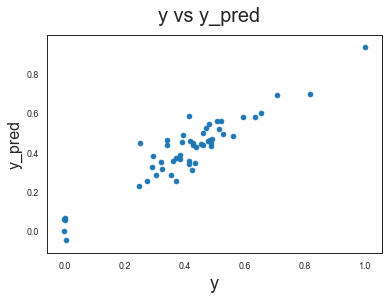

In [2054]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Multiplicative Model

In [2055]:
gaming_mm = gaming_df_week_cp[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]         

gaming_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0   39520.000     0.258 2.812                    2.844                  32                   0 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 2758912.000     0.399 5.339                    3.083                 806                  28 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.167               0.214
2 2348035.359     0.417 5.260                    2.637                 674                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.159               0.021
3 2677184.500     0.366 5.315                    2.505                 596                  19 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041             0.025              -0.065
4 1965726.000     0.419 5.555                    3.054                 379                  17 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.096               0.068

In [2056]:
# Applying Log 
gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [2057]:
gaming_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0 10.585    -1.353 1.034                    1.045               3.466               0.000 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.922      -0.457           0.617                -8.364               -1.103         -1.989   0.228 4.000        7.071         0.000   -1.609       3.239       2.580        2.963         -2.303          0.378          0.000          0.000            0.000            0.000             0.000               0.000
1 14.830    -0.918 1.675                    1.126               6.692               3.332 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.179       2.666        2.958          0.057          0.842          1.424         -3.532            1.431           -3.189               nan              -1.540
2 14.669    -0.875 1.660                    0.970               6.513               2.944 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071        -1.253   -1.946       3.310       2.792        3.087         -0.203          1.552          0.451         -3.532            0.469           -3.189               nan              -3.858
3 14.800    -1.006 1.670                    0.918               6.390               2.944 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.341       2.663        3.022          0.490          1.428          0.131         -3.532            0.157           -3.189            -3.678                 nan
4 14.491    -0.870 1.715                    1.116               5.938               2.833 -6.655   -1.364       -1.548            -13.580            -3.655      -4.217 -0.688 -3.568      -0.558           0.131                -9.046               -1.652         -2.487   0.123 4.028        7.078         0.000   -1.946       3.395       2.788        3.139         -0.203          1.776          1.468         -3.532            1.475           -3.189            -2.346              -2.687

In [2058]:
scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

gaming_mm[num_vars] = scaler.fit_transform(gaming_mm[num_vars])
gaming_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0 0.475     0.000 0.000                    0.629               0.422               0.000 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.444       0.432           0.382                 0.358                0.393          0.382   0.185 0.687        0.734         0.000   -1.609       0.860       0.896        0.884          0.000          0.408          0.303          0.895            0.286            0.677             1.000               1.000
1 0.903     0.599 0.772                    0.773               0.816               3.332 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734         0.000    0.000       0.807       0.931        0.881          0.477          0.604          0.736          0.000            0.731            0.000               nan               0.730
2 0.887     0.657 0.754                    0.495               0.794               2.944 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734        -1.253   -1.946       0.924       0.983        0.965          0.424          0.905          0.440          0.000            0.432            0.000               nan               0.323
3 0.900     0.477 0.766                    0.403               0.779               2.944 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.498       0.547           0.471                 0.388                0.467          0.467   0.331 0.687        0.734         0.000    0.000       0.952       0.930        0.923          0.564          0.853          0.343          0.000            0.335            0.000             0.443                 nan
4 0.869     0.664 0.819                    0.756               0.724               2.833 0.000    0.291        0.000              0.000             0.000       0.000 0.000  0.358       0.404           0.277                 0.307                0.293          0.278   0.147 0.780        0.768         0.000   -1.946       1.000       0.981        1.000          0.424          1.000          0.750          0.000            0.745            0.000             0.645               0.528

In [2059]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [2060]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 34)
y dataset:  (53,)


In [2061]:
# Instantiate
mm = LinearRegression()



In [2062]:
# Fit a line
x=x.fillna(0)
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2063]:
# Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.140
1                       sla        0.180
2   product_procurement_sla        0.039
3        order_payment_type        0.819
4        is_premium_product        0.026
5                        TV       -0.538
6                   Digital        0.445
7               Sponsorship        0.003
8         Content_marketing        0.177
9          Online_marketing       -2.586
10               Affiliates        3.189
11                      SEM       -0.563
12                    TV_ad        0.012
13               Digital_ad       -0.007
14           Sponsorship_ad       -0.156
15     Content_Marketing_ad       -0.735
16      Online_Marketing_ad        6.666
17            Affiliates_ad       -6.248
18                   SEM_ad        0.120
19                      NPS       -0.337
20              Stock_Index       -0.107
21             holiday_flag       -0.017
22                  PayDate       -0.003
23               max_temp_C        0.116
24               min_temp_C        0.104
25              mean_temp_C       -0.099
26            heat_deg_days        0.058
27            cool_deg_days       -0.014
28            total_rain_mm       -0.310
29            total_snow_cm       -0.015
30          total_precip_mm        0.300
31          snow_on_grnd_cm        0.048
32         MA4_listed_price       -0.004
33       MA2_discount_offer       -0.035

In [2064]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Model Building - Stepwise selection for feature selection

In [2065]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [2066]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship                    with p-value 0.992025
Drop TV_ad                          with p-value 0.97558
Drop Digital_ad                     with p-value 0.982455
Drop MA4_listed_price               with p-value 0.864989
Drop total_snow_cm                  with p-value 0.605872
Drop mean_temp_C                    with p-value 0.606398
Drop Content_marketing              with p-value 0.663327
Drop PayDate                        with p-value 0.484422
Drop cool_deg_days                  with p-value 0.403523
Drop Online_marketing               with p-value 0.387442
Drop min_temp_C                     with p-value 0.178133
Drop heat_deg_days                  with p-value 0.274205
Drop is_premium_product             with p-value 0.193289
Drop SEM_ad                         with p-value 0.267492
Drop total_precip_mm                with p-value 0.280055
Drop total_rain_mm                  with p-value 0.53447
Drop product_procurement_sla        with p-value 0.207194
Drop max_temp_C 

In [2067]:
#Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]
x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

mm1.params

const                   0.345
discount               -0.085
sla                     0.175
order_payment_type      0.923
TV                     -0.333
Digital                 0.408
Affiliates              0.440
SEM                    -0.475
Sponsorship_ad         -0.098
Content_Marketing_ad   -0.345
Online_Marketing_ad     4.494
Affiliates_ad          -4.304
NPS                    -0.331
Stock_Index            -0.067
holiday_flag           -0.018
MA2_discount_offer     -0.054
dtype: float64

In [2068]:
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     345.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.00e-35
Time:                        23:31:49   Log-Likelihood:                 135.85
No. Observations:                  53   AIC:                            -239.7
Df Residuals:                      37   BIC:                            -208.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3453      0.044      7.767      0.000       0.255       0.435
discount                -0.0852      0.026     -3.223      0.003      -0.139      -0.032
sla                      0.1747      0.029      6.065      0.000       0.116       0.233
order_payment_type       0.9234      0.029     32.068      0.000       0.865       0.982
TV                      -0.3326      0.119     -2.786      0.008      -0.575      -0.091
Digital                  0.4078      0.053      7.679      0.000       0.300       0.515
Affiliates               0.4402      0.141      3.131      0.003       0.155       0.725
SEM                     -0.4748      0.057     -8.370      0.000      -0.590      -0.360
Sponsorship_ad          -0.0983      0.032     -3.108      0.004      -0.162      -0.034
Content_Marketing_ad    -0.3452      0.135     -2.561      0.015      -0.618      -0.072
Online_Marketing_ad      4.4940      0.874      5.141      0.000       2.723       6.265
Affiliates_ad           -4.3036      0.788     -5.460      0.000      -5.901      -2.706
NPS                     -0.3305      0.036     -9.101      0.000      -0.404      -0.257
Stock_Index             -0.0674      0.017     -4.033      0.000      -0.101      -0.034
holiday_flag            -0.0180      0.008     -2.344      0.025      -0.033      -0.002
MA2_discount_offer      -0.0538      0.017     -3.208      0.003      -0.088      -0.020
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.061
Skew:                           0.170   Prob(JB):                        0.588
Kurtosis:                       3.605   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2069]:
checkVIF(x_rfe1)

                Features      VIF
10   Online_Marketing_ad 7463.720
11         Affiliates_ad 6299.550
6             Affiliates  213.050
0                  const  210.340
9   Content_Marketing_ad  153.660
4                     TV  129.230
7                    SEM   19.350
5                Digital   18.200
12                   NPS    9.680
8         Sponsorship_ad    8.500
3     order_payment_type    4.570
13           Stock_Index    3.380
2                    sla    2.680
1               discount    1.930
15    MA2_discount_offer    1.840
14          holiday_flag    1.730


Dropping ```'Affiliates_ad'``` 

In [2070]:
x_rfe1.drop('Affiliates_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.82e-31
Time:                        23:31:49   Log-Likelihood:                 120.19
No. Observations:                  53   AIC:                            -210.4
Df Residuals:                      38   BIC:                            -180.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3779      0.058      6.470      0.000       0.260       0.496
discount                -0.1318      0.033     -3.974      0.000      -0.199      -0.065
sla                      0.1313      0.037      3.577      0.001       0.057       0.206
order_payment_type       0.9540      0.037     25.477      0.000       0.878       1.030
TV                      -0.5123      0.152     -3.366      0.002      -0.820      -0.204
Digital                  0.2888      0.064      4.498      0.000       0.159       0.419
Affiliates               0.4243      0.186      2.277      0.029       0.047       0.802
SEM                     -0.3405      0.068     -5.025      0.000      -0.478      -0.203
Sponsorship_ad          -0.0011      0.035     -0.033      0.974      -0.071       0.069
Content_Marketing_ad     0.1240      0.138      0.901      0.373      -0.155       0.403
Online_Marketing_ad     -0.2049      0.203     -1.008      0.320      -0.616       0.207
NPS                     -0.2734      0.046     -5.929      0.000      -0.367      -0.180
Stock_Index             -0.0465      0.022     -2.157      0.037      -0.090      -0.003
holiday_flag            -0.0117      0.010     -1.166      0.251      -0.032       0.009
MA2_discount_offer      -0.0487      0.022     -2.192      0.035      -0.094      -0.004
==============================================================================
Omnibus:                        0.620   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.736
Skew:                          -0.219   Prob(JB):                        0.692
Kurtosis:                       2.623   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping ```'Sponsorship_ad'``` 

In [2071]:
x_rfe1.drop('Sponsorship_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.17e-32
Time:                        23:31:49   Log-Likelihood:                 120.19
No. Observations:                  53   AIC:                            -212.4
Df Residuals:                      39   BIC:                            -184.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3779 

Dropping ```'Content_Marketing_ad''```

In [2072]:
x_rfe1.drop('Content_Marketing_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     251.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.09e-33
Time:                        23:31:49   Log-Likelihood:                 119.62
No. Observations:                  53   AIC:                            -213.2
Df Residuals:                      40   BIC:                            -187.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4121    

Dropping ```'Online_Marketing_ad'```

In [2073]:
x_rfe1.drop('Online_Marketing_ad',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     278.9
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.36e-35
Time:                        23:31:49   Log-Likelihood:                 119.41
No. Observations:                  53   AIC:                            -214.8
Df Residuals:                      41   BIC:                            -191.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4112      0

Dropping ```'holiday_flag'``` 

In [2074]:
x_rfe1.drop('holiday_flag',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     299.9
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.06e-35
Time:                        23:31:49   Log-Likelihood:                 118.19
No. Observations:                  53   AIC:                            -214.4
Df Residuals:                      42   BIC:                            -192.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4124      0

Dropping ```'Affiliates'``` 

In [2075]:
x_rfe1.drop('Affiliates',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     242.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.54e-34
Time:                        23:31:49   Log-Likelihood:                 109.27
No. Observations:                  53   AIC:                            -198.5
Df Residuals:                      43   BIC:                            -178.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3722      0

Dropping ```'Stock_Index'``` 

In [2076]:
x_rfe1.drop('Stock_Index',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.74e-35
Time:                        23:31:49   Log-Likelihood:                 108.30
No. Observations:                  53   AIC:                            -198.6
Df Residuals:                      44   BIC:                            -180.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3633      0

Dropping ```'SEM'``` 

In [2077]:
x_rfe1.drop('SEM',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     233.9
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.35e-33
Time:                        23:31:49   Log-Likelihood:                 100.68
No. Observations:                  53   AIC:                            -185.4
Df Residuals:                      45   BIC:                            -169.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3009      0

Dropping ```'Digital'``` 

In [2078]:
x_rfe1.drop('Digital',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     271.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.42e-34
Time:                        23:31:49   Log-Likelihood:                 100.01
No. Observations:                  53   AIC:                            -186.0
Df Residuals:                      46   BIC:                            -172.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3133      0

Dropping ```'MA2_discount_offer'``` 

In [2079]:
x_rfe1.drop('MA2_discount_offer',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     321.1
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.13e-35
Time:                        23:31:49   Log-Likelihood:                 99.051
No. Observations:                  53   AIC:                            -186.1
Df Residuals:                      47   BIC:                            -174.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2875      0

In [2080]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'order_payment_type', 'TV', 'NPS']

In [2081]:
# Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [2082]:
# Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0013939040378765975

In [2083]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0               const       -0.140
1            discount        0.180
2                 sla        0.039
3  order_payment_type        0.819
4                  TV        0.026
5                 NPS       -0.538

In [2084]:
# Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00192695 0.00344974 0.00241937 0.00107948 0.00308479 0.00228895
 0.00105709 0.00087188 0.00066251 0.00106061] 

Mean of 5 KFold CV - MSE: 0.001790136287931701


Text(0, 0.5, 'y_pred')

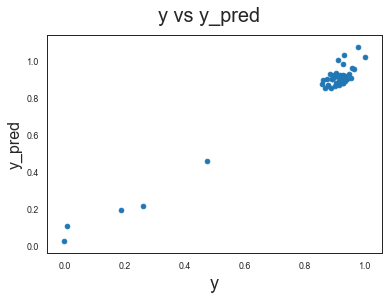

In [2085]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Home Audio Accesories

In [2086]:
homeaudio_df.shape

(114350, 19)

In [2087]:
homeaudio_df.head()

fsn_id          order_date  Year  Month          order_id     order_item_id      gmv  units  order_payment_type  sla product_analytic_category product_analytic_sub_category product_analytic_vertical  product_mrp  product_procurement_sla  listing_price  discount  week  is_premium_product
2840  ACCCZZC9XHZZ49FS 2015-10-03 20:35:30  2015     10  1407395732747800  1407395732747800 7049.000      1                   1    5        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker     7499.000                        5       7049.000     0.060    14                   1
2841  ACCCZZC9XHZZ49FS 2015-10-16 09:03:09  2015     10  2418213882235600  2418213882235600 5489.000      1                   1    2        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker     7499.000                        5       5489.000     0.270    16                   1
2842  ACCCZZC9XHZZ49FS 2015-10-16 21:55:31  2015     10  2418675653264600  2418675653264600 6255.000      1                   1    9        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker     7499.000                        5       6255.000     0.170    16                   1
2843  ACCCZZC9XHZZ49FS 2015-10-16 23:25:07  2015     10  1418727172944200  1418727172944200 6099.000      1                   1    3        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker     7499.000                        5       6099.000     0.190    16                   1
2844  ACCCZZC9XHZZ49FS 2015-10-20 17:42:59  2015     10  2421983590777500  2421983590777500 6850.000      1                   0    9        EntertainmentSmall                     HomeAudio          HomeAudioSpeaker     7499.000                        5       6850.000     0.090    17                   1

### Aggregate Data on week basis

In [2088]:
#aggreagrate data on mean and sum for numerical columns
homeaudio_df_week = pd.DataFrame(homeaudio_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'is_premium_product':'sum'}))
homeaudio_df_week.reset_index( inplace = True)

In [2089]:
homeaudio_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product
0     1  106915.000       2741.410     4675.974     0.374 2.795                    3.436      23             39        39                  38                   3
1     2 4765852.133       2194.014     3449.615     0.318 7.545                    2.801     241           2160      2159                 525                 113
2     3 5543862.000       2194.715     3559.165     0.330 7.135                    2.697     269           2512      2507                 594                 124
3     4 4854806.000       2096.934     3452.262     0.321 7.178                    2.799     268           2303      2296                 492                  98
4     5 3526072.000       2162.296     3508.394     0.320 7.330                    2.709     232           1623      1621                 364                  77

In [2090]:
homeaudio_df_week.week.unique()

array([ 1,  2,  3,  4,  5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])

In [2091]:
cal_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [2092]:
media_investment_df.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [2093]:
#change datatype before merge
homeaudio_df_week['week'] = homeaudio_df_week['week'].astype(int)
cal_df['week'] = cal_df['week'].astype(int)

In [2094]:
#merge homeaudio_df_week and media_df
homeaudio_df_week = homeaudio_df_week.merge(media_investment_df, how = 'left', on = 'week')

In [2095]:
homeaudio_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad
0     1  106915.000       2741.410     4675.974     0.374 2.795                    3.436      23             39        39                  38                   3 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256
1     2 4765852.133       2194.014     3449.615     0.318 7.545                    2.801     241           2160      2159                 525                 113 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
2     3 5543862.000       2194.715     3559.165     0.330 7.135                    2.697     269           2512      2507                 594                 124 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
3     4 4854806.000       2096.934     3452.262     0.321 7.178                    2.799     268           2303      2296                 492                  98 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884
4     5 3526072.000       2162.296     3508.394     0.320 7.330                    2.709     232           1623      1621                 364                  77 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131

In [2096]:
cal_df.head()

week    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

In [2097]:
#merge homeaudio_df_week and cal df
homeaudio_df_week = homeaudio_df_week.merge(cal_df, how = 'left', on = 'week')

In [2098]:
homeaudio_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm
0     1  106915.000       2741.410     4675.974     0.374 2.795                    3.436      23             39        39                  38                   3 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000
1     2 4765852.133       2194.014     3449.615     0.318 7.545                    2.801     241           2160      2159                 525                 113 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041
2     3 5543862.000       2194.715     3559.165     0.330 7.135                    2.697     269           2512      2507                 594                 124 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041
3     4 4854806.000       2096.934     3452.262     0.321 7.178                    2.799     268           2303      2296                 492                  98 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041
4     5 3526072.000       2162.296     3508.394     0.320 7.330                    2.709     232           1623      1621                 364                  77 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041

#### Moving Average Home Audio Accesory

In [2099]:
# Moving Average for listing_price and discount



homeaudio_df_week[['MA2_LP','MA2_Discount']] = homeaudio_df_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
homeaudio_df_week[['MA3_LP','MA3_Discount']] = homeaudio_df_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
homeaudio_df_week[['MA4_LP','MA4_Discount']] = homeaudio_df_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

# Reference listed price Inflation 

homeaudio_df_week['MA2_listed_price'] = (homeaudio_df_week['listing_price']-homeaudio_df_week['MA2_LP'])/homeaudio_df_week['MA2_LP']
homeaudio_df_week['MA3_listed_price'] = (homeaudio_df_week['listing_price']-homeaudio_df_week['MA3_LP'])/homeaudio_df_week['MA3_LP']
homeaudio_df_week['MA4_listed_price'] = (homeaudio_df_week['listing_price']-homeaudio_df_week['MA4_LP'])/homeaudio_df_week['MA4_LP']

# Reference discount Inflation

homeaudio_df_week['MA2_discount_offer'] = (homeaudio_df_week['discount']-homeaudio_df_week['MA2_Discount'])/homeaudio_df_week['MA2_Discount']
homeaudio_df_week['MA3_discount_offer'] = (homeaudio_df_week['discount']-homeaudio_df_week['MA3_Discount'])/homeaudio_df_week['MA3_Discount']
homeaudio_df_week['MA4_discount_offer'] = (homeaudio_df_week['discount']-homeaudio_df_week['MA4_Discount'])/homeaudio_df_week['MA4_Discount']


homeaudio_df_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True) 
homeaudio_df_week.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1  106915.000       2741.410     4675.974     0.374 2.795                    3.436      23             39        39                  38                   3 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 4765852.133       2194.014     3449.615     0.318 7.545                    2.801     241           2160      2159                 525                 113 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111            -0.111            -0.111              -0.082              -0.082              -0.082
2     3 5543862.000       2194.715     3559.165     0.330 7.135                    2.697     269           2512      2507                 594                 124 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.000            -0.077            -0.077               0.019              -0.032              -0.032
3     4 4854806.000       2096.934     3452.262     0.321 7.178                    2.799     268           2303      2296                 492                  98 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.023            -0.030            -0.091              -0.013              -0.005              -0.043
4     5 3526072.000       2162.296     3508.394     0.320 7.330                    2.709     232           1623      1621                 364                  77 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.015             0.005        

Camera Accessory - multicollinearity between revenue and other variables

In [2100]:
#Find Highly correlated data and drop Highly Correlated Columns

correlation_0 = homeaudio_df_week.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[(correlation_0 > 0.95) | (correlation_0 < -0.95)]
print(round(corr,2))

SEM_ad                Content_Marketing_ad   0.960
Content_Marketing_ad  SEM_ad                 0.960
Content_marketing     SEM                    0.960
SEM                   Content_marketing      0.960
Online_marketing      Affiliates_ad          0.960
Affiliates_ad         Online_marketing       0.960
mean_temp_C           max_temp_C             0.970
max_temp_C            mean_temp_C            0.970
Digital               Digital_ad             0.970
Digital_ad            Digital                0.970
min_temp_C            heat_deg_days          0.970
heat_deg_days         min_temp_C             0.970
SEM_ad                SEM                    0.970
SEM                   SEM_ad                 0.970
Content_marketing     Content_Marketing_ad   0.970
Content_Marketing_ad  Content_marketing      0.970
Sponsorship_ad        Sponsorship            0.970
Sponsorship           Sponsorship_ad         0.970
heat_deg_days         mean_temp_C            0.970
mean_temp_C           heat_deg_

In [2101]:
homeaudio_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

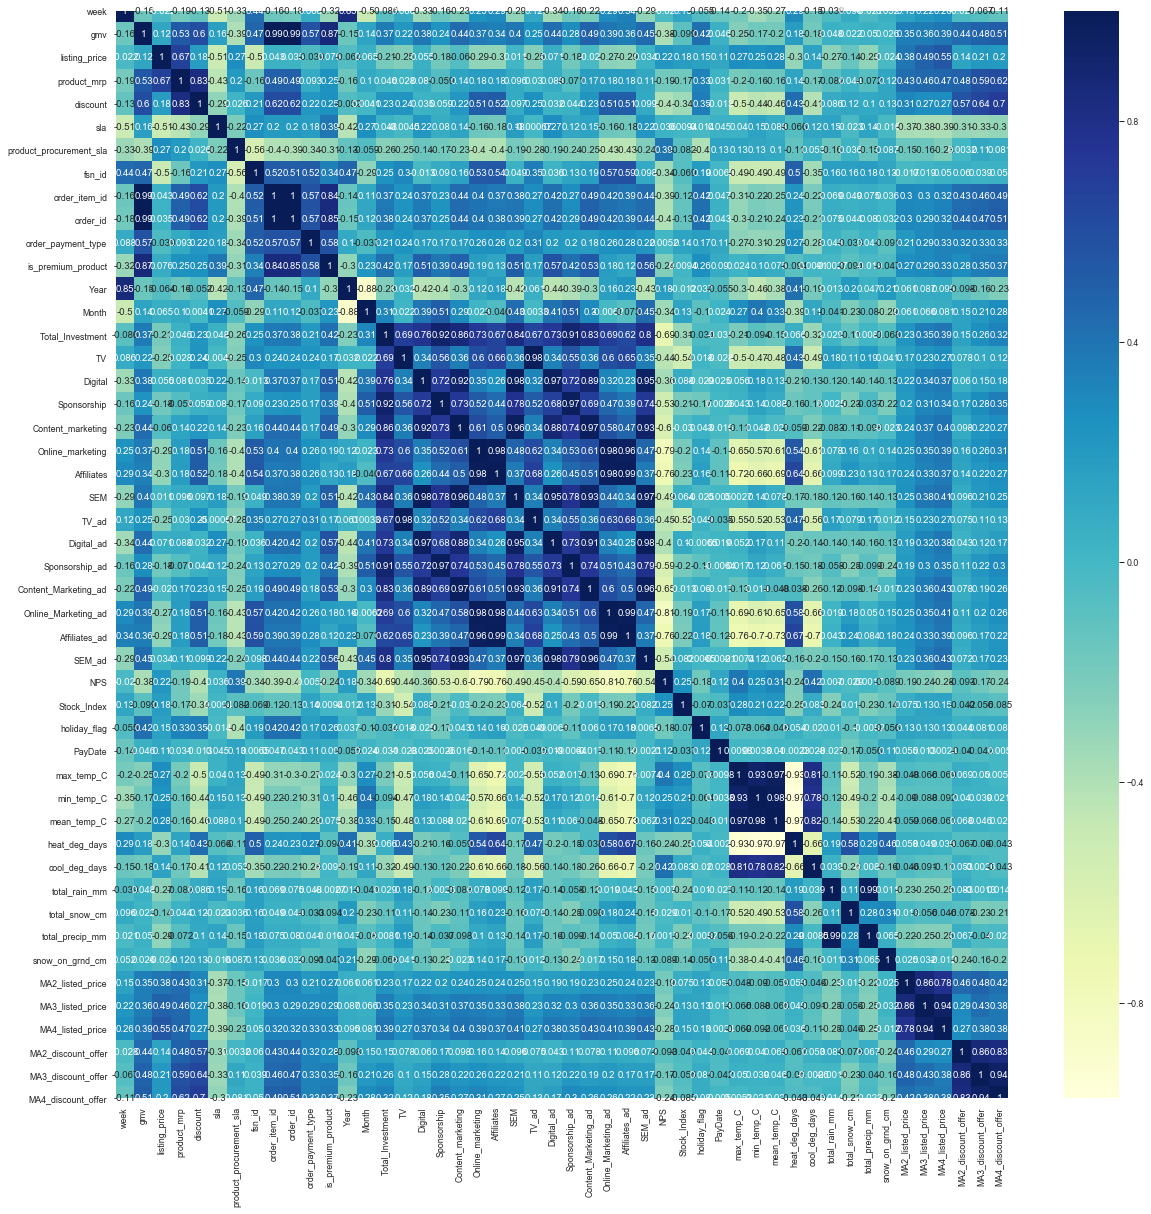

In [2102]:
plt.figure(figsize=(20,20))
sns.heatmap(homeaudio_df_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [2103]:
homeaudio_df_week_cp = homeaudio_df_week.copy(deep=True)

In [2104]:
homeaudio_df_week_cp.head()

week         gmv  listing_price  product_mrp  discount   sla  product_procurement_sla  fsn_id  order_item_id  order_id  order_payment_type  is_premium_product       Date     Year  Month  Total_Investment    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer
0     1  106915.000       2741.410     4675.974     0.374 2.795                    3.436      23             39        39                  38                   3 2015-07-05 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000
1     2 4765852.133       2194.014     3449.615     0.318 7.545                    2.801     241           2160      2159                 525                 113 2015-07-12 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111            -0.111            -0.111              -0.082              -0.082              -0.082
2     3 5543862.000       2194.715     3559.165     0.330 7.135                    2.697     269           2512      2507                 594                 124 2015-07-19 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.000            -0.077            -0.077               0.019              -0.032              -0.032
3     4 4854806.000       2096.934     3452.262     0.321 7.178                    2.799     268           2303      2296                 492                  98 2015-07-26 2015.000  7.000             4.265 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.023            -0.030            -0.091              -0.013              -0.005              -0.043
4     5 3526072.000       2162.296     3508.394     0.320 7.330                    2.709     232           1623      1621                 364                  77 2015-08-02 2015.000  8.000             1.013 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.015             0.005        

In [2105]:
homeaudio_df_week_cp.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [2106]:
#Drop some items not required one like 'order_id','order_item_id' and not dropping highly correlated items
homeaudio_df_week_cp.drop(['fsn_id', 'order_item_id','order_id','week','Date', 'Year', 'Month',
                       'product_mrp','Total_Investment'],axis = 1, inplace = True)

### Lag variables for Distributed model

In [2107]:

homeaudio_df_week_cp['lag_1_listed_price'] = homeaudio_df_week_cp['listing_price'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_listed_price'] = homeaudio_df_week_cp['listing_price'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_listed_price'] = homeaudio_df_week_cp['listing_price'].shift(-3).fillna(0)

homeaudio_df_week_cp['lag_1_discount'] = homeaudio_df_week_cp['discount'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_discount'] = homeaudio_df_week_cp['discount'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_discount'] = homeaudio_df_week_cp['discount'].shift(-3).fillna(0)

homeaudio_df_week_cp['lag_1_Stock_Index'] = homeaudio_df_week_cp['Stock_Index'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_Stock_Index'] = homeaudio_df_week_cp['Stock_Index'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_Stock_Index'] = homeaudio_df_week_cp['Stock_Index'].shift(-3).fillna(0)

homeaudio_df_week_cp['lag_1_holiday_flag'] = homeaudio_df_week_cp['holiday_flag'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_holiday_flag'] = homeaudio_df_week_cp['holiday_flag'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_holiday_flag'] = homeaudio_df_week_cp['holiday_flag'].shift(-3).fillna(0)

homeaudio_df_week_cp['lag_1_PayDate'] = homeaudio_df_week_cp['PayDate'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_PayDate'] = homeaudio_df_week_cp['PayDate'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_PayDate'] = homeaudio_df_week_cp['PayDate'].shift(-3).fillna(0)

homeaudio_df_week_cp['lag_1_NPS'] = homeaudio_df_week_cp['NPS'].shift(-1).fillna(0)
homeaudio_df_week_cp['lag_2_NPS'] = homeaudio_df_week_cp['NPS'].shift(-2).fillna(0)
homeaudio_df_week_cp['lag_3_NPS'] = homeaudio_df_week_cp['NPS'].shift(-3).fillna(0)

In [2108]:
homeaudio_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0  106915.000       2741.410     0.374 2.795                    3.436                  38                   3 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000            2194.014            2194.715            2096.934           0.318           0.330           0.321           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 4765852.133       2194.014     0.318 7.545                    2.801                 525                 113 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111            -0.111            -0.111              -0.082              -0.082              -0.082            2194.715            2096.934            2162.296           0.330           0.321           0.320           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 5543862.000       2194.715     0.330 7.135                    2.697                 594                 124 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.000            -0.077            -0.077               0.019              -0.032              -0.032            2096.934            2162.296            2073.237           0.321           0.320           0.358           1177.000           1185.286           1116.000               0.000               0.000               0.000          0.000          0.143          0.143     54.600     56.139     48.791
3 4854806.000       2096.934     0.321 7.178                    2.799                 492                  98 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

# Modeling 

## Home Audio Accesory

#### Linear Model

In [2109]:
homeaudio_df_week_cp.head()

gmv  listing_price  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  MA3_discount_offer  MA4_discount_offer  lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate  lag_1_NPS  lag_2_NPS  lag_3_NPS
0  106915.000       2741.410     0.374 2.795                    3.436                  38                   3 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000             0.000             0.000               0.000               0.000               0.000            2194.014            2194.715            2096.934           0.318           0.330           0.321           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000     54.600     54.600     54.600
1 4765852.133       2194.014     0.318 7.545                    2.801                 525                 113 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111            -0.111            -0.111              -0.082              -0.082              -0.082            2194.715            2096.934            2162.296           0.330           0.321           0.320           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143     54.600     54.600     56.139
2 5543862.000       2194.715     0.330 7.135                    2.697                 594                 124 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041             0.000            -0.077            -0.077               0.019              -0.032              -0.032            2096.934            2162.296            2073.237           0.321           0.320           0.358           1177.000           1185.286           1116.000               0.000               0.000               0.000          0.000          0.143          0.143     54.600     56.139     48.791
3 4854806.000       2096.934     0.321 7.178                    2.799                 492                  98 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041   

In [2110]:
homeaudio_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [2111]:
 model_columns1 = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

model1 = homeaudio_df_week_cp[model_columns1]

In [2112]:
model1.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0  106915.000     0.374 2.795                    3.436                  38                   3 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4765852.133     0.318 7.545                    2.801                 525                 113 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111              -0.082
2 5543862.000     0.330 7.135                    2.697                 594                 124 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.077               0.019
3 4854806.000     0.321 7.178                    2.799                 492                  98 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.091              -0.013
4 3526072.000     0.320 7.330                    2.709                 364                  77 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.000              -0.002

In [2113]:
#function to get all required columns in the model and fill it with 0 for null values
def intitalModel():

    model_columns = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

    model = homeaudio_df_week_cp[model_columns]
    model.fillna(0, inplace = True)
    return model

Split data into train and test

In [2114]:
np.random.seed(0)
df_train, df_test= train_test_split(intitalModel(),train_size=0.7,test_size = 0.3,random_state=60)
print(df_train.shape)
print(df_test.shape)

(34, 35)
(15, 35)


Rescaling Techniques
2 methods
1. Min-Max/Normalisation - b/w 0 and 1
2. Standarisation - mean=0 sigma=1

In [2115]:
scaler = MinMaxScaler()

num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
25 0.322     0.768 0.584                    0.318               0.307                  76 0.377    0.029        0.040              0.209             0.752       0.845 0.105  0.377       0.029           0.040                 0.209                0.752          0.845   0.105 0.264        0.163         0.429    0.000       0.207       0.534        0.546          0.401          0.378          0.187          0.116            0.200            0.045             0.337               0.641
29 0.365     0.856 0.475                    0.305               0.306                  86 0.278    0.152        0.138              0.173             0.816       0.927 0.153  0.278       0.152           0.138                 0.173                0.816          0.927   0.153 0.581        0.912         0.429    0.143       0.375       0.214        0.316          0.619          0.216          0.149          0.093            0.160            0.160             0.407               0.730
42 0.182     0.240 0.471                    0.391               0.162                  60 0.118    0.049        0.299              0.184             0.776       0.780 0.173  0.118       0.049           0.299                 0.184                0.776          0.780   0.173 0.285        0.938         0.000    0.000       0.503       0.469        0.515          0.399          0.270          0.195          0.116            0.209            0.045             0.476               0.419
5  0.190     0.402 0.596                    0.495               0.200                  92 0.417    0.107        0.742              0.177             0.672       0.722 0.194  0.278       0.099           0.498                 0.118                0.449          0.484   0.151 0.431        0.445         0.000    0.143       1.000       0.971        0.978          0.109          1.000          0.913          0.023            0.911            0.009             0.285               0.747
2  0.280     0.206 0.914                    0.448               0.283                 124 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 1.000        0.714         0.286    0.143       0.925       1.000        1.000          0.051          0.913          0.159          0.023            0.161            0.009             0.117               0.587

In [2116]:
df_train.describe()

gmv  discount    sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
count 34.000    34.000 34.000                   34.000              34.000              34.000 34.000   34.000       34.000             34.000            34.000      34.000 34.000 34.000      34.000          34.000                34.000               34.000         34.000  34.000 34.000       34.000        34.000   34.000      34.000      34.000       34.000         34.000         34.000         34.000         34.000           34.000           34.000            34.000              34.000
mean   0.255     0.409  0.590                    0.396               0.278              79.471  0.375    0.158        0.323              0.161             0.611       0.682  0.198  0.380       0.167           0.332                 0.172                0.614          0.682   0.207  0.436        0.591         0.143    0.065       0.500       0.518        0.541          0.405          0.370          0.257          0.136            0.272            0.063             0.344               0.487
std    0.158     0.254  0.190                    0.156               0.201              54.339  0.273    0.223        0.288              0.231             0.281       0.299  0.210  0.279       0.224           0.275                 0.231                0.283          0.302   0.213  0.283        0.350         0.261    0.075       0.287       0.282        0.282          0.268          0.257          0.224          0.221            0.226            0.171             0.178               0.224
min    0.000     0.000  0.000                    0.000               0.000               3.000  0.000    0.000        0.000              0.000             0.000       0.000  0.000  0.000       0.000           0.000                 0.000                0.000          0.000   0.000  0.000        0.000         0.000    0.000       0.000       0.000        0.000          0.000          0.000          0.000          0.000            0.000            0.000             0.000               0.000
25%    0.190     0.241  0.488                    0.309               0.180              59.250  0.179    0.054        0.088              0.013             0.642       0.722  0.120  0.164       0.069           0.099                 0.020                0.518          0.574   0.131  0.255        0.217         0.000    0.000       0.303       0.369        0.376          0.181          0.216          0.133          0.046            0.140            0.011             0.260               0.366
50%    0.213     0.357  0.591                    0.391               0.212              66.500  0.377    0.107        0.287              0.140             0.678       0.780  0.155  0.377       0.107           0.296                 0.146                0.728          0.798   0.155  0.358        0.714         0.000    0.000       0.440       0.488        0.503          0.410          0.287          0.187          0.070            0.205            0.027             0.339               0.471
75%    0.275     0.521  0.667                    0.446               0.282              90.000  0.524    0.166        0.491              0.184             0.757       0.845  0.173  0.535       0.166           0.491                 0.203                0.773          0.879   0.173  0.595        0.902         0.250    0.143       0.730       0.759        0.778          0.535          0.454          0.320          0.116            0.341            0.043             0.407               0.584
max    1.000     1.000  1.000                    1.000           

In [2117]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
y_train = df_train.pop('gmv')
X_train = df_train

In [2118]:
#Running RFE with the output number of the variable equalt to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [2119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', False, 12),
 ('sla', False, 22),
 ('product_procurement_sla', False, 10),
 ('order_payment_type', True, 1),
 ('is_premium_product', False, 25),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', False, 3),
 ('Content_marketing', False, 5),
 ('Online_marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('TV_ad', False, 11),
 ('Digital_ad', True, 1),
 ('Sponsorship_ad', False, 4),
 ('Content_Marketing_ad', False, 2),
 ('Online_Marketing_ad', True, 1),
 ('Affiliates_ad', True, 1),
 ('SEM_ad', False, 7),
 ('NPS', True, 1),
 ('Stock_Index', False, 6),
 ('holiday_flag', False, 16),
 ('PayDate', False, 14),
 ('max_temp_C', False, 17),
 ('min_temp_C', False, 9),
 ('mean_temp_C', False, 19),
 ('heat_deg_days', False, 8),
 ('cool_deg_days', False, 20),
 ('total_rain_mm', False, 13),
 ('total_snow_cm', False, 15),
 ('total_precip_mm', False, 21),
 ('snow_on_grnd_cm', False, 23),
 ('MA4_listed_price', False, 24),
 ('MA2_discount_offer', False, 18)]

In [2120]:
col = X_train.columns[rfe.support_]
col

Index(['order_payment_type', 'TV', 'Digital', 'Online_marketing', 'Affiliates', 'SEM', 'Digital_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'NPS'], dtype='object')

In [2121]:
X_train.columns[~rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'is_premium_product', 'Sponsorship', 'Content_marketing', 'TV_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'SEM_ad', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Building model using statsmodel, for the detailed analysis

In [2122]:
X_train_rfe = X_train[col]

In [2123]:
X_train_rfe.head()

order_payment_type    TV  Digital  Online_marketing  Affiliates   SEM  Digital_ad  Online_Marketing_ad  Affiliates_ad   NPS
25               0.307 0.377    0.029             0.752       0.845 0.105       0.029                0.752          0.845 0.264
29               0.306 0.278    0.152             0.816       0.927 0.153       0.152                0.816          0.927 0.581
42               0.162 0.118    0.049             0.776       0.780 0.173       0.049                0.776          0.780 0.285
5                0.200 0.417    0.107             0.672       0.722 0.194       0.099                0.449          0.484 0.431
2                0.283 0.023    0.201             0.054       0.078 0.157       0.201                0.054          0.078 1.000

Define Function for build_model and VIF

In [2124]:
# It will give the detailed stats model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model 1 using RFE

In [2125]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     12.23
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.24e-07
Time:                        23:31:57   Log-Likelihood:                 46.398
No. Observations:                  34   AIC:                            -70.80
Df Residuals:                      23   BIC:                            -54.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5858    

In [2126]:
checkVIF(X_train_new)

Features      VIF
9         Affiliates_ad 3376.720
5            Affiliates 3274.780
8   Online_Marketing_ad 2994.530
4      Online_marketing 2901.510
3               Digital  200.580
6                   SEM  186.150
0                 const   69.010
7            Digital_ad   46.110
10                  NPS    7.180
2                    TV    3.800
1    order_payment_type    2.820

Dropping ```'Online_Marketing_ad"'```

In [2127]:

X_train_new = X_train_new.drop(["Online_Marketing_ad"], axis = 1)

Model 2

In [2128]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     14.18
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.33e-07
Time:                        23:31:57   Log-Likelihood:                 46.396
No. Observations:                  34   AIC:                            -72.79
Df Residuals:                      24   BIC:                            -57.53
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5867      0

As p-value for Digital_ad is > 0.05 so remove SEM and update the model

Model 3

Dropping ```'Digital_ad'``` 

In [2129]:
_train_new = X_train_new.drop(['Digital_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     14.18
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.33e-07
Time:                        23:31:57   Log-Likelihood:                 46.396
No. Observations:                  34   AIC:                            -72.79
Df Residuals:                      24   BIC:                            -57.53
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5867      0

Features     VIF
5          Affiliates 332.970
4    Online_marketing 296.800
6                 SEM 183.650
3             Digital 169.520
0               const  67.370
8       Affiliates_ad  48.920
7          Digital_ad  25.910
9                 NPS   7.160
2                  TV   3.780
1  order_payment_type   2.720

Model 4

Dropping ```'Affiliates_ad'``` 

In [2130]:
X_train_new = X_train_new.drop(['Affiliates_ad'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     15.18
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.66e-08
Time:                        23:31:57   Log-Likelihood:                 45.112
No. Observations:                  34   AIC:                            -72.22
Df Residuals:                      25   BIC:                            -58.49
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5456      0

Features     VIF
4    Online_marketing 294.500
5          Affiliates 262.310
6                 SEM 174.090
3             Digital 163.560
0               const  61.750
7          Digital_ad  25.700
8                 NPS   6.370
2                  TV   3.560
1  order_payment_type   2.610

Model 5

Dropping ```'TV'```

In [2131]:
X_train_new = X_train_new.drop(['TV'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     16.43
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.47e-08
Time:                        23:31:57   Log-Likelihood:                 43.803
No. Observations:                  34   AIC:                            -71.61
Df Residuals:                      26   BIC:                            -59.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5425      0

Features     VIF
3    Online_marketing 251.420
4          Affiliates 206.630
5                 SEM 173.260
2             Digital 155.860
0               const  61.720
6          Digital_ad  24.210
7                 NPS   6.150
1  order_payment_type   2.590

Model 6

Dropping ```'Affiliates'``` 

In [2132]:
X_train_new = X_train_new.drop(['Affiliates'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     9.327
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.43e-05
Time:                        23:31:57   Log-Likelihood:                 34.145
No. Observations:                  34   AIC:                            -54.29
Df Residuals:                      27   BIC:                            -43.61
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4200      0

Features    VIF
2             Digital 97.430
4                 SEM 64.950
0               const 57.310
5          Digital_ad 23.840
6                 NPS  5.960
3    Online_marketing  3.880
1  order_payment_type  1.800

Model 7

Dropping ```'Online_marketing'``` 

In [2133]:
X_train_new = X_train_new.drop(['Online_marketing'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     11.22
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.26e-06
Time:                        23:31:57   Log-Likelihood:                 33.760
No. Observations:                  34   AIC:                            -55.52
Df Residuals:                      28   BIC:                            -46.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3463      0

Features    VIF
2             Digital 97.430
3                 SEM 63.570
0               const 27.140
4          Digital_ad 22.480
5                 NPS  3.970
1  order_payment_type  1.420

Model 8

Dropping ```'Digital'``` 

In [2134]:
X_train_new = X_train_new.drop(['Digital'],axis=1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     11.59
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.62e-06
Time:                        23:31:57   Log-Likelihood:                 31.295
No. Observations:                  34   AIC:                            -52.59
Df Residuals:                      29   BIC:                            -44.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1923      0

Features    VIF
2                 SEM 11.810
3          Digital_ad 10.580
0               const  8.230
4                 NPS  1.290
1  order_payment_type  1.230

Residual Analysis of Model

In [2135]:
X_train_new.describe()

const  order_payment_type    SEM  Digital_ad    NPS
count 34.000              34.000 34.000      34.000 34.000
mean   1.000               0.278  0.198       0.167  0.436
std    0.000               0.201  0.210       0.224  0.283
min    1.000               0.000  0.000       0.000  0.000
25%    1.000               0.180  0.120       0.069  0.255
50%    1.000               0.212  0.155       0.107  0.358
75%    1.000               0.282  0.173       0.166  0.595
max    1.000               1.000  1.000       1.000  1.000

In [2136]:
#Get the model by passing final model variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

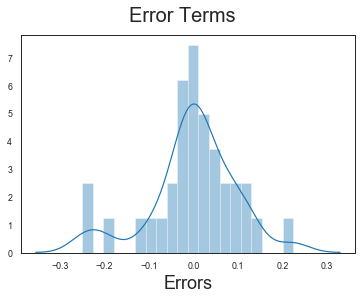

In [2137]:
#calculate the residuals
residual=y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(6,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

 Predictions and Evaluation on the Test Set

In [2138]:
#Scaling the test set
# num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
#         'TV_ad','Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad',
#        'NPS', 'Stock_Index', 'heat_deg_days', 'cool_deg_days', 
#        'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
#        'MA2_discount_offer']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2139]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [2140]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

Model Evaluation

In [2141]:
#predict
y_test_pred = lm.predict(X_test_new)

In [2142]:
#Evaluate

r2_score(y_true=y_test,y_pred=y_test_pred)

-0.20512164281656164

Text(0, 0.5, 'y_pred')

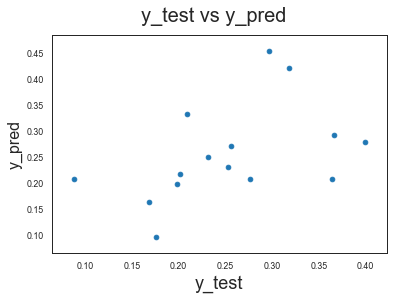

In [2143]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [2144]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     11.59
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.62e-06
Time:                        23:31:58   Log-Likelihood:                 31.295
No. Observations:                  34   AIC:                            -52.59
Df Residuals:                      29   BIC:                            -44.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1923      0

# Koyck Model

The Koyck tells us that the current revenue generated is not just influenced by the different independent attributes, but also because of the revenue generated over the last periods. ie. Current revenue(Yt) is also dependent on the past revenue values(Yt-1).*


  __Yt__ = __α__ +             __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__
  
  __Yt__ = __α__ + __µYt-1__ + __β1X1__ + __β2X2__ + __β3X3__ + __β4X4__ + __β5X5__ + __ϵ__  -- (sale at time t is dependent on sale at time t-1)

*If 	X1 is the advertising effect, β1 is the current effect of advertising, carry over effect of advertising is β1 * µ/(1-µ).*

*Therefore the total effect of advertising  = Current effect + Carry over effect*

                                            = β1 + β1 * µ/(1-µ)	

											= β1/(1-µ)

In [2145]:
homeaudio_df_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'is_premium_product', 'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [2146]:
homeaudio_df_km = homeaudio_df_week[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]           


homeaudio_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0  106915.000     0.374 2.795                    3.436                  38 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4765852.133     0.318 7.545                    2.801                 525 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111              -0.082
2 5543862.000     0.330 7.135                    2.697                 594 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.077               0.019
3 4854806.000     0.321 7.178                    2.799                 492 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.091              -0.013
4 3526072.000     0.320 7.330                    2.709                 364 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.000              -0.002

In [2147]:
homeaudio_df_km['lag_1_gmv'] = homeaudio_df_km['gmv'].shift(-1)

In [2148]:
# check nan values
homeaudio_df_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV                         1
Digital                    1
Sponsorship                1
Content_marketing          1
Online_marketing           1
Affiliates                 1
SEM                        1
TV_ad                      1
Digital_ad                 1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
Affiliates_ad              1
SEM_ad                     1
NPS                        0
Stock_Index                0
max_temp_C                 0
min_temp_C                 0
mean_temp_C                0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
total_precip_mm            0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_gmv                  1
dtype: int64

In [2149]:
#fill it with 0 
homeaudio_df_km = homeaudio_df_km.fillna(0)
homeaudio_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer   lag_1_gmv
0  106915.000     0.374 2.795                    3.436                  38 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000 4765852.133
1 4765852.133     0.318 7.545                    2.801                 525 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111              -0.082 5543862.000
2 5543862.000     0.330 7.135                    2.697                 594 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.077               0.019 4854806.000
3 4854806.000     0.321 7.178                    2.799                 492 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.091              -0.013 3526072.000
4 3526072.000     0.320 7.330                    2.709                 364 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.000              -0.002 3799881.000

In [2150]:


scaler = MinMaxScaler()

num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer','lag_1_gmv']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

homeaudio_df_km[num_vars] = scaler.fit_transform(homeaudio_df_km[num_vars])
homeaudio_df_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_gmv
0 0.000     0.477 0.000                    1.000               0.000 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.015       0.134           0.058                 0.000                0.036          0.052   0.105 0.869        0.714       0.785       0.809        0.793          0.000          0.247          0.000          0.000            0.000            0.000             0.379               0.505      0.244
1 0.240     0.112 1.000                    0.526               0.248 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.869        0.714       0.712       0.882        0.788          0.069          0.393          0.420          0.019            0.421            0.009             0.000               0.149      0.284
2 0.280     0.191 0.914                    0.448               0.283 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.869        0.714       0.879       1.000        0.934          0.051          0.799          0.159          0.019            0.161            0.009             0.117               0.587      0.249
3 0.245     0.136 0.923                    0.525               0.231 0.023    0.201        0.088              0.000             0.054       0.078 0.157  0.023       0.201           0.088                 0.000                0.054          0.078   0.157 0.869        0.714       0.922       0.879        0.859          0.109          0.706          0.115          0.019            0.118            0.009             0.068               0.448      0.181
4 0.176     0.129 0.955                    0.458               0.166 0.001    0.081        0.010              0.000             0.004       0.008 0.063  0.008       0.121           0.036                 0.000                0.021          0.032   0.094 1.000        0.750       1.000       0.996        1.000          0.051          1.000          0.439          0.019            0.440            0.009             0.380               0.498      0.195

In [2151]:
#Split data into train and test
X = homeaudio_df_km.drop('gmv',axis=1)
y = homeaudio_df_km['gmv']

homeaudio_df_train_km = homeaudio_df_km
print(X.shape)
print(y.shape)

(49, 32)
(49,)


In [2152]:
#  Instantiate
km = LinearRegression()

#  Fit a line
km.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2153]:
#  Coefficient values

coef = pd.DataFrame(X.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount        0.127
1                       sla        0.268
2   product_procurement_sla       -0.047
3        order_payment_type        0.551
4                        TV       -0.050
5                   Digital        2.623
6               Sponsorship       -0.018
7         Content_marketing        0.297
8          Online_marketing        1.022
9                Affiliates       -0.540
10                      SEM       -3.363
11                    TV_ad       -0.327
12               Digital_ad        1.006
13           Sponsorship_ad       -0.016
14     Content_Marketing_ad       -0.881
15      Online_Marketing_ad        1.363
16            Affiliates_ad       -1.386
17                   SEM_ad       -0.392
18                      NPS       -0.564
19              Stock_Index       -0.193
20               max_temp_C        0.152
21               min_temp_C        0.297
22              mean_temp_C       -0.205
23            heat_deg_days        0.179
24            cool_deg_days       -0.201
25            total_rain_mm       -0.007
26            total_snow_cm       -0.014
27          total_precip_mm       -0.009
28          snow_on_grnd_cm       -0.030
29         MA4_listed_price        0.392
30       MA2_discount_offer        0.090
31                lag_1_gmv        0.014

In [2154]:
col = X.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_gmv'], dtype='object')

Model Building - Stepwise selection for feature selection

In [2155]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [2156]:
final_features = stepwise_selection(X, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ad                 with p-value 0.965827
Drop TV                             with p-value 0.884294
Drop lag_1_gmv                      with p-value 0.880376
Drop SEM_ad                         with p-value 0.836851
Drop total_rain_mm                  with p-value 0.781421
Drop total_precip_mm                with p-value 0.730587
Drop Content_marketing              with p-value 0.718148
Drop Online_Marketing_ad            with p-value 0.746095
Drop total_snow_cm                  with p-value 0.658181
Drop Sponsorship                    with p-value 0.574944
Drop snow_on_grnd_cm                with p-value 0.546157
Drop mean_temp_C                    with p-value 0.516635
Drop Affiliates_ad                  with p-value 0.503809
Drop product_procurement_sla        with p-value 0.34626
Drop max_temp_C                     with p-value 0.316909
Drop heat_deg_days                  with p-value 0.667045
Drop min_temp_C                     with p-value 0.463092
Drop cool_deg_d

In [2157]:
# function to build model

def build_model(y,x_rfe):
    x_rfe = sm.add_constant(x_rfe)
    # Fitting the model with selected variables
    model = sm.OLS(y, x_rfe).fit() 
    print(model.summary())
    return x_rfe
    
    
def checkVIF(x_rfe):
    vif = pd.DataFrame()
    vif['Features'] = x_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_rfe.values, i) for i in range(x_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    

In [2158]:
# Subsetting training data for 15 selected columns
x_rfe1 = X[final_features]
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     44.90
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.54e-18
Time:                        23:32:00   Log-Likelihood:                 98.179
No. Observations:                  49   AIC:                            -168.4
Df Residuals:                      35   BIC:                            -141.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3176 

Model 2

Dropping ```'Online_marketing'``` 

In [2159]:
x_rfe1.drop('Online_marketing', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     24.74
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.01e-14
Time:                        23:32:00   Log-Likelihood:                 82.303
No. Observations:                  49   AIC:                            -138.6
Df Residuals:                      36   BIC:                            -114.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2897 

Model 3

Dropping ```'Affiliates''``` 

In [2160]:
x_rfe1.drop('Affiliates', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     26.78
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.59e-14
Time:                        23:32:00   Log-Likelihood:                 81.534
No. Observations:                  49   AIC:                            -139.1
Df Residuals:                      37   BIC:                            -116.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2774 

Model 4

Dropping ```'Digital_ad'``` 

In [2161]:
x_rfe1.drop('Digital_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     29.37
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.37e-15
Time:                        23:32:00   Log-Likelihood:                 80.892
No. Observations:                  49   AIC:                            -139.8
Df Residuals:                      38   BIC:                            -119.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2653 

Model 5

Dropping ```'Content_Marketing_ad'``` 

In [2162]:
x_rfe1.drop('Content_Marketing_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     33.44
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.26e-15
Time:                        23:32:00   Log-Likelihood:                 80.856
No. Observations:                  49   AIC:                            -141.7
Df Residuals:                      39   BIC:                            -122.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2616      0

Model 6

Dropping ```'SEM'```

In [2163]:
x_rfe1.drop('SEM', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     14.70
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.54e-10
Time:                        23:32:00   Log-Likelihood:                 61.395
No. Observations:                  49   AIC:                            -104.8
Df Residuals:                      40   BIC:                            -87.76
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0181      0

Model 7

Dropping ```'Stock_Index'``` 

In [2164]:
x_rfe1.drop('Stock_Index', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.43e-10
Time:                        23:32:00   Log-Likelihood:                 60.261
No. Observations:                  49   AIC:                            -104.5
Df Residuals:                      41   BIC:                            -89.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0792      0

Model 8

Dropping ```'NPS'```

In [2165]:
x_rfe1.drop('NPS', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     18.04
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.23e-10
Time:                        23:32:00   Log-Likelihood:                 59.034
No. Observations:                  49   AIC:                            -104.1
Df Residuals:                      42   BIC:                            -90.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1431      0

Dropping ```'TV_ad'``` 

In [2166]:
x_rfe1.drop('TV_ad', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     20.50
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.07e-10
Time:                        23:32:00   Log-Likelihood:                 57.667
No. Observations:                  49   AIC:                            -103.3
Df Residuals:                      43   BIC:                            -91.98
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1506      0

Dropping ```'Digital``` 

In [2167]:
x_rfe1.drop('Digital', axis = 1, inplace = True)
x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 
print(km1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.30
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.17e-10
Time:                        23:32:00   Log-Likelihood:                 56.375
No. Observations:                  49   AIC:                            -102.8
Df Residuals:                      44   BIC:                            -93.29
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1949      0

In [2168]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'order_payment_type', 'MA4_listed_price']

In [2169]:
# Model Evaluation on testing data
x_test = X[features]

#x_test
### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_test))

In [2170]:
# Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.005864085423961838

In [2171]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0               const        0.127
1            discount        0.268
2                 sla       -0.047
3  order_payment_type        0.551
4    MA4_listed_price       -0.050

In [2172]:
# Using K-Fold Cross validation evaluating on whole dataset

fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,X[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0013151  0.00326269 0.08370511 0.01205233 0.00273992 0.00580882
 0.00085506 0.01201613 0.00065992 0.00158294] 

Mean of 5 KFold CV - MSE: 0.01239980111953264


Text(0, 0.5, 'y_pred')

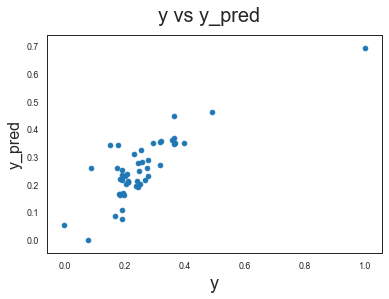

In [2173]:
# Plot y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              
plt.xlabel('y', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

# Distributed Lag Model

In [2174]:
homeaudio_df_week_cp.columns

Index(['gmv', 'listing_price', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype=

In [2175]:
homeaudio_dlm = homeaudio_df_week_cp[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
        'TV_ad','Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad',
       'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_holiday_flag','lag_2_holiday_flag','lag_3_holiday_flag',
       'lag_1_PayDate','lag_2_PayDate','lag_3_PayDate']]           


homeaudio_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  TV_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad    NPS  Stock_Index  holiday_flag  PayDate  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate
0  106915.000     0.374 2.795                    3.436                  38  0.054           1.854                 0.000                0.332 54.600     1177.000         0.000    0.200          0.100          1.460          0.000          0.000            0.000             0.000             0.000            2194.014           0.318           0.330           0.321     54.600     54.600           1177.000           1177.000           1177.000               0.000               0.286               0.000          0.000          0.143          0.000
1 4765852.133     0.318 7.545                    2.801                 525  0.081           2.780                 0.000                0.498 54.600     1177.000         0.000    0.000          1.059          2.322          4.155          0.029            0.041            -0.111            -0.111            2194.715           0.330           0.321           0.320     54.600     56.139           1177.000           1177.000           1185.286               0.286               0.000               0.000          0.143          0.000          0.143
2 5543862.000     0.330 7.135                    2.697                 594  0.081           2.780                 0.000                0.498 54.600     1177.000         0.286    0.143          0.816          4.722          1.569          0.029            0.041             0.000            -0.077            2096.934           0.321           0.320           0.358     56.139     48.791           1177.000           1185.286           1116.000               0.000               0.000               0.000          0.000          0.143          0.143
3 4854806.000     0.321 7.178                    2.799                 492  0.081           2.780                 0.000                0.498 54.600     1177.000         0.000    0.000          1.632          4.172          1.141          0.029            0.041            -0.023            -0.091            2162.296           0.320           0.358           0.359     48.791     46.925           1185.286           1116.000           1101.000               0.000               0.000               0.000          0.143          0.143          0.000
4 3526072.000     0.320 7.330                    2.709                 364  0.028           1.139                 0.000                0.192 56.139     1185.286         0.000    0.143          0.816          5.908          4.341          0.029            0.041             0.015             0.000            2073.237           0.358           0.359           0.351     46.925     46.925           1116.000           1101.000           1101.000               0.000               0.000               0.000          0.143          0.000          0.143

In [2176]:
homeaudio_dlm['lag_1_gmv'] = homeaudio_dlm['gmv'].shift(-1)
homeaudio_dlm['lag_2_gmv'] = homeaudio_dlm['gmv'].shift(-2)
homeaudio_dlm['lag_3_gmv'] = homeaudio_dlm['gmv'].shift(-3)

In [2177]:
#checking null
homeaudio_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
TV_ad                      1
Sponsorship_ad             1
Content_Marketing_ad       1
Online_Marketing_ad        1
NPS                        0
Stock_Index                0
holiday_flag               0
PayDate                    0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
lag_1_listed_price         0
lag_1_discount             0
lag_2_discount             0
lag_3_discount             0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_holiday_flag         0
lag_2_holiday_flag         0
lag_3_holiday_flag         0
lag_1_PayDate              0
lag_2_PayDate              0
lag_3_PayDate 

In [2178]:
homeaudio_dlm.fillna(0, inplace = True)

In [2179]:
homeaudio_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

In [2180]:


scaler = MinMaxScaler()

num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'TV_ad','Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad',
       'NPS', 'Stock_Index', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_holiday_flag','lag_2_holiday_flag','lag_3_holiday_flag',
       'lag_1_PayDate','lag_2_PayDate','lag_3_PayDate']

#Scale these variables using 'fit_transform'
homeaudio_dlm[num_vars] = scaler.fit_transform(homeaudio_dlm[num_vars])

In [2181]:
homeaudio_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  TV_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad   NPS  Stock_Index  holiday_flag  PayDate  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  lag_1_holiday_flag  lag_2_holiday_flag  lag_3_holiday_flag  lag_1_PayDate  lag_2_PayDate  lag_3_PayDate   lag_1_gmv   lag_2_gmv   lag_3_gmv
0 0.000     0.477 0.000                    1.000               0.000  0.015           0.058                 0.000                0.036 0.869        0.714         0.000    0.200          0.000          0.247          0.000          0.000            0.000             0.511             0.379               0.906           0.697           0.724           0.705      0.973      0.973              0.948              0.948              0.948               0.000               0.286               0.000          0.000          1.000          0.000 4765852.133 5543862.000 4854806.000
1 0.240     0.112 1.000                    0.526               0.248  0.023           0.088                 0.000                0.054 0.869        0.714         0.000    0.000          0.069          0.393          0.420          0.019            0.009             0.000             0.000               0.907           0.724           0.705           0.703      0.973      1.000              0.948              0.948              0.954               0.286               0.000               0.000          1.000          0.000          1.000 5543862.000 4854806.000 3526072.000
2 0.280     0.191 0.914                    0.448               0.283  0.023           0.088                 0.000                0.054 0.869        0.714         0.286    0.143          0.051          0.799          0.159          0.019            0.009             0.512             0.117               0.866           0.705           0.703           0.786      1.000      0.869              0.948              0.954              0.899               0.000               0.000               0.000          0.000          1.000          1.000 4854806.000 3526072.000 3799881.000
3 0.245     0.136 0.923                    0.525               0.231  0.023           0.088                 0.000                0.054 0.869        0.714         0.000    0.000          0.109          0.706          0.115          0.019            0.009             0.406             0.068               0.893           0.703           0.786           0.787      0.869      0.836              0.954              0.899              0.886               0.000               0.000               0.000          1.000          1.000          0.000 3526072.000 3799881.000 4235116.000
4 0.176     0.129 0.955                    0.458               0.166  0.008           0.036                 0.000                0.021 1.000        0.750         0.000    0.143          0.051          1.000          0.439          0.019            0.009             0.582             0.380               0.856           0.786           0.787           0.770      0.836      0.836              0.899              0.886              0.886               0.000               0.000               0.000          1.000          0.000          1.000 3799881.000 4235116.000 3808623.000

In [2182]:
# Split the train dataset into X and y

x = homeaudio_dlm.drop('gmv',axis=1)
y = homeaudio_dlm['gmv']

homeaudio_train_dlm = homeaudio_dlm

In [2183]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 37)
y dataset:  (49,)


In [2184]:
#  Instantiate
dlm = LinearRegression()

#  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2185]:
#  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        0.446
1                       sla        0.370
2   product_procurement_sla       -0.279
3        order_payment_type        0.257
4                     TV_ad       -0.028
5            Sponsorship_ad       -0.035
6      Content_Marketing_ad        0.356
7       Online_Marketing_ad       -0.237
8                       NPS       -0.200
9               Stock_Index       -0.032
10             holiday_flag        0.002
11                  PayDate        0.159
12            heat_deg_days       -0.147
13            cool_deg_days       -0.165
14            total_rain_mm       -0.032
15            total_snow_cm       -0.008
16          snow_on_grnd_cm        0.229
17         MA2_listed_price        0.184
18         MA4_listed_price        0.049
19       lag_1_listed_price       -0.259
20           lag_1_discount        0.373
21           lag_2_discount       -0.111
22           lag_3_discount       -0.430
23                lag_2_NPS       -0.249
24                lag_3_NPS        1.125
25        lag_1_Stock_Index        0.081
26        lag_2_Stock_Index        0.344
27        lag_3_Stock_Index       -0.939
28       lag_1_holiday_flag       -0.066
29       lag_2_holiday_flag        0.027
30       lag_3_holiday_flag       -0.140
31            lag_1_PayDate        0.105
32            lag_2_PayDate        0.069
33            lag_3_PayDate       -0.023
34                lag_1_gmv       -0.000
35                lag_2_gmv       -0.000
36                lag_3_gmv        0.000

In [2186]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'TV_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_holiday_flag', 'lag_2_holiday_flag', 'lag_3_holiday_flag', 'lag_1_PayDate', 'lag_2_PayDate', 'lag_3_PayDate', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'], dtype='object')

#### Model building - Stepwise Selection

In [2187]:
def stepwise_selection(x, y,
                       initial_list=col,
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [2188]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop holiday_flag                   with p-value 0.983203
Drop total_snow_cm                  with p-value 0.933785
Drop TV_ad                          with p-value 0.835902
Drop MA4_listed_price               with p-value 0.866149
Drop lag_1_Stock_Index              with p-value 0.86117
Drop Stock_Index                    with p-value 0.779557
Drop Sponsorship_ad                 with p-value 0.867116
Drop PayDate                        with p-value 0.855957
Drop lag_2_NPS                      with p-value 0.590761
Drop lag_2_PayDate                  with p-value 0.608215
Drop lag_2_holiday_flag             with p-value 0.567616
Drop lag_2_discount                 with p-value 0.486754
Drop total_rain_mm                  with p-value 0.406119
Drop lag_1_holiday_flag             with p-value 0.411374
Drop lag_2_Stock_Index              with p-value 0.364268
Drop lag_1_PayDate                  with p-value 0.363249
Drop lag_1_listed_price             with p-value 0.450314
Drop heat_deg_d

In [2189]:
#  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)
dlm1 = sm.OLS(y, x_rfe1).fit()
dlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     29.51
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.15e-13
Time:                        23:32:03   Log-Likelihood:                 64.276
No. Observations:                  49   AIC:                            -116.6
Df Residuals:                      43   BIC:                            -105.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2690      0.054      4.971      0.000       0.160       0.378
discount                    0.3706      0.052      7.158      0.000       0.266       0.475
product_procurement_sla    -0.3432      0.086     -3.993      0.000      -0.517      -0.170
order_payment_type          0.2599      0.057      4.526      0.000       0.144       0.376
Content_Marketing_ad        0.2514      0.051      4.887      0.000       0.148       0.355
Online_Marketing_ad        -0.2171      0.057     -3.782      0.000      -0.333      -0.101
==============================================================================
Omnibus:                        4.263   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.188
Skew:                           0.209   Prob(JB):                        0.123
Kurtosis:                       4.370   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2190]:
checkVIF(x_rfe1)

                  Features    VIF
0                    const 29.650
5      Online_Marketing_ad  2.480
4     Content_Marketing_ad  1.590
1                 discount  1.580
2  product_procurement_sla  1.390
3       order_payment_type  1.200


In [2191]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'product_procurement_sla',
 'order_payment_type',
 'Content_Marketing_ad',
 'Online_Marketing_ad']

In [2192]:
#  Model Evaluation on testing data
x_2 = x[features]

#  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [2193]:
#  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.004247640726139878

In [2194]:
#  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                    const        0.446
1                 discount        0.370
2  product_procurement_sla       -0.279
3       order_payment_type        0.257
4     Content_Marketing_ad       -0.028
5      Online_Marketing_ad       -0.035

In [2195]:
#  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00261174 0.00795854 0.06016257 0.00653541 0.00744105 0.00310336
 0.0027809  0.00176397 0.00734508 0.00310243] 

Mean of 5 KFold CV - MSE: 0.010280506261977265


Text(0, 0.5, 'y_pred')

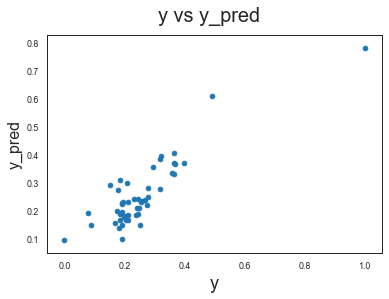

In [2196]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Multiplicative Model

In [2197]:
homeaudio_mm = homeaudio_df_week_cp[['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']]         

homeaudio_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad    NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0  106915.000     0.374 2.795                    3.436                  38                   3 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.054       0.633           1.854                 0.000                0.332          0.137   1.256 54.600     1177.000         0.000    0.200      25.500      13.200       19.360          0.100          1.460          0.000          0.000            0.000            0.000             0.000               0.000
1 4765852.133     0.318 7.545                    2.801                 525                 113 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      24.025      14.385       19.263          1.059          2.322          4.155          0.029            4.184            0.041            -0.111              -0.082
2 5543862.000     0.330 7.135                    2.697                 594                 124 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.286    0.143      27.383      16.314       21.906          0.816          4.722          1.569          0.029            1.598            0.041            -0.077               0.019
3 4854806.000     0.321 7.178                    2.799                 492                  98 0.054    0.633        1.854              0.000             0.332       0.137 1.256  0.081       0.950           2.780                 0.000                0.498          0.205   1.884 54.600     1177.000         0.000    0.000      28.240      14.342       20.540          1.632          4.172          1.141          0.029            1.170            0.041            -0.091              -0.013
4 3526072.000     0.320 7.330                    2.709                 364                  77 0.001    0.256        0.213              0.000             0.026       0.015 0.503  0.028       0.572           1.139                 0.000                0.192          0.083   1.131 56.139     1185.286         0.000    0.143      29.811      16.242       23.092          0.816          5.908          4.341          0.029            4.370            0.041             0.000              -0.002

In [2198]:
# Applying Log 
homeaudio_mm=np.log(homeaudio_mm)

homeaudio_mm = homeaudio_mm.replace([np.inf, -np.inf], 0)

In [2199]:
homeaudio_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product     TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates    SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0 11.580    -0.983 1.028                    1.234               3.638               1.099 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.922      -0.457           0.617                -8.364               -1.103         -1.989   0.228 4.000        7.071         0.000   -1.609       3.239       2.580        2.963         -2.303          0.378          0.000          0.000            0.000            0.000             0.000               0.000
1 15.377    -1.147 2.021                    1.030               6.263               4.727 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.179       2.666        2.958          0.057          0.842          1.424         -3.532            1.431           -3.189               nan                 nan
2 15.528    -1.109 1.965                    0.992               6.387               4.820 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071        -1.253   -1.946       3.310       2.792        3.087         -0.203          1.552          0.451         -3.532            0.469           -3.189               nan              -3.973
3 15.395    -1.136 1.971                    1.029               6.198               4.585 -2.922   -0.457        0.617             -8.364            -1.103      -1.989  0.228 -2.516      -0.051           1.023                -7.958               -0.698         -1.584   0.633 4.000        7.071         0.000    0.000       3.341       2.663        3.022          0.490          1.428          0.131         -3.532            0.157           -3.189               nan                 nan
4 15.076    -1.139 1.992                    0.997               5.897               4.344 -6.655   -1.364       -1.548            -13.580            -3.655      -4.217 -0.688 -3.568      -0.558           0.131                -9.046               -1.652         -2.487   0.123 4.028        7.078         0.000   -1.946       3.395       2.788        3.139         -0.203          1.776          1.468         -3.532            1.475           -3.189            -8.861                 nan

In [2200]:

scaler = MinMaxScaler()
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 
                                  'order_payment_type', 'TV', 'Digital', 'Sponsorship', 
                                  'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 
                                  'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 
                                  'SEM_ad', 'NPS', 'Stock_Index', 'max_temp_C', 'min_temp_C', 
                                  'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 
                                  'total_precip_mm', 'snow_on_grnd_cm','MA4_listed_price',
       'MA2_discount_offer']

#fit the data
#fit(): learns min,max
#trasnform : x-xmin/xmax-xmin
#fit_transform - fit()+transform()

homeaudio_mm[num_vars] = scaler.fit_transform(homeaudio_mm[num_vars])
homeaudio_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  is_premium_product    TV  Digital  Sponsorship  Content_marketing  Online_marketing  Affiliates   SEM  TV_ad  Digital_ad  Sponsorship_ad  Content_Marketing_ad  Online_Marketing_ad  Affiliates_ad  SEM_ad   NPS  Stock_Index  holiday_flag  PayDate  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer
0 0.000     0.529 0.000                    1.000               0.000               1.099 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.134       0.432           0.146                 0.073                0.142          0.144   0.045 0.882        0.734         0.000   -1.609       0.860       0.912        0.884          0.000          0.408          0.303          0.895            0.286            0.677             1.000               1.000
1 0.729     0.136 1.000                    0.587               0.662               4.727 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.218       0.547           0.268                 0.117                0.247          0.262   0.216 0.882        0.734         0.000    0.000       0.807       0.948        0.881          0.477          0.604          0.736          0.000            0.731            0.000               nan                 nan
2 0.758     0.226 0.944                    0.510               0.693               4.820 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.218       0.547           0.268                 0.117                0.247          0.262   0.216 0.882        0.734        -1.253   -1.946       0.924       1.000        0.965          0.424          0.905          0.440          0.000            0.432            0.000               nan               0.442
3 0.733     0.163 0.950                    0.585               0.646               4.585 0.498    0.547        0.471              0.388             0.467       0.467 0.331  0.218       0.547           0.268                 0.117                0.247          0.262   0.216 0.882        0.734         0.000    0.000       0.952       0.946        0.923          0.564          0.853          0.343          0.000            0.335            0.000               nan                 nan
4 0.671     0.155 0.971                    0.519               0.570               4.344 0.000    0.291        0.000              0.000             0.000       0.000 0.000  0.000       0.404           0.000                 0.000                0.000          0.000   0.000 1.000        0.768         0.000   -1.946       1.000       0.998        1.000          0.424          1.000          0.750          0.000            0.745            0.000             0.000                 nan

In [2201]:
#First start model with 1 parameter and add other variabls 1 by 1
# the targeted variable is gmv
x = homeaudio_mm.drop('gmv',axis=1)
y = homeaudio_mm['gmv']
homeaudio_train_mm = homeaudio_mm

In [2202]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 34)
y dataset:  (49,)


In [2203]:
# Instantiate
mm = LinearRegression()



In [2204]:
# Fit a line
x=x.fillna(0)
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2205]:
# Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.036
1                       sla       -0.103
2   product_procurement_sla        0.007
3        order_payment_type        0.305
4        is_premium_product        0.118
5                        TV        0.085
6                   Digital        0.804
7               Sponsorship       -0.467
8         Content_marketing       -0.453
9          Online_marketing        8.269
10               Affiliates       -7.641
11                      SEM       -0.661
12                    TV_ad       -0.199
13               Digital_ad       -0.320
14           Sponsorship_ad        0.177
15     Content_Marketing_ad        0.274
16      Online_Marketing_ad       -3.383
17            Affiliates_ad        3.231
18                   SEM_ad        0.048
19                      NPS       -0.280
20              Stock_Index       -0.025
21             holiday_flag        0.028
22                  PayDate       -0.001
23               max_temp_C       -0.039
24               min_temp_C        0.137
25              mean_temp_C       -0.208
26            heat_deg_days        0.192
27            cool_deg_days        0.043
28            total_rain_mm       -0.595
29            total_snow_cm       -0.126
30          total_precip_mm        0.621
31          snow_on_grnd_cm       -0.065
32         MA4_listed_price        0.027
33       MA2_discount_offer        0.072

In [2206]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'is_premium_product', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'TV_ad', 'Digital_ad', 'Sponsorship_ad', 'Content_Marketing_ad', 'Online_Marketing_ad', 'Affiliates_ad', 'SEM_ad', 'NPS', 'Stock_Index', 'holiday_flag', 'PayDate', 'max_temp_C', 'min_temp_C', 'mean_temp_C', 'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'total_precip_mm', 'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

Model Building - Stepwise selection for feature selection

In [2207]:
def stepwise_selection(x, y,
                       initial_list=col,
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [2208]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop SEM_ad                         with p-value 0.897489
Drop product_procurement_sla        with p-value 0.867956
Drop PayDate                        with p-value 0.839281
Drop TV                             with p-value 0.708215
Drop max_temp_C                     with p-value 0.605448
Drop Content_Marketing_ad           with p-value 0.371901
Drop Sponsorship_ad                 with p-value 0.639775
Drop Content_marketing              with p-value 0.456075
Drop MA4_listed_price               with p-value 0.324142
Drop Online_Marketing_ad            with p-value 0.260963
Drop Affiliates_ad                  with p-value 0.223686
Drop discount                       with p-value 0.0689493
Drop Stock_Index                    with p-value 0.106205
Drop TV_ad                          with p-value 0.292534
Drop Digital_ad                     with p-value 0.113692
Drop holiday_flag                   with p-value 0.140536
Drop total_precip_mm                with p-value 0.256649
Drop total_ra

In [2209]:
#Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]
x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

mm1.params

const                -0.023
sla                  -0.086
order_payment_type    0.205
is_premium_product    0.124
Digital               0.408
Sponsorship          -0.190
Online_marketing      4.049
Affiliates           -3.881
SEM                  -0.486
NPS                  -0.168
heat_deg_days         0.325
cool_deg_days         0.048
snow_on_grnd_cm      -0.080
MA2_discount_offer    0.041
dtype: float64

In [2210]:
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.81e-24
Time:                        23:32:05   Log-Likelihood:                 123.54
No. Observations:                  49   AIC:                            -219.1
Df Residuals:                      35   BIC:                            -192.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0234      0.051     -0.454      0.652      -0.128       0.081
sla                   -0.0859      0.041     -2.115      0.042      -0.168      -0.003
order_payment_type     0.2048      0.068      3.033      0.005       0.068       0.342
is_premium_product     0.1243      0.016      7.770      0.000       0.092       0.157
Digital                0.4082      0.063      6.461      0.000       0.280       0.536
Sponsorship           -0.1897      0.032     -5.959      0.000      -0.254      -0.125
Online_marketing       4.0495      0.804      5.034      0.000       2.416       5.683
Affiliates            -3.8805      0.783     -4.954      0.000      -5.471      -2.290
SEM                   -0.4860      0.087     -5.570      0.000      -0.663      -0.309
NPS                   -0.1684      0.036     -4.743      0.000      -0.241      -0.096
heat_deg_days          0.3251      0.041      7.988      0.000       0.242       0.408
cool_deg_days          0.0485      0.019      2.507      0.017       0.009       0.088
snow_on_grnd_cm       -0.0795      0.021     -3.831      0.001      -0.122      -0.037
MA2_discount_offer     0.0406      0.017      2.343      0.025       0.005       0.076
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.647
Skew:                           0.328   Prob(JB):                        0.439
Kurtosis:                       2.387   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2211]:
checkVIF(x_rfe1)

              Features      VIF
6     Online_marketing 3012.810
7           Affiliates 2960.180
0                const  245.210
8                  SEM   35.800
4              Digital   23.980
2   order_payment_type    9.480
3   is_premium_product    8.520
9                  NPS    7.330
5          Sponsorship    5.690
10       heat_deg_days    5.490
1                  sla    4.240
11       cool_deg_days    2.590
13  MA2_discount_offer    2.420
12     snow_on_grnd_cm    2.040


Dropping ```'Online_marketing'``` 

In [2212]:
x_rfe1.drop('Online_marketing',1,inplace=True)

x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
mm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     70.65
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.64e-21
Time:                        23:32:05   Log-Likelihood:                 110.19
No. Observations:                  49   AIC:                            -194.4
Df Residuals:                      36   BIC:                            -169.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1081      0.063     -1.716      0.095      -0.236       0.020
sla                   -0.0994      0.052     -1.894      0.066      -0.206       0.007
order_payment_type     0.0164      0.073      0.226      0.823      -0.131       0.164
is_premium_product     0.1677      0.017      9.624      0.000       0.132       0.203
Digital                0.1470      0.047      3.149      0.003       0.052       0.242
Sponsorship           -0.1391      0.039     -3.557      0.001      -0.218      -0.060
Affiliates             0.0586      0.045      1.315      0.197      -0.032       0.149
SEM                   -0.1205      0.063     -1.923      0.062      -0.248       0.007
NPS                   -0.0799      0.040     -2.001      0.053      -0.161       0.001
heat_deg_days          0.2876      0.052      5.551      0.000       0.183       0.393
cool_deg_days          0.0622      0.025      2.510      0.017       0.012       0.113
snow_on_grnd_cm       -0.0806      0.027     -2.999      0.005      -0.135      -0.026
MA2_discount_offer     0.0433      0.022      1.931      0.061      -0.002       0.089
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.425
Skew:                           0.006   Prob(JB):                        0.809
Kurtosis:                       2.544   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping ```'order_payment_type'``` 

In [2213]:
x_rfe1.drop('order_payment_type',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     79.09
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.95e-22
Time:                        23:32:05   Log-Likelihood:                 110.16
No. Observations:                  49   AIC:                            -196.3
Df Residuals:                      37   BIC:                            -173.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1166      0

Dropping ```'Affiliates'```

In [2214]:
x_rfe1.drop('Affiliates',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     84.94
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.52e-23
Time:                        23:32:05   Log-Likelihood:                 108.97
No. Observations:                  49   AIC:                            -195.9
Df Residuals:                      38   BIC:                            -175.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0990      0

Dropping ```'sla'``` 

In [2215]:
x_rfe1.drop('sla',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     88.97
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.55e-23
Time:                        23:32:05   Log-Likelihood:                 106.98
No. Observations:                  49   AIC:                            -194.0
Df Residuals:                      39   BIC:                            -175.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0925      0

Dropping ```'SEM'``` 

In [2216]:
x_rfe1.drop('SEM',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     91.52
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.95e-23
Time:                        23:32:05   Log-Likelihood:                 104.30
No. Observations:                  49   AIC:                            -190.6
Df Residuals:                      40   BIC:                            -173.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1237      0

In [2217]:
x_rfe1.drop('Digital',1,inplace=True)
x_rfe1 = sm.add_constant(x_rfe1)
mm1 = sm.OLS(y, x_rfe1).fit() 
print(mm1.summary())
checkVIF(x_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     98.48
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.40e-23
Time:                        23:32:05   Log-Likelihood:                 102.34
No. Observations:                  49   AIC:                            -188.7
Df Residuals:                      41   BIC:                            -173.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1256      0

In [2218]:
features = list(x_rfe1.columns)
features.remove('const')
features

['is_premium_product',
 'Sponsorship',
 'NPS',
 'heat_deg_days',
 'cool_deg_days',
 'snow_on_grnd_cm',
 'MA2_discount_offer']

```Model Evaluation on testing data```

In [2219]:
x_2 = x[features]

```Predicition with selected features on the test data```

In [2220]:
y_pred = mm1.predict(sm.add_constant(x_2))

```Mean square error (MSE)```

In [2221]:
mse = np.mean((y_pred - y)**2)
mse

0.0008984628488757037

In [2222]:
r2_score(y_true=y_test,y_pred=y_test_pred)

-0.20512164281656164

```Coefficient values```


In [2223]:
coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0               const       -0.036
1  is_premium_product       -0.103
2         Sponsorship        0.007
3                 NPS        0.305
4       heat_deg_days        0.118
5       cool_deg_days        0.085
6     snow_on_grnd_cm        0.804
7  MA2_discount_offer       -0.467

```Mean Square Error``` 
- Using K-Fold Cross validation evaluating on selected dataset

- lm = LinearRegression()

In [2224]:

fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [4.39672121e-04 1.88054233e-03 1.07045356e-02 1.18362185e-03
 2.51882566e-03 1.92185197e-03 5.92260275e-04 1.28055237e-03
 8.37413220e-05 4.78465163e-04] 

Mean of 5 KFold CV - MSE: 0.002108406867436015


Plotting ```y``` and ```y_pred``` to understand the spread

Text(0, 0.5, 'y_pred')

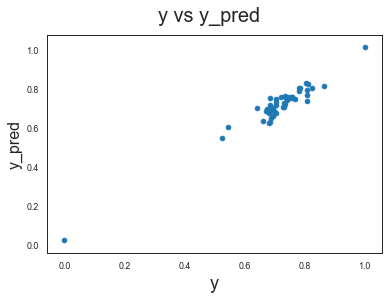

In [2225]:
fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Model Results:



### Camera Accessories:
#### Model : Linear
        - R2: 0.32
        - MSE : 0.0008
        - Variables: order_payment_type,NPS
        - Insights : Error terms shows approximately normally distributed, so the assumption are good on linear model
#### Model : Koyck
        - R2: 0.589
        - MSE: 0.0106
        - Variables: order_payment_type,NPS
#### Model : DLM
        - R2: 0.589
        - MSE: 0.0106
        - Variables: order_payment_type,NPS
#### Model : Multiplicative
        - R2: 0.987
        - MSE: 0.0005
        - Variables: discount,sla,is_premium_product


### Gaming Accessories:
#### Model : Linear
        - R2: 0.522
        - MSE: 0.0007
        - Variables: order_payment_type,NPS
#### Model : Koyck
        - R2: 0.764
        - MSE: 0.0074
        - Variables: discount, order_payment_type, TV, NPS,Stock_Index
#### Model : DLM
        - R2: 0.849
        - MSE: 0.0043
        - Variables:'discount','order_payment_type','Digital','Sponsorship_ad','NPS','max_temp_C','MA4_listed_price','MA2_discount_offer','lag_1_listed_price'
#### Model : Multiplicative
        - R2: 0.969
        - MSE: 0.0013
        - Variables: 'discount', 'sla', 'order_payment_type', 'TV', 'NPS'



### Home Audio Accessories:
#### Model : Linear
        - R2: 0.205
        - MSE: 0.0006
        - Variables: order_payment_type,NPS
#### Model : Koyck
        - R2: 0.660
        - MSE: 0.0058
        - Variables: ['discount', 'sla', 'order_payment_type', 'MA4_listed_price']
#### Model : DLM
        - R2: 0.748
        - MSE: 0.0042
        - Variables: ['discount','product_procurement_sla','order_payment_type','Content_Marketing_ad','Online_Marketing_ad']
#### Model : Multiplicative
        - R2: 0.934
        - MSE: 0.000898
        - Variables: ['is_premium_product','Sponsorship','NPS','heat_deg_days','cool_deg_days','snow_on_grnd_cm','MA2_discount_offer']





# Selected Models:



### Camera Accessories:

#### Model : Multiplicative
        - R2: 0.987
        - MSE: 0.0005
        - Variables: discount,sla,is_premium_product


### Gaming Accessories:

#### Model : Multiplicative
        - R2: 0.969
        - MSE: 0.0013
        - Variables: 'discount', 'sla', 'order_payment_type', 'TV', 'NPS'



### Home Audio Accessories:

#### Model : Multiplicative
        - R2: 0.934
        - MSE: 0.000898
        - Variables: ['is_premium_product','Sponsorship','NPS','heat_deg_days','cool_deg_days','snow_on_grnd_cm','MA2_discount_offer']



